#                                                        Predictive Analytics Project
#                                                       Topic - "Flight Delay Predictor"


**Group No: 14**

**Names**: 

**Parvaz Virk - 0269556**

**Arjun Thakur -0271741**

**Rohit Mahendran - 0274440**


# Section 1 : Business Understanding

**Objective: Predicting a flight delay based on data that is available to passengers**
The domestic aviation industry is riddled with unanticipated flight delays. Minimizing flight delays can enhance the overall travel experience for passengers, leading to increased customer satisfaction, and positively impact an airline's financial performance as it can avoid compensation claims and operational costs associated with delays.

**Questions we are looking to answer through this project:**

If flight delays can be predicted with the information available to a passenger.

If there is some association between duration of flight and flight delays.

If the airline has any impact on the likelihood of a flight delay.

If there is any pattern between day and time of flight, and flight delay.

Dataset extracted from United States Department of Transportation, Bureau of Transportation Statistics

Dataset link: https://www.transtats.bts.gov/HomeDrillChart_Month.asp?5ry_lrn4=FDEI&N44_Qry=E&5ry_Pn44vr4=DDD&5ry_Nv42146=DDD&heY_fryrp6lrn4=FDFG&heY_fryrp6Z106u=L

### Steps Involved

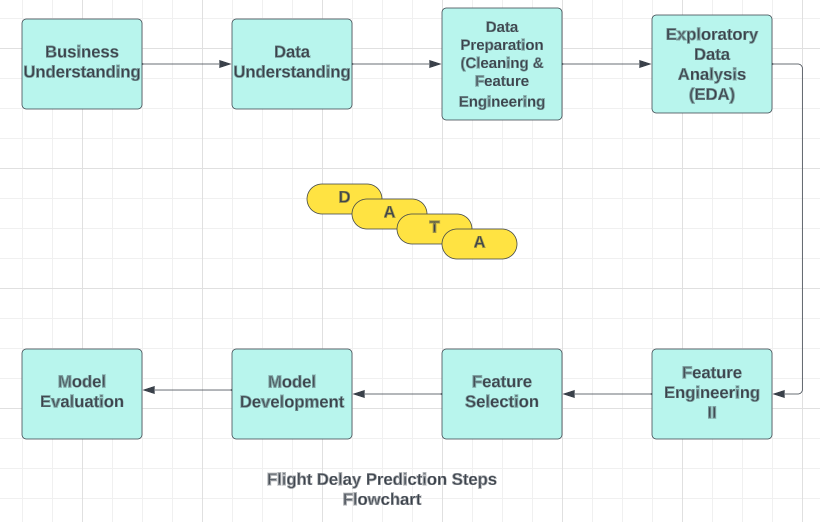

In [17]:
from IPython.display import Image
Image(filename='FDP_Flowchart.png')

# Section 2 : Dataset Understanding

## Metadata
<ol>
    <li><strong>YEAR</strong>: Flight data year (e.g., 2015).</li>
    <li><strong>MONTH</strong>: Month of flight data (1-12).</li>
    <li><strong>DAY</strong>: Day of month for flight.</li>
    <li><strong>DAY_OF_WEEK</strong>: Weekday of flight (0-6).</li>
    <li><strong>AIRLINE</strong>: Airline abbreviation (e.g., B6, AS).</li>
    <li><strong>FLIGHT_NUMBER</strong>: Unique flight identification number.</li>
    <li><strong>TAIL_NUMBER</strong>: Aircraft's unique alphanumeric code.</li>
    <li><strong>ORIGIN_AIRPORT</strong>: Departure airport code (e.g., JFK).</li>
    <li><strong>DESTINATION_AIRPORT</strong>: Arrival airport code (e.g., SEA).</li>
    <li><strong>SCHEDULED_DEPARTURE</strong>: Planned flight departure time (HHMM).</li>
    <li><strong>DEPARTURE_TIME</strong>: Actual flight departure time (HHMM).</li>
    <li><strong>DEPARTURE_DELAY</strong>: Minutes delayed in departure.</li>
    <li><strong>TAXI_OUT</strong>: Time from gate departure to takeoff.</li>
    <li><strong>WHEELS_OFF</strong>: Time of takeoff (HHMM).</li>
    <li><strong>SCHEDULED_TIME</strong>: Scheduled flight duration in minutes.</li>
    <li><strong>ELAPSED_TIME</strong>: Actual total flight time in minutes.</li>
    <li><strong>AIR_TIME</strong>: Time spent flying in minutes.</li>
    <li><strong>DISTANCE</strong>: Flight distance in miles.</li>
    <li><strong>WHEELS_ON</strong>: Time of landing (HHMM).</li>
    <li><strong>TAXI_IN</strong>: Time from landing to gate arrival.</li>
    <li><strong>SCHEDULED_ARRIVAL</strong>: Planned arrival time (HHMM).</li>
    <li><strong>ARRIVAL_TIME</strong>: Actual arrival time (HHMM).</li>
    <li><strong>ARRIVAL_DELAY</strong>: Minutes delayed in arrival.</li>
    <li><strong>DIVERTED</strong>: Indicates if flight was diverted (0 or 1).</li>
    <li><strong>CANCELLED</strong>: Indicates if flight was cancelled (0 or 1).</li>
    <li><strong>CANCELLATION_REASON</strong>: Reason for flight cancellation.</li>
    <li><strong>AIR_SYSTEM_DELAY</strong>: Delay due to air system issues in minutes.</li>
    <li><strong>SECURITY_DELAY</strong>: Delay due to security issues in minutes.</li>
    <li><strong>AIRLINE_DELAY</strong>: Delay attributed to airline in minutes.</li>
    <li><strong>LATE_AIRCRAFT_DELAY</strong>: Delay due to late aircraft arrival in minutes.</li>
    <li><strong>WEATHER_DELAY</strong>: Weather-related delay in minutes.</li>
    <li><strong>AIRLINE_NAME</strong>: Full name of the airline.</li>
    <li><strong>AIRPORT_NAME</strong>: Full name of the airport.</li>
    <li><strong>FLIGHT_DELAY_CATEGORY</strong>: Classification of flight delay severity.</li>
    <li><strong>FLIGHT_DELAY</strong>: Total flight delay status (YES/NO).</li>
    <li><strong>DAY_OF_WEEK_NAME</strong>: Full name of the day of the week.</li>
    <li><strong>Time_Period</strong>: Time category for scheduled departure.</li>
    <li><strong>ORIGIN_LATITUDE</strong>: Latitude of origin airport.</li>
    <li><strong>ORIGIN_LONGITUDE</strong>: Longitude of origin airport.</li>
    <li><strong>DESTINATION_LATITUDE</strong>: Latitude of destination airport.</li>
    <li><strong>DESTINATION_LONGITUDE</strong>: Longitude of destination airport.</li>
    <li><strong>ORIGIN_CITY</strong>: City of origin airport.</li>
    <li><strong>ORIGIN_STATE</strong>: State of origin airport.</li>
    <li><strong>DESTINATION_CITY</strong>: City of destination airport.</li>
    <li><strong>DESTINATION_STATE</strong>: State of destination airport.</li>
</ol>


## Importing all the necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import seaborn as sns
import xgboost as xgb
import scipy
import utils
import joblib
from datetime import datetime as dt  
import plotly.express as px
from matplotlib.gridspec import GridSpec
from statistics import median, mode
from scipy.stats import kurtosis
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score,auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    cohen_kappa_score, log_loss, roc_auc_score, confusion_matrix, classification_report
)

C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Loading the csv file dataset into the program
**In this dataset, we have 3 input files and 1 file made from the data avaialble on the US Dept of Transportation website to fill up the missing and wrongly named Origin and Destination Aiport codes **1. Flights_data.csv: Contains the lookup tablr 5.81 million records # Total of 31 features
2. Airlines.csv: Contains table with IATA Code for 14 Airline names # Total of 2 features
3. Airports.csv: Contains table with IATA Code details of 322 airport names and it's location that includes city, state, country latitude, and longitude # Total of 7 features

In [19]:
# Loading the dataset from csv file and printing their shape
dfAirlines = pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\2023 Sept Fall 3rd sem\Predictive Analytics\dataset\airlines.csv')
dfAirports = pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\2023 Sept Fall 3rd sem\Predictive Analytics\dataset\airports.csv')

In [20]:
dfoutputf = pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\2023 Sept Fall 3rd sem\Predictive Analytics\dataset\flights_data.csv', low_memory=False)
merged_data =  pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\2023 Sept Fall 3rd sem\Predictive Analytics\dataset/airportcodef.csv')

In [21]:
# Printing the shape of all 3 csv files
dfoutputf.shape, dfAirlines.shape,  dfAirports.shape

((5819079, 31), (14, 2), (322, 7))

In [22]:
merged_data.head(5)

Code_x                                    Description  Code_y
0    01A         Afognak Lake, AK: Afognak Lake Airport   10001
1    03A  Granite Mountain, AK: Bear Creek Mining Strip   10003
2    04A                       Lik, AK: Lik Mining Camp   10004
3    05A         Little Squaw, AK: Little Squaw Airport   10005
4    06A                     Kizhuyak, AK: Kizhuyak Bay   10006

In [23]:
# Showing first 4 sample of flight dataframe
dfoutputf.head(4)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN               NaN   
1           -9.0         0          0                  NaN               NaN   
2            5.0         0          0                  NaN               NaN   
3           -9.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  
3             NaN            NaN                  NaN            NaN  

[4 rows x 31 columns]

In [24]:
# Showing last 4 sample of flight dataframe
dfoutputf.tail(4)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
5819075            JFK                 PSE                 2359  ...   
5819076            JFK                 SJU                 2359  ...   
5819077            MCO                 SJU                 2359  ...   
5819078            JFK                 BQN                 2359  ...   

         ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
5819075         430.0          -16.0         0          0   
5819076         432.0           -8.0         0          0   
5819077         330.0          -10.0         0          0   
5819078         442.0            2.0         0          0   

         CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
5819075                  NaN               NaN             NaN            NaN   
5819076                  NaN               NaN             NaN            NaN   
5819077                  NaN               NaN             NaN            NaN   
5819078                  NaN               NaN             NaN            NaN   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
5819075                  NaN            NaN  
5819076                  NaN            NaN  
5819077                  NaN            NaN  
5819078                  NaN            NaN  

[4 rows x 31 columns]

In [25]:
# Showing the first 4 airline name and IATA CODE
dfAirlines.head(4)

IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.

In [26]:
# Showing first 4 airport names, city, state, country, latitude, Longitude and IATA CODE
dfAirports.head(4)

IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183

In [27]:
# As some of the features are time of days, time in mintues (numeric)and rest are non time values (string format). We find the datatype for all the 31 features. 
dfoutputf.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

# Section 3 : Data Preparation (Preprocessing, Cleaning & Feature Engineering)

In [28]:
dfoutputf.describe()

YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00   
min           1.000000e+00    1.000000e+00    -8.200000e+01  1.000000e+00   
25%           9.170000e+02    9.210000e+02    -5.000000e+00  1.100000e+01   
50%           1.325000e+03    1.330000e+03    -2.000000e+00  1.400000e+01   
75%           1.730000e+03    1.740000e+03     7.000000e+00  1.900000e+01   
max           2.359000e+03    2.400000e+03     1.988000e+03  2.250000e+02   

         WHEELS_OFF  ...  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
count  5.730032e+06  ...       5.819079e+06  5.726566e+06   5.714008e+06   
mean   1.357171e+03  ...       1.493808e+03  1.476491e+03   4.407057e+00   
std    4.980094e+02  ...       5.071647e+02  5.263197e+02   3.927130e+01   
min    1.000000e+00  ...       1.000000e+00  1.000000e+00  -8.700000e+01   
25%    9.350000e+02  ...       1.110000e+03  1.059000e+03  -1.300000e+01   
50%    1.343000e+03  ...       1.520000e+03  1.512000e+03  -5.000000e+00   
75%    1.754000e+03  ...       1.918000e+03  1.917000e+03   8.000000e+00   
max    2.400000e+03  ...       2.400000e+03  2.400000e+03   1.971000e+03   

           DIVERTED     CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count  5.819079e+06  5.819079e+06      1.063439e+06    1.063439e+06   
mean   2.609863e-03  1.544643e-02      1.348057e+01    7.615387e-02   
std    5.102012e-02  1.233201e-01      2.800368e+01    2.143460e+00   
min    0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
25%    0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
50%    0.000000e+00  0.000000e+00      2.000000e+00    0.000000e+00   
75%    0.000000e+00  0.000000e+00      1.800000e+01    0.000000e+00   
max    1.000000e+00  1.000000e+00      1.134000e+03    5.730000e+02   

       AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count   1.063439e+06         1.063439e+06   1.063439e+06  
mean    1.896955e+01         2.347284e+01   2.915290e+00  
std     4.816164e+01         4.319702e+01   2.043334e+01  
min     0.000000e+00         0.000000e+00   0.000000e+00  
25%     0.000000e+00         0.000000e+00   0.000000e+00  
50%     2.000000e+00         3.000000e+00   0.000000e+00  
75%     1.900000e+01         2.900000e+01   0.000000e+00  
max     1.971000e+03         1.331000e+03   1.211000e+03  

[8 rows x 26 columns]

## Dropping Duplicates rows

In [29]:
dfoutputf.drop_duplicates()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                  ANC                 SEA                    5  ...   
1                  LAX                 PBI                   10  ...   
2                  SFO                 CLT                   20  ...   
3                  LAX                 MIA                   20  ...   
4                  SEA                 ANC                   25  ...   
...                ...                 ...                  ...  ...   
5819074            LAX                 BOS                 2359  ...   
5819075            JFK                 PSE                 2359  ...   
5819076            JFK                 SJU                 2359  ...   
5819077            MCO                 SJU                 2359  ...   
5819078            JFK                 BQN                 2359  ...   

         ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
0               408.0          -22.0         0          0   
1               741.0           -9.0         0          0   
2               811.0            5.0         0          0   
3               756.0           -9.0         0          0   
4               259.0          -21.0         0          0   
...               ...            ...       ...        ...   
5819074         753.0          -26.0         0          0   
5819075         430.0          -16.0         0          0   
5819076         432.0           -8.0         0          0   
5819077         330.0          -10.0         0          0   
5819078         442.0            2.0         0          0   

         CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0                        NaN               NaN             NaN            NaN   
1                        NaN               NaN             NaN            NaN   
2                        NaN               NaN             NaN            NaN   
3                        NaN               NaN             NaN            NaN   
4                        NaN               NaN             NaN            NaN   
...                      ...               ...             ...            ...   
5819074                  NaN               NaN             NaN            NaN   
5819075                  NaN               NaN             NaN            NaN   
5819076                  NaN               NaN             NaN            NaN   
5819077                  NaN               NaN             NaN            NaN   
5819078                  NaN               NaN             NaN            NaN   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0                        NaN            NaN  
1                        NaN            NaN  
2                        NaN            NaN  
3                        NaN            NaN  
4                        NaN            NaN  
...                      ...            ...  
5819074                  NaN            NaN  
5819075                  NaN            NaN  
5819076                  NaN            NaN  
5819077                  NaN            NaN  
5819078

In [30]:
dfAirports.drop_duplicates()

IATA_CODE                              AIRPORT  \
0         ABE  Lehigh Valley International Airport   
1         ABI             Abilene Regional Airport   
2         ABQ    Albuquerque International Sunport   
3         ABR            Aberdeen Regional Airport   
4         ABY   Southwest Georgia Regional Airport   
..        ...                                  ...   
317       WRG                     Wrangell Airport   
318       WYS               Westerly State Airport   
319       XNA  Northwest Arkansas Regional Airport   
320       YAK                      Yakutat Airport   
321       YUM           Yuma International Airport   

                               CITY STATE COUNTRY  LATITUDE  LONGITUDE  
0                         Allentown    PA     USA  40.65236  -75.44040  
1                           Abilene    TX     USA  32.41132  -99.68190  
2                       Albuquerque    NM     USA  35.04022 -106.60919  
3                          Aberdeen    SD     USA  45.44906  -98.42183  
4                            Albany    GA     USA  31.53552  -84.19447  
..                              ...   ...     ...       ...        ...  
317                        Wrangell    AK     USA  56.48433 -132.36982  
318                West Yellowstone    MT     USA  44.68840 -111.11764  
319  Fayetteville/Springdale/Rogers    AR     USA  36.28187  -94.30681  
320                         Yakutat    AK     USA  59.50336 -139.66023  
321                            Yuma    AZ     USA  32.65658 -114.60597  

[322 rows x 7 columns]

In [31]:
dfAirports.drop_duplicates()

IATA_CODE                              AIRPORT  \
0         ABE  Lehigh Valley International Airport   
1         ABI             Abilene Regional Airport   
2         ABQ    Albuquerque International Sunport   
3         ABR            Aberdeen Regional Airport   
4         ABY   Southwest Georgia Regional Airport   
..        ...                                  ...   
317       WRG                     Wrangell Airport   
318       WYS               Westerly State Airport   
319       XNA  Northwest Arkansas Regional Airport   
320       YAK                      Yakutat Airport   
321       YUM           Yuma International Airport   

                               CITY STATE COUNTRY  LATITUDE  LONGITUDE  
0                         Allentown    PA     USA  40.65236  -75.44040  
1                           Abilene    TX     USA  32.41132  -99.68190  
2                       Albuquerque    NM     USA  35.04022 -106.60919  
3                          Aberdeen    SD     USA  45.44906  -98.42183  
4                            Albany    GA     USA  31.53552  -84.19447  
..                              ...   ...     ...       ...        ...  
317                        Wrangell    AK     USA  56.48433 -132.36982  
318                West Yellowstone    MT     USA  44.68840 -111.11764  
319  Fayetteville/Springdale/Rogers    AR     USA  36.28187  -94.30681  
320                         Yakutat    AK     USA  59.50336 -139.66023  
321                            Yuma    AZ     USA  32.65658 -114.60597  

[322 rows x 7 columns]

### Fixing inconsistency in Origin and Destination Airport codes

In [32]:
# Assuming dfoutputf is your DataFrame
data_types_origin = dfoutputf['ORIGIN_AIRPORT'].apply(type).unique()
data_types_destination = dfoutputf['DESTINATION_AIRPORT'].apply(type).unique()

if int in data_types_origin:
    print("The 'ORIGIN_AIRPORT' column contains integer values.")
else:
    print("The 'ORIGIN_AIRPORT' column does not contain integer values.")

if int in data_types_destination:
    print("The 'DESTINATION_AIRPORT' column contains integer values.")
else:
    print("The 'DESTINATION_AIRPORT' column does not contain integer values.")


The 'ORIGIN_AIRPORT' column does not contain integer values.
The 'DESTINATION_AIRPORT' column does not contain integer values.


In [33]:
# Original number of rows
original_rows = dfoutputf.shape[0]

# The numeric ones are private airstrips, so we map and fix those columns for our problem statement, there are approx 486165 rows
# Printing all unique origin airports
all_origin_airports = dfoutputf['ORIGIN_AIRPORT'].unique()
print("\nAll Origin Airports:")
for airport in all_origin_airports:
    print(airport)

# Printing all unique destination airports
all_destination_airports = dfoutputf['DESTINATION_AIRPORT'].unique()
print("\nAll Destination Airports:")
for airport in all_destination_airports:
    print(airport)

# Identifying rows with 5-digit origin airports
five_digit_origin_airports = dfoutputf[dfoutputf['ORIGIN_AIRPORT'].str.len() == 5]
# Identifying rows with 5-digit destination airports
five_digit_destination_airports = dfoutputf[dfoutputf['DESTINATION_AIRPORT'].str.len() == 5]



All Origin Airports:
ANC
LAX
SFO
SEA
LAS
DEN
SLC
PDX
FAI
MSP
PHX
SJU
PBG
IAG
PSE
BQN
ORD
GEG
HNL
ONT
MCO
BOS
HIB
ABR
MAF
DFW
MKE
IAH
BNA
BRO
VPS
BOI
BJI
SGF
PHL
SBN
RDD
EUG
IAD
BUF
PWM
JFK
CRP
PIA
FAT
SMF
AUS
MCI
ATL
JAX
MFR
IDA
MSN
DCA
SAT
CHS
SBA
SMX
IND
CLE
GSP
BDL
ABI
RIC
BFL
OMA
RDM
FLL
CID
TPA
SYR
ROC
TYR
LAN
XNA
GSO
EWR
PBI
RSW
OAK
PVD
RNO
PIT
ABQ
MIA
BWI
LGA
TUL
LIT
MSY
OKC
ATW
PNS
MEM
TYS
MHT
SAV
CLT
GRB
ABE
JAN
OAJ
FAR
ERI
LEX
CWA
MSO
TTN
AMA
CLL
HOU
JLN
MLI
RDU
CVG
MHK
MOB
TLH
BHM
CAE
TXK
ACY
DTW
RAP
TUS
EAU
DLH
FSD
INL
CMX
SPI
CLD
COD
CMH
LRD
PSC
CPR
ACV
DAL
PAH
MRY
ESC
ISN
PSP
MFE
STL
BTV
FSM
AEX
SPS
ACT
SJT
MTJ
GCC
OGG
SJC
GUC
ORF
MOT
MLU
KOA
SAN
LAW
PIB
MGM
SBP
COS
LAR
DRO
BIS
ITO
BTR
GRI
HLN
BZN
MDW
MDT
SCE
LIH
TWF
BPT
GPT
STC
HPN
MLB
PLN
CIU
CAK
DSM
BLI
SHV
ROW
FWA
SNA
ALB
HOB
LNK
CMI
COU
GTF
EKO
LGB
AVL
HSV
SAF
GRR
SUX
LFT
HYS
ELP
DVL
ISP
BUR
DAB
DAY
GRK
GJT
BMI
LBE
ASE
RKS
GUM
TVC
ALO
IMT
LCH
JNU
JAC
MEI
DBQ
GCK
GNV
BRD
DIK
SDF
LBB
AVP
BTM
ELM
PIH
ICT
SUN
LWS
VEL
ST

In [34]:
# Printing the count of rows with 5-digit origin airports
print(f"\nNumber of rows with 5-digit Origin Airports: {len(five_digit_origin_airports)}")

# Printing the count of rows with 5-digit destination airports
print(f"Number of rows with 5-digit Destination Airports: {len(five_digit_destination_airports)}")



Number of rows with 5-digit Origin Airports: 486165
Number of rows with 5-digit Destination Airports: 486165


In [35]:
dfoutputf.head(4)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN               NaN   
1           -9.0         0          0                  NaN               NaN   
2            5.0         0          0                  NaN               NaN   
3           -9.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  
3             NaN            NaN                  NaN            NaN  

[4 rows x 31 columns]

In [36]:
# Converting 'Code_y' to string in 'merged_data'
merged_data['Code_y'] = merged_data['Code_y'].astype(str)

# Creating a mapping dictionary from 'Code_y' to 'Code_x'
code_y_to_x = merged_data.set_index('Code_y')['Code_x'].to_dict()

# Defining a function to map and convert the values
def map_and_convert(value, mapping_dict):
    return mapping_dict.get(str(value), value)

# Applying the function to 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT' columns
dfoutputf['ORIGIN_AIRPORT'] = dfoutputf['ORIGIN_AIRPORT'].apply(map_and_convert, mapping_dict=code_y_to_x)
dfoutputf['DESTINATION_AIRPORT'] = dfoutputf['DESTINATION_AIRPORT'].apply(map_and_convert, mapping_dict=code_y_to_x)


In [37]:
# Identifing rows with 5-digit origin airports
five_digit_origin_airports = dfoutputf[dfoutputf['ORIGIN_AIRPORT'].str.len() == 5]
print(f"\nNumber of rows with 5-digit Origin Airports: {len(five_digit_origin_airports)}")

# Identifing rows with 5-digit destination airports
five_digit_destination_airports = dfoutputf[dfoutputf['DESTINATION_AIRPORT'].str.len() == 5]
print(f"Number of rows with 5-digit Destination Airports: {len(five_digit_destination_airports)}")


Number of rows with 5-digit Origin Airports: 0
Number of rows with 5-digit Destination Airports: 0


In [38]:
dfoutputf['ORIGIN_AIRPORT'].value_counts()

ORIGIN_AIRPORT
ATL    379424
ORD    313536
DFW    260595
DEN    214191
LAX    212401
        ...  
STC        83
DLG        77
GST        77
AKN        63
ITH        34
Name: count, Length: 323, dtype: int64

In [39]:
dfoutputf['DESTINATION_AIRPORT'].value_counts()

DESTINATION_AIRPORT
ATL    379498
ORD    313514
DFW    260615
DEN    214135
LAX    212435
        ...  
STC        82
DLG        77
GST        77
AKN        63
ITH        35
Name: count, Length: 323, dtype: int64

In [40]:
# Checking the Unique values in the 'ORIGIN_AIRPORT' column
unique_origin_airports = dfoutputf['ORIGIN_AIRPORT'].unique()
print("Unique Origin Airports:")
for airport in unique_origin_airports:
    print(airport)

# Checking the Unique values in the 'DESTINATION_AIRPORT' column
unique_destination_airports = dfoutputf['DESTINATION_AIRPORT'].unique()
print("\nUnique Destination Airports:")
for airport in unique_destination_airports:
    print(airport)


Unique Origin Airports:
ANC
LAX
SFO
SEA
LAS
DEN
SLC
PDX
FAI
MSP
PHX
SJU
PBG
IAG
PSE
BQN
ORD
GEG
HNL
ONT
MCO
BOS
HIB
ABR
MAF
DFW
MKE
IAH
BNA
BRO
VPS
BOI
BJI
SGF
PHL
SBN
RDD
EUG
IAD
BUF
PWM
JFK
CRP
PIA
FAT
SMF
AUS
MCI
ATL
JAX
MFR
IDA
MSN
DCA
SAT
CHS
SBA
SMX
IND
CLE
GSP
BDL
ABI
RIC
BFL
OMA
RDM
FLL
CID
TPA
SYR
ROC
TYR
LAN
XNA
GSO
EWR
PBI
RSW
OAK
PVD
RNO
PIT
ABQ
MIA
BWI
LGA
TUL
LIT
MSY
OKC
ATW
PNS
MEM
TYS
MHT
SAV
CLT
GRB
ABE
JAN
OAJ
FAR
ERI
LEX
CWA
MSO
TTN
AMA
CLL
HOU
JLN
MLI
RDU
CVG
MHK
MOB
TLH
BHM
CAE
TXK
ACY
DTW
RAP
TUS
EAU
DLH
FSD
INL
CMX
SPI
CLD
COD
CMH
LRD
PSC
CPR
ACV
DAL
PAH
MRY
ESC
ISN
PSP
MFE
STL
BTV
FSM
AEX
SPS
ACT
SJT
MTJ
GCC
OGG
SJC
GUC
ORF
MOT
MLU
KOA
SAN
LAW
PIB
MGM
SBP
COS
LAR
DRO
BIS
ITO
BTR
GRI
HLN
BZN
MDW
MDT
SCE
LIH
TWF
BPT
GPT
STC
HPN
MLB
PLN
CIU
CAK
DSM
BLI
SHV
ROW
FWA
SNA
ALB
HOB
LNK
CMI
COU
GTF
EKO
LGB
AVL
HSV
SAF
GRR
SUX
LFT
HYS
ELP
DVL
ISP
BUR
DAB
DAY
GRK
GJT
BMI
LBE
ASE
RKS
GUM
TVC
ALO
IMT
LCH
JNU
JAC
MEI
DBQ
GCK
GNV
BRD
DIK
SDF
LBB
AVP
BTM
ELM
PIH
ICT
SUN
LWS
VEL


In [41]:
dfoutputf.shape

(5819079, 31)

## Fixing the missing values in the 12 rows

In [42]:
# Calculating missing values count and percentage before replacing them 
missing_counts_before = dfoutputf.isnull().sum()
total_rows = len(dfoutputf)
missing_percentages_before = (missing_counts_before / total_rows) * 100
missing_info_before = pd.DataFrame({'Missing Count (Before)': missing_counts_before, 'Missing % (Before)': missing_percentages_before})
print("Missing Values Count and Percentage (Before Replace):")
print(missing_info_before)

Missing Values Count and Percentage (Before Replace):
                     Missing Count (Before)  Missing % (Before)
YEAR                                      0            0.000000
MONTH                                     0            0.000000
DAY                                       0            0.000000
DAY_OF_WEEK                               0            0.000000
AIRLINE                                   0            0.000000
FLIGHT_NUMBER                             0            0.000000
TAIL_NUMBER                           14721            0.252978
ORIGIN_AIRPORT                            0            0.000000
DESTINATION_AIRPORT                       0            0.000000
SCHEDULED_DEPARTURE                       0            0.000000
DEPARTURE_TIME                        86153            1.480526
DEPARTURE_DELAY                       86153            1.480526
TAXI_OUT                              89047            1.530259
WHEELS_OFF                            89047       

In [43]:
# These columns a lot have missing values and also the passenger will not have this data before the flight
columns_to_drop = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 
                   'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
dfoutputf = dfoutputf.drop(columns=columns_to_drop)

In [44]:
# Calculating missing values count and percentage before replacing them
missing_counts_before = dfoutputf.isnull().sum()
total_rows = len(dfoutputf)
missing_percentages_before = (missing_counts_before / total_rows) * 100
missing_info_before = pd.DataFrame({'Missing Count (Before)': missing_counts_before, 'Missing % (Before)': missing_percentages_before})
print("Missing Values Count and Percentage (Before Replace):")
print(missing_info_before)

Missing Values Count and Percentage (Before Replace):
                     Missing Count (Before)  Missing % (Before)
YEAR                                      0            0.000000
MONTH                                     0            0.000000
DAY                                       0            0.000000
DAY_OF_WEEK                               0            0.000000
AIRLINE                                   0            0.000000
FLIGHT_NUMBER                             0            0.000000
TAIL_NUMBER                           14721            0.252978
ORIGIN_AIRPORT                            0            0.000000
DESTINATION_AIRPORT                       0            0.000000
SCHEDULED_DEPARTURE                       0            0.000000
DEPARTURE_TIME                        86153            1.480526
DEPARTURE_DELAY                       86153            1.480526
TAXI_OUT                              89047            1.530259
WHEELS_OFF                            89047       

In [45]:
# Dropping rows with missing values
dfoutputf.dropna(inplace=True)

# Calculating missing values count and percentage after replacing
missing_counts_after = dfoutputf.isnull().sum()
missing_percentages_after = (missing_counts_after / total_rows) * 100
missing_info_after = pd.DataFrame({'Missing Count (After Replace)': missing_counts_after, 'Missing % (After Replace)': missing_percentages_after})

In [46]:
# Calculating missing values count and percentage before replacing them
missing_counts_before = dfoutputf.isnull().sum()
total_rows = len(dfoutputf)
missing_percentages_before = (missing_counts_before / total_rows) * 100
missing_info_before = pd.DataFrame({'Missing Count (Before)': missing_counts_before, 'Missing % (Before)': missing_percentages_before})
print("Missing Values Count and Percentage (Before Replace):")
print(missing_info_before)

Missing Values Count and Percentage (Before Replace):
                     Missing Count (Before)  Missing % (Before)
YEAR                                      0                 0.0
MONTH                                     0                 0.0
DAY                                       0                 0.0
DAY_OF_WEEK                               0                 0.0
AIRLINE                                   0                 0.0
FLIGHT_NUMBER                             0                 0.0
TAIL_NUMBER                               0                 0.0
ORIGIN_AIRPORT                            0                 0.0
DESTINATION_AIRPORT                       0                 0.0
SCHEDULED_DEPARTURE                       0                 0.0
DEPARTURE_TIME                            0                 0.0
DEPARTURE_DELAY                           0                 0.0
TAXI_OUT                                  0                 0.0
WHEELS_OFF                                0       

In [47]:
dfoutputf['DEPARTURE_TIME'] = dfoutputf['DEPARTURE_TIME'].astype(int)
dfoutputf['WHEELS_OFF'] = dfoutputf['WHEELS_OFF'].astype(int)
dfoutputf['WHEELS_ON'] = dfoutputf['WHEELS_ON'].astype(int)
dfoutputf['ARRIVAL_TIME'] = dfoutputf['ARRIVAL_TIME'].astype(int)

In [48]:
dfoutputf.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME           int32
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF               int32
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON                int32
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME             int32
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
dtype: object

## Handling Datetime Values

In [49]:
# Writing a Function to convert integers to HH:MM format
def int_to_hhmm(value):
    if pd.notna(value):
        value_str = str(value).zfill(4)  # Ensure it has 4 digits
        return f"{value_str[:2]}:{value_str[2:]}"
    else:
        return None

# Specifying the columns to convert
columns_to_convert = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']

# Applying the conversion function to the specified columns
dfoutputf[columns_to_convert] = dfoutputf[columns_to_convert].applymap(int_to_hhmm)

# Printing the updated DataFrame
print(dfoutputf)

C:\Users\arjun\AppData\Local\Temp\ipykernel_17256\4045793642.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfoutputf[columns_to_convert] = dfoutputf[columns_to_convert].applymap(int_to_hhmm)


         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  ...  \
0   

In [50]:
dfoutputf.head(4)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   

  ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  ... ELAPSED_TIME  \
0            ANC                 SEA               00:05  ...        194.0   
1            LAX                 PBI               00:10  ...        279.0   
2            SFO                 CLT               00:20  ...        293.0   
3            LAX                 MIA               00:20  ...        281.0   

   AIR_TIME  DISTANCE WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0     169.0      1448     04:04      4.0              04:30         04:08   
1     263.0      2330     07:37      4.0              07:50         07:41   
2     266.0      2296     08:00     11.0              08:06         08:11   
3     258.0      2342     07:48      8.0              08:05         07:56   

   ARRIVAL_DELAY DIVERTED  CANCELLED  
0          -22.0        0          0  
1           -9.0        0          0  
2            5.0        0          0  
3           -9.0        0          0  

[4 rows x 25 columns]

## Exploring Delays by Time of Day
### Binning Time of Day to understand Flight Delay Distribution across the day

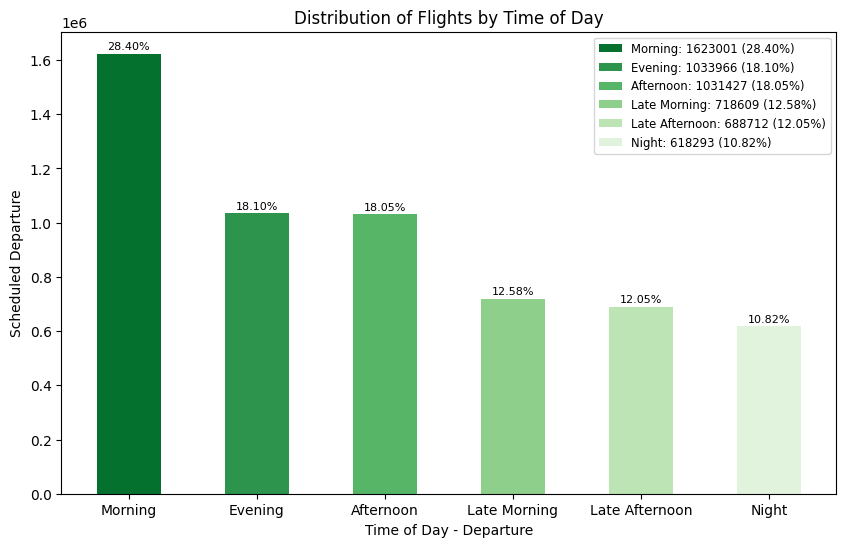

In [51]:
def bin_time_period(time_str):
    # Converting the time string to hours and minutes
    hours, minutes = map(int, time_str.split(':'))

    # time period bins
    if 5 <= hours < 10:
        return 'Morning'
    elif 10 <= hours < 12:
        return 'Late Morning'
    elif 12 <= hours < 15:
        return 'Afternoon'
    elif 15 <= hours < 17:
        return 'Late Afternoon'
    elif 17 <= hours < 20:
        return 'Evening'
    else:
        return 'Night'

# Creating a new column 'Time_Period'
dfoutputf['Time_Period'] = dfoutputf['SCHEDULED_DEPARTURE'].apply(bin_time_period)

colors = sns.color_palette("Greens", n_colors=6)[::-1]

# Creating a bar plot
plt.figure(figsize=(10, 6))
data = dfoutputf['Time_Period'].value_counts()
total_count = data.sum()
percentage = [(count / total_count) * 100 for count in data]

bars = plt.bar(data.index, data, color=colors, width=0.5)


for bar, percent in zip(bars, percentage):
    height = bar.get_height()
    plt.annotate(f'{percent:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', fontsize=8)

legend_labels = [f'{index}: {count} ({percent:.2f}%)' for index, count, percent in zip(data.index, data, percentage)]
plt.legend(bars, legend_labels, loc='upper right', fontsize='small')

plt.xlabel('Time of Day - Departure')
plt.ylabel('Scheduled Departure')
plt.title('Distribution of Flights by Time of Day')
plt.grid(False)
plt.show()

In [52]:
dfoutputf.head(4)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   

  ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  ... AIR_TIME  \
0            ANC                 SEA               00:05  ...    169.0   
1            LAX                 PBI               00:10  ...    263.0   
2            SFO                 CLT               00:20  ...    266.0   
3            LAX                 MIA               00:20  ...    258.0   

   DISTANCE  WHEELS_ON TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0      1448      04:04     4.0              04:30         04:08   
1      2330      07:37     4.0              07:50         07:41   
2      2296      08:00    11.0              08:06         08:11   
3      2342      07:48     8.0              08:05         07:56   

   ARRIVAL_DELAY  DIVERTED CANCELLED  Time_Period  
0          -22.0         0         0        Night  
1           -9.0         0         0        Night  
2            5.0         0         0        Night  
3           -9.0         0         0        Night  

[4 rows x 26 columns]

In [53]:
dfoutputf['Time_Period'].value_counts()

Time_Period
Morning           1623001
Evening           1033966
Afternoon         1031427
Late Morning       718609
Late Afternoon     688712
Night              618293
Name: count, dtype: int64

In [54]:
dfoutputf.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE     object
DEPARTURE_TIME          object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF              object
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON               object
TAXI_IN                float64
SCHEDULED_ARRIVAL       object
ARRIVAL_TIME            object
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
Time_Period             object
dtype: object

In [55]:
#Creating a Dictonary from our dataset to combine data
pd.DataFrame.iteritems = pd.DataFrame.items
def create_dict(dfObj):
    dict_obj={}
    for index, row in dfObj.T.iteritems():
        dict_obj.update({row[0]:row[1]})
    return dict_obj 

In [56]:
airline_dict=create_dict(dfAirlines)
dfoutputf["AIRLINE_NAME"]=dfoutputf['AIRLINE'].map(airline_dict)
dfoutputf.head(3)

C:\Users\arjun\AppData\Local\Temp\ipykernel_17256\3806910838.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dict_obj.update({row[0]:row[1]})


YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   

  ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  ... DISTANCE  \
0            ANC                 SEA               00:05  ...     1448   
1            LAX                 PBI               00:10  ...     2330   
2            SFO                 CLT               00:20  ...     2296   

   WHEELS_ON  TAXI_IN SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
0      04:04      4.0             04:30         04:08          -22.0   
1      07:37      4.0             07:50         07:41           -9.0   
2      08:00     11.0             08:06         08:11            5.0   

   DIVERTED  CANCELLED Time_Period            AIRLINE_NAME  
0         0          0       Night    Alaska Airlines Inc.  
1         0          0       Night  American Airlines Inc.  
2         0          0       Night         US Airways Inc.  

[3 rows x 27 columns]

In [57]:
dfoutputf = dfoutputf.drop(columns=['AIRLINE'])

In [58]:
dfoutputf.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Time_Period', 'AIRLINE_NAME'],
      dtype='object')

### Mapping Features from the Airline and Airport dataset to our main dataset

In [59]:
# Creating a dictionary to map IATA_CODE to CITY, STATE, LATITUDE, and LONGITUDE
airport_mapping = dfAirports[['IATA_CODE', 'CITY', 'STATE', 'LATITUDE', 'LONGITUDE']].set_index('IATA_CODE').to_dict(orient='index')

# Mapping 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT' to create four new columns 'ORIGIN_CITY' 'ORIGIN_STATE' 'DESTINATION_CITY' 'DESTINATION_STATE'
dfoutputf['ORIGIN_CITY'] = dfoutputf['ORIGIN_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('CITY'))
dfoutputf['ORIGIN_STATE'] = dfoutputf['ORIGIN_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('STATE'))
dfoutputf['DESTINATION_CITY'] = dfoutputf['DESTINATION_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('CITY'))
dfoutputf['DESTINATION_STATE'] = dfoutputf['DESTINATION_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('STATE'))

# Mapping 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT' to create four new columns ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE'
dfoutputf['ORIGIN_LATITUDE'] = dfoutputf['ORIGIN_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('LATITUDE'))
dfoutputf['ORIGIN_LONGITUDE'] = dfoutputf['ORIGIN_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('LONGITUDE'))
dfoutputf['DESTINATION_LATITUDE'] = dfoutputf['DESTINATION_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('LATITUDE'))
dfoutputf['DESTINATION_LONGITUDE'] = dfoutputf['DESTINATION_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('LONGITUDE'))

# Printing the updated DataFrame
print(dfoutputf)

         YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4             98      N407AS   
1        2015      1    1            4           2336      N3KUAA   
2        2015      1    1            4            840      N171US   
3        2015      1    1            4            258      N3HYAA   
4        2015      1    1            4            135      N527AS   
...       ...    ...  ...          ...            ...         ...   
5819074  2015     12   31            4            688      N657JB   
5819075  2015     12   31            4            745      N828JB   
5819076  2015     12   31            4           1503      N913JB   
5819077  2015     12   31            4            333      N527JB   
5819078  2015     12   31            4            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE DEPARTURE_TIME  \
0                  ANC                 SEA               00:05          23:54   
1        

In [60]:
dfoutputf.head(3)

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
0  2015      1    1            4             98      N407AS            ANC   
1  2015      1    1            4           2336      N3KUAA            LAX   
2  2015      1    1            4            840      N171US            SFO   

  DESTINATION_AIRPORT SCHEDULED_DEPARTURE DEPARTURE_TIME  ...  Time_Period  \
0                 SEA               00:05          23:54  ...        Night   
1                 PBI               00:10          00:02  ...        Night   
2                 CLT               00:20          00:18  ...        Night   

             AIRLINE_NAME    ORIGIN_CITY  ORIGIN_STATE  DESTINATION_CITY  \
0    Alaska Airlines Inc.      Anchorage            AK           Seattle   
1  American Airlines Inc.    Los Angeles            CA   West Palm Beach   
2         US Airways Inc.  San Francisco            CA         Charlotte   

   DESTINATION_STATE  ORIGIN_LATITUDE ORIGIN_LONGITUDE  DESTINATION_LATITUDE  \
0                 WA         61.17432       -149.99619              47.44898   
1                 FL         33.94254       -118.40807              26.68316   
2                 NC         37.61900       -122.37484              35.21401   

  DESTINATION_LONGITUDE  
0            -122.30931  
1             -80.09559  
2             -80.94313  

[3 rows x 34 columns]

In [61]:
dfoutputf.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Time_Period', 'AIRLINE_NAME', 'ORIGIN_CITY',
       'ORIGIN_STATE', 'DESTINATION_CITY', 'DESTINATION_STATE',
       'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DESTINATION_LATITUDE',
       'DESTINATION_LONGITUDE'],
      dtype='object')

### Removing Rows of cancelled flights

In [62]:
# As cancelled column as 2 category in output '0' and '1' where 0 means the flights were not cancelled and 1 means the flights were cancelled. 
# In this project, we are just dealing with the delayed flights not with cancelled flights.
dfoutputf.drop(dfoutputf[dfoutputf['CANCELLED'] == 1].index, inplace=True)

In [63]:
dfoutputf.shape

(5714008, 34)

In [64]:
dfoutputf.drop(['CANCELLED'],axis=1, inplace=True)

In [65]:
dfoutputf.shape

(5714008, 33)

In [66]:
# Adding a new column 'FLIGHT_DELAY_CATEGORY' to dfoutputf
dfoutputf['FLIGHT_DELAY_CATEGORY'] = dfoutputf['ARRIVAL_DELAY']

In [67]:
dfoutputf['TAIL_NUMBER'] = dfoutputf['TAIL_NUMBER'].astype(str)
dfoutputf['FLIGHT_NUMBER'] = dfoutputf['FLIGHT_NUMBER'].astype(str)  

### Classifying 'Flight Delay Category' into 3 classes based on 'Arrival Delay' attribute

In [68]:
#  Labeling the classes as 0 to 2, where 'On Time' is 0, 'Minor Delay' is 1, 'Major Delay' is 2 for the 'FLIGHT_DELAY_CATEGORY' column.
def classify_delay_time(delay):
    if delay <= 0:
        return 0  # 'On Time'
    elif 0 < delay <= 15:
        return 1  # 'Minor Delay'
    else:
        return 2  # ' Major Delay'

dfoutputf['FLIGHT_DELAY_CATEGORY'] = dfoutputf['ARRIVAL_DELAY'].apply(classify_delay_time)

### Observing the distribution of the Target Variable using Bar Chart

In [69]:
dfoutputf['FLIGHT_DELAY_CATEGORY'].value_counts()

FLIGHT_DELAY_CATEGORY
0    3627112
1    1063398
2    1023498
Name: count, dtype: int64

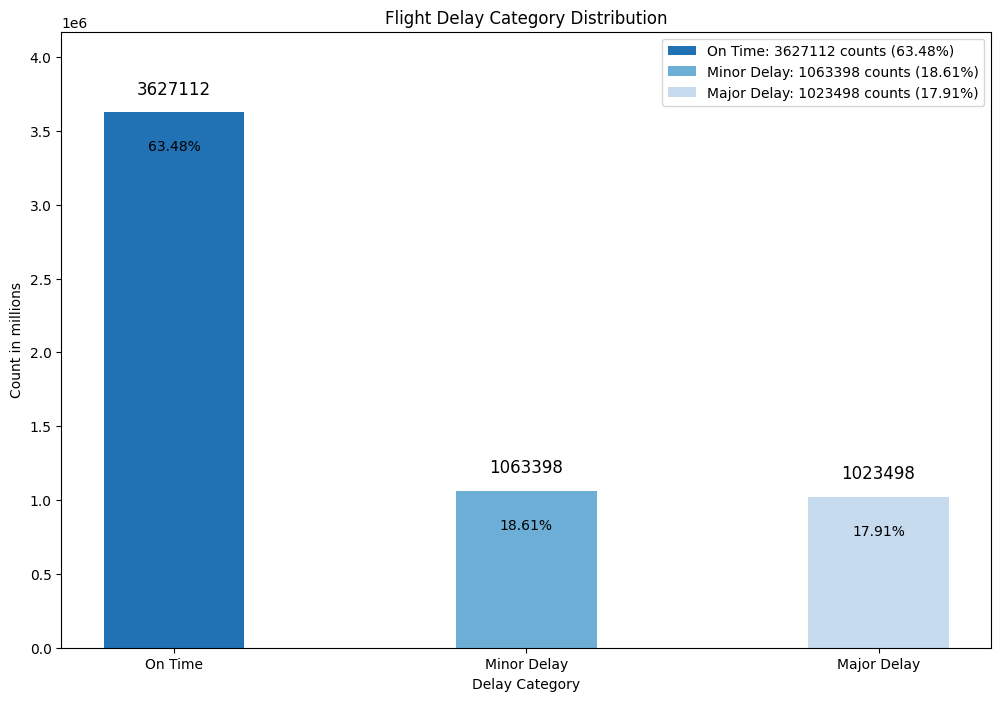

In [70]:
# Mapping of class labels
class_labels = {
    0: 'On Time',
    1: 'Minor Delay',
    2: 'Major Delay'
}

class_counts = dfoutputf['FLIGHT_DELAY_CATEGORY'].value_counts()

# Sorting in descending order
sorted_class_counts = class_counts.loc[class_labels.keys()]

colors = sns.color_palette("Blues_r", n_colors=len(class_labels))
legend_labels = [f'{label}: {count} counts ({count/len(dfoutputf)*100:.2f}%)' for label, count in zip(class_labels.values(), sorted_class_counts)]

# Creating a bar chart for viz
plt.figure(figsize=(12, 8))  
bar_width = 0.4  
bars = plt.bar(class_labels.values(), sorted_class_counts, color=colors, width=bar_width)
plt.xlabel('Delay Category')
plt.ylabel('Count in millions')
plt.title('Flight Delay Category Distribution')
plt.ylim(0, max(sorted_class_counts) * 1.15) 

# Adding labels for percentage and value counts
for bar in bars:
    height = bar.get_height()
    percentage = height / len(dfoutputf) * 100
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', 
                 fontsize=12)  
    plt.annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, -20), textcoords="offset points", ha='center', va='top', 
                 fontsize=10)  

plt.grid(False)
plt.legend(bars, legend_labels, loc='upper right')

plt.show()


In [71]:
# Giving Class labels to class 0,1,2
class_labels = {
    0: 'On Time',
    1: 'Minor Delay',
    2: 'Major Delay'
}

sample_per_class = dfoutputf['FLIGHT_DELAY_CATEGORY'].value_counts()
percentage_distribution = sample_per_class / sample_per_class.sum() * 100
percentage_distribution_str = percentage_distribution.apply(lambda x: f'{x:.2f}%')

# Creating a new DataFrame with the desired format
result_df = pd.DataFrame({
    'Sr. No.': range(1, len(sample_per_class) + 1),
    'Class Name': [class_labels[i] for i in sample_per_class.index],
    'Count': sample_per_class.values,
    'Category': sample_per_class.index,
    'Percentage_Count': percentage_distribution_str.values
})

# Displaying the new DataFrame without the index column
print(result_df.to_string(index=False))


 Sr. No.  Class Name   Count  Category Percentage_Count
       1     On Time 3627112         0           63.48%
       2 Minor Delay 1063398         1           18.61%
       3 Major Delay 1023498         2           17.91%


# Section 4 : Performing Exploratory Data Analysis (EDA)

In [75]:
dfoutputf['FLIGHT_DELAY'] = dfoutputf['ARRIVAL_DELAY'].map( lambda x : 'YES' if x>0 else 'NO')

In [76]:
dfoutputf.shape, dfAirlines.shape,  dfAirports.shape

((5714008, 36), (14, 2), (322, 7))

In [77]:
dfoutputf.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'Time_Period', 'AIRLINE_NAME', 'ORIGIN_CITY',
       'ORIGIN_STATE', 'DESTINATION_CITY', 'DESTINATION_STATE',
       'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DESTINATION_LATITUDE',
       'DESTINATION_LONGITUDE', 'FLIGHT_DELAY_CATEGORY', 'DAY_OF_WEEK_NAME',
       'FLIGHT_DELAY'],
      dtype='object')

In [78]:
dfAirlines.columns

Index(['IATA_CODE', 'AIRLINE'], dtype='object')

In [79]:
dfAirports.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

### Exploring Arrival Delay Counts just to understand how many percentage of flights were delayed in total

In [80]:
# We then counted number of sample per class to understanding the nature of data
sample_per_class=dfoutputf['FLIGHT_DELAY'].groupby(dfoutputf['FLIGHT_DELAY']).count()
sample_per_class

FLIGHT_DELAY
NO     3627112
YES    2086896
Name: FLIGHT_DELAY, dtype: int64

In [81]:
# We created new dataset only for delayed flights named as 'flight delay'
delay_flights=dfoutputf[dfoutputf['FLIGHT_DELAY']=='YES']
print("Total flights: {}". format(dfoutputf.shape[0]))
print("Total delay flights: {}". format(delay_flights.shape[0]))
print("Percentage of flights delay {}".format((delay_flights.shape[0]/dfoutputf.shape[0])*100))

Total flights: 5714008
Total delay flights: 2086896
Percentage of flights delay 36.52245499131258


# Checking the distribution of on time and delayed flight with bar chart

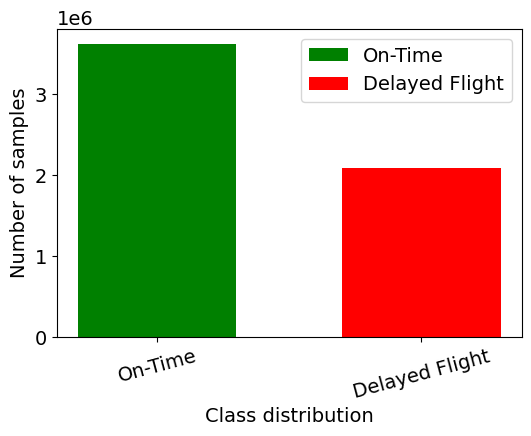

In [68]:
# Defining colors for "On-Time" and "Delayed Flight"
colors = ['green', 'red']

# Setting the font size for the plot
font = {'size': 14}
plt.rc('font', **font)

# Creating a figure and axis with a more appropriate size
fig, ax = plt.subplots(figsize=(6, 4))

# Grouping the data
sample_per_delay_class = dfoutputf['FLIGHT_DELAY'].groupby(dfoutputf['FLIGHT_DELAY']).count()
x = sample_per_delay_class.index.values

# Setting a reasonable width for the bars
bar_width = 0.6

# Creating the bar chart with colors and reduced thickness
bars = ax.bar(x, sample_per_delay_class, width=bar_width, align='center', color=colors, label=['On-Time', 'Delayed Flight'])

# Setting labels and titles
ax.set_ylabel('Number of samples')
ax.set_xlabel('Class distribution')
ax.set_xticks(x)
ax.set_xticklabels(['On-Time', 'Delayed Flight'], rotation=15)

# Adding legend for both "On-Time" and "Delayed Flight" 
ax.legend(loc='upper right')

# Showing the plot
plt.show()


In [69]:
dfoutputf.shape, dfAirlines.shape,  dfAirports.shape

((5714008, 35), (14, 2), (322, 7))

## Exploring Arrival Delay by Airlines

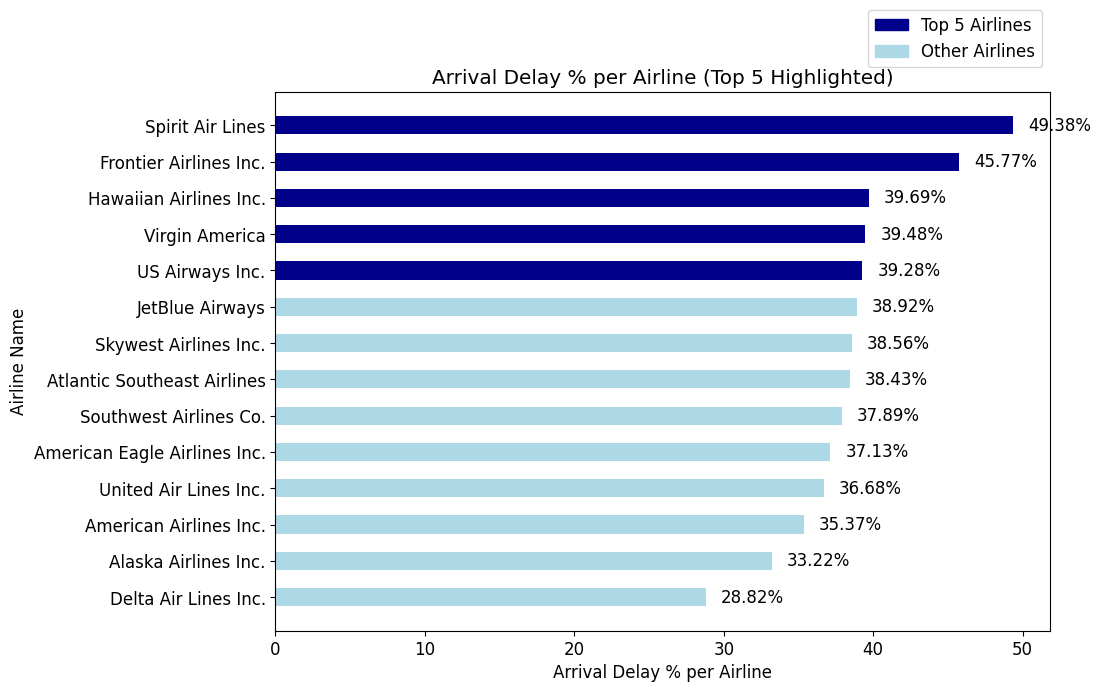

In [109]:
delay_by_airline=delay_flights['FLIGHT_DELAY'].groupby(dfoutputf['AIRLINE_NAME']).count()
airline_flight_total=dfoutputf['FLIGHT_DELAY'].groupby(dfoutputf['AIRLINE_NAME']).count()

airlines = sorted(['United Air Lines Inc.', 'American Airlines Inc.', 'US Airways Inc.',
           'Frontier Airlines Inc.',    'JetBlue Airways',       'Skywest Airlines Inc.',
           'Alaska Airlines Inc.',    'Spirit Air Lines',       'Southwest Airlines Co.',
           'Delta Air Lines Inc.',    'Atlantic Southeast Airlines',  'Hawaiian Airlines Inc.',
           'American Eagle Airlines Inc.',        'Virgin America'])

# Calculating the Arrival Delay % per airline
airline_delay_frac = np.divide(delay_by_airline, airline_flight_total)
airline_delay_frac = airline_delay_frac.sort_values(ascending=False)  # Sort by descending order

# Extracting the top 5 airlines
top_5_airlines = airline_delay_frac.head(5).index

font = {'size': 12}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(10, 7))

colors = ['darkblue' if airline in top_5_airlines else 'lightblue' for airline in airline_delay_frac.index]

bar_width = 0.5
bars = ax.barh(airline_delay_frac.index, airline_delay_frac * 100, color=colors, height=bar_width)

ax.set_xlabel('Arrival Delay % per Airline')
ax.set_ylabel('Airline Name')
ax.set_yticks(airline_delay_frac.index)
ax.invert_yaxis()  # To arrange from highest to least
ax.set_title('Arrival Delay % per Airline (Top 5 Highlighted)')

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1  # Adjust the position for label
    ax.text(label_x_pos, bar.get_y() + bar_width / 2, f'{width:.2f}%', va='center')

legend_handles = [mpatches.Patch(color='darkblue', label='Top 5 Airlines'), mpatches.Patch(color='lightblue', label='Other Airlines')]
ax.legend(handles=legend_handles, loc='lower right', bbox_to_anchor=(1, 1.03))

plt.show()


In [72]:
# Converting Days number to Categorical Values
days_arr={1:'MONDAY',2:'TUESDAY',3:'WEDNESDAY',4:'THRUSDAY',5:'FRIDAY',6:'SATURDAY',7:'SUNDAY'}
dfoutputf['DAY_OF_WEEK_NAME']=dfoutputf['DAY_OF_WEEK'].map(days_arr)

In [82]:
# Adding a new feature
delay_flights.loc[:,'DAY_OF_WEEK_NAME']=delay_flights.loc[:,'DAY_OF_WEEK'].map(days_arr)

In [83]:
delay_flights.head(4)

YEAR  MONTH  DAY  DAY_OF_WEEK FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
2   2015      1    1            4           840      N171US            SFO   
5   2015      1    1            4           806      N3730B            SFO   
14  2015      1    1            4          2440      N651DL            SEA   
20  2015      1    1            4           520      N525NK            LAS   

   DESTINATION_AIRPORT SCHEDULED_DEPARTURE DEPARTURE_TIME  ...  ORIGIN_STATE  \
2                  CLT               00:20          00:18  ...            CA   
5                  MSP               00:25          00:20  ...            CA   
14                 MSP               00:40          00:39  ...            WA   
20                 MCI               00:55          01:20  ...            NV   

    DESTINATION_CITY DESTINATION_STATE  ORIGIN_LATITUDE  ORIGIN_LONGITUDE  \
2          Charlotte                NC         37.61900        -122.37484   
5        Minneapolis                MN         37.61900        -122.37484   
14       Minneapolis                MN         47.44898        -122.30931   
20       Kansas City                MO         36.08036        -115.15233   

    DESTINATION_LATITUDE  DESTINATION_LONGITUDE FLIGHT_DELAY_CATEGORY  \
2               35.21401              -80.94313                     1   
5               44.88055              -93.21692                     1   
14              44.88055              -93.21692                     1   
20              39.29761              -94.71391                     1   

    DAY_OF_WEEK_NAME FLIGHT_DELAY  
2           THRUSDAY          YES  
5           THRUSDAY          YES  
14          THRUSDAY          YES  
20          THRUSDAY          YES  

[4 rows x 36 columns]

## Exploring Delays by Day of the Week

C:\Users\arjun\AppData\Local\Temp\ipykernel_17256\2016060546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_flights['DAY_OF_WEEK_NAME'] = delay_flights['DAY_OF_WEEK'].map(days_arr)


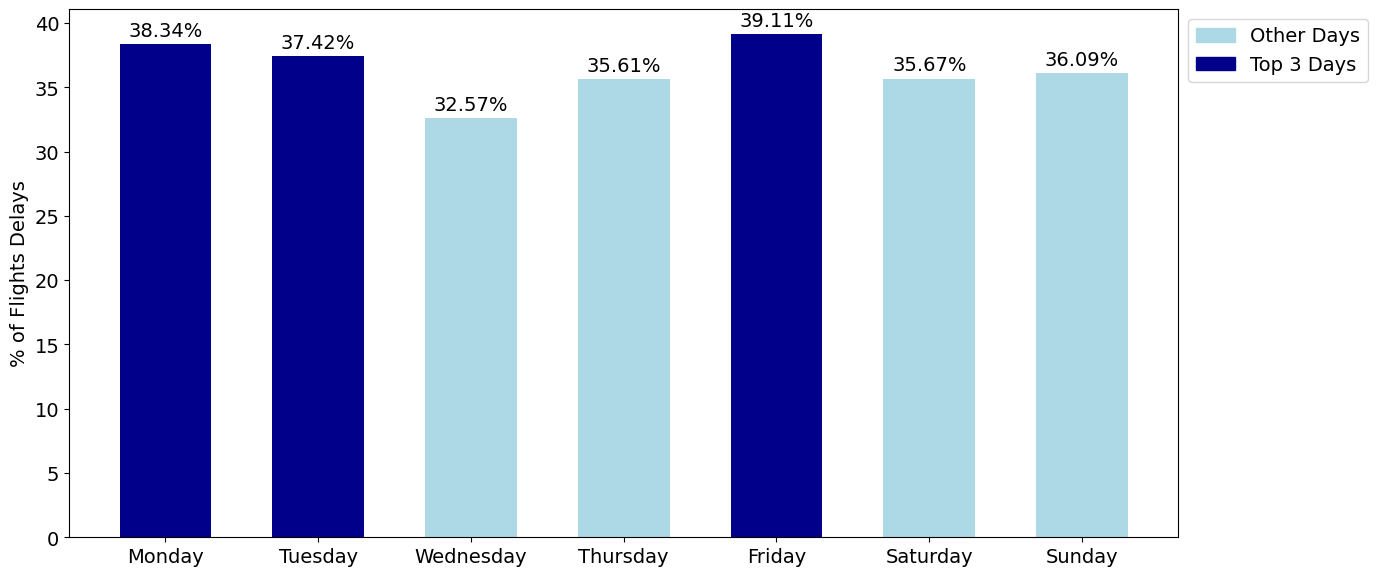

In [84]:
days_arr = {1: 'MONDAY', 2: 'TUESDAY', 3: 'WEDNESDAY', 4: 'THURSDAY', 5: 'FRIDAY', 6: 'SATURDAY', 7: 'SUNDAY'}
dfoutputf['DAY_OF_WEEK_NAME'] = dfoutputf['DAY_OF_WEEK'].map(days_arr)
delay_flights['DAY_OF_WEEK_NAME'] = delay_flights['DAY_OF_WEEK'].map(days_arr)

font = {'size': 14}
plt.rc('font', **font)

days_delays = delay_flights['FLIGHT_DELAY'].groupby(delay_flights['DAY_OF_WEEK_NAME']).count()
days_totals = dfoutputf['FLIGHT_DELAY'].groupby(dfoutputf['DAY_OF_WEEK_NAME']).count()
days_frac = (days_delays / days_totals) * 100

week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

x = [day for day in week]
fig, ax = plt.subplots(figsize=(14, 6))  # Increased width

bar_width = 0.6
colors = ['lightblue'] * 7
top_3_days = ['Friday', 'Monday', 'Tuesday']

for i, day in enumerate(x):
    if day in top_3_days:
        colors[i] = 'darkblue'

bars = ax.bar(x, days_frac, color=colors, width=bar_width)

for bar, percentage in zip(bars, days_frac):
    ax.annotate(f'{percentage:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_ylabel('% of Flights Delays')
ax.set_xticks(x)
ax.set_xticklabels(x)

legend_labels = ['Other Days', 'Top 3 Days']
legend_handles = [mpatches.Patch(color='lightblue', label='Other Days'),
                  mpatches.Patch(color='darkblue', label='Top 3 Days')]

ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium')

plt.tight_layout()
plt.show()


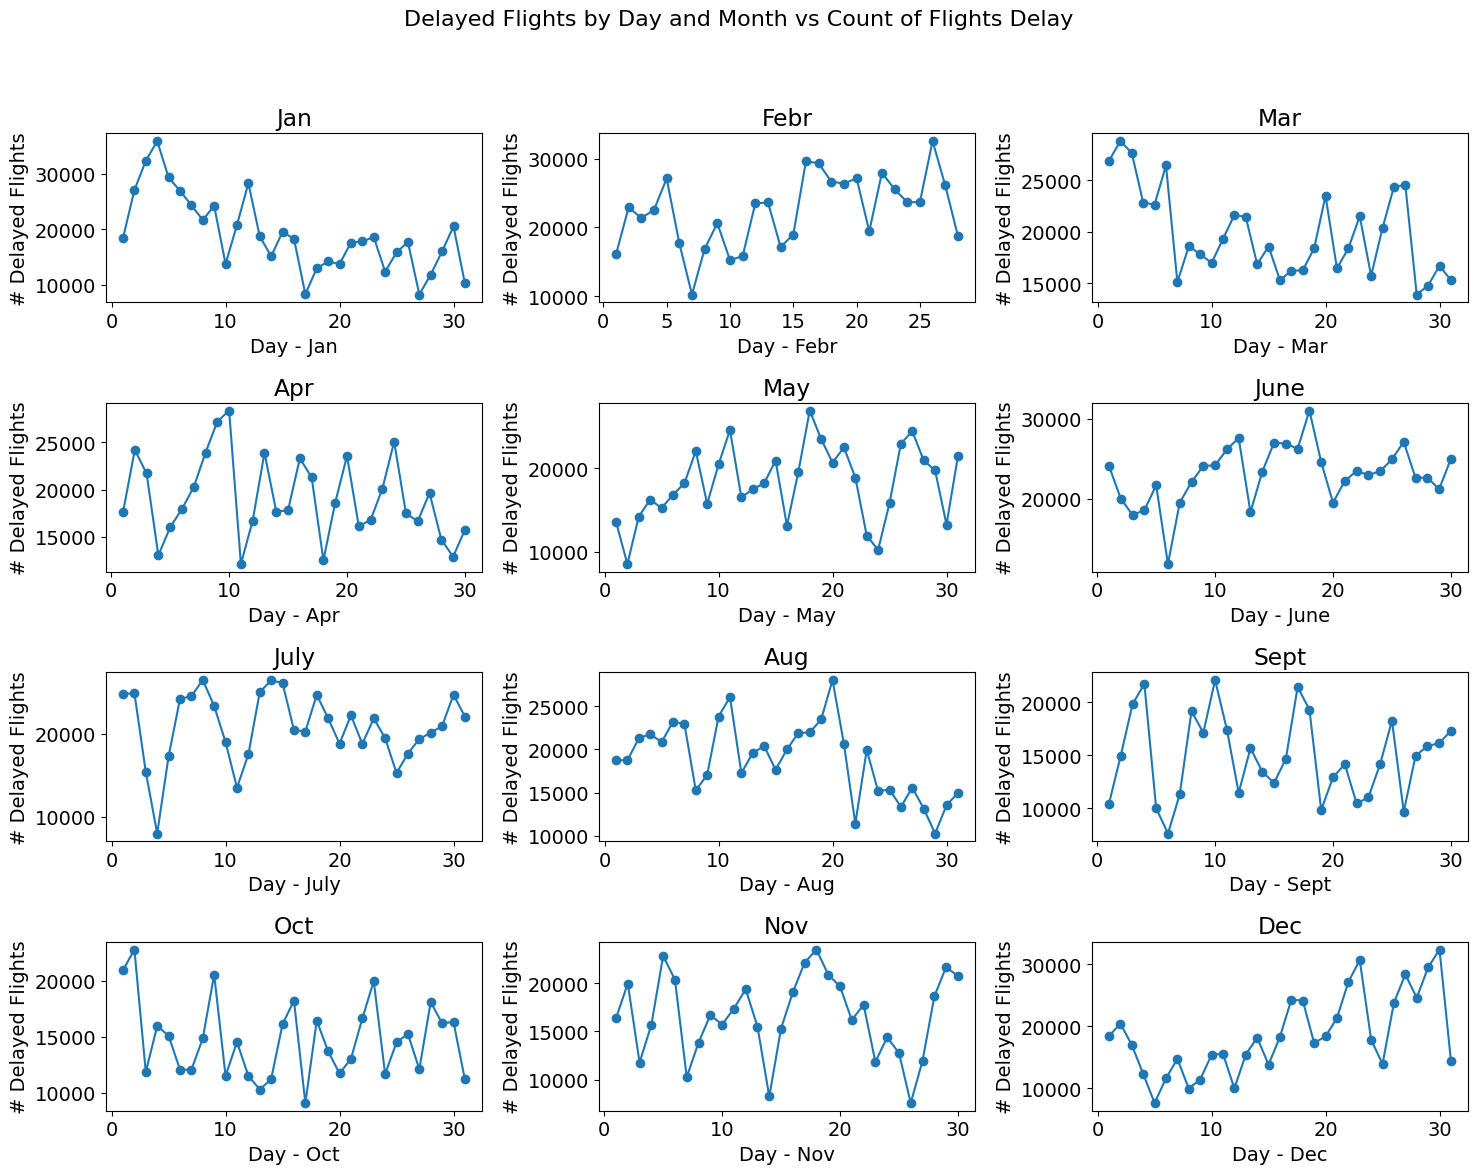

In [75]:
# Mapping months for viz
month_names = {
    1: 'Jan',
    2: 'Febr',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'Aug',
    9: 'Sept',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}


fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Delayed Flights by Day and Month vs Count of Flights Delay', fontsize=16)

# Iterating through the months
for month in range(1, 13):
    row = (month - 1) // 3  
    col = (month - 1) % 3   
    
    
    monthly_data = delay_flights[delay_flights['MONTH'] == month]
    
    days_in_month = monthly_data['DAY'].nunique()

    x = list(range(1, days_in_month + 1))
    y = [len(monthly_data[monthly_data['DAY'] == day]) / days_in_month * 100 for day in x]  # Calculate percentage
    
    ax = axes[row, col]
    ax.plot(x, y, marker='o', linestyle='-')
    
    ax.set_xlabel(f'Day - {month_names[month]}')
    ax.set_ylabel('# Delayed Flights')
    ax.set_title(month_names[month])
    

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.grid(False)
plt.show()

### Percentage and Count of Delayed Flights by Month

Jan: Percentage - 40.07%, Count - 183110
Febr: Percentage - 43.04%, Count - 175443
Mar: Percentage - 38.63%, Count - 190133
Apr: Percentage - 35.85%, Count - 171820
May: Percentage - 35.78%, Count - 175178
June: Percentage - 42.00%, Count - 206989
July: Percentage - 38.83%, Count - 199717
Aug: Percentage - 35.89%, Count - 180891
Sept: Percentage - 28.87%, Count - 133432
Oct: Percentage - 29.25%, Count - 141250
Nov: Percentage - 32.32%, Count - 149439
Dec: Percentage - 38.21%, Count - 179494


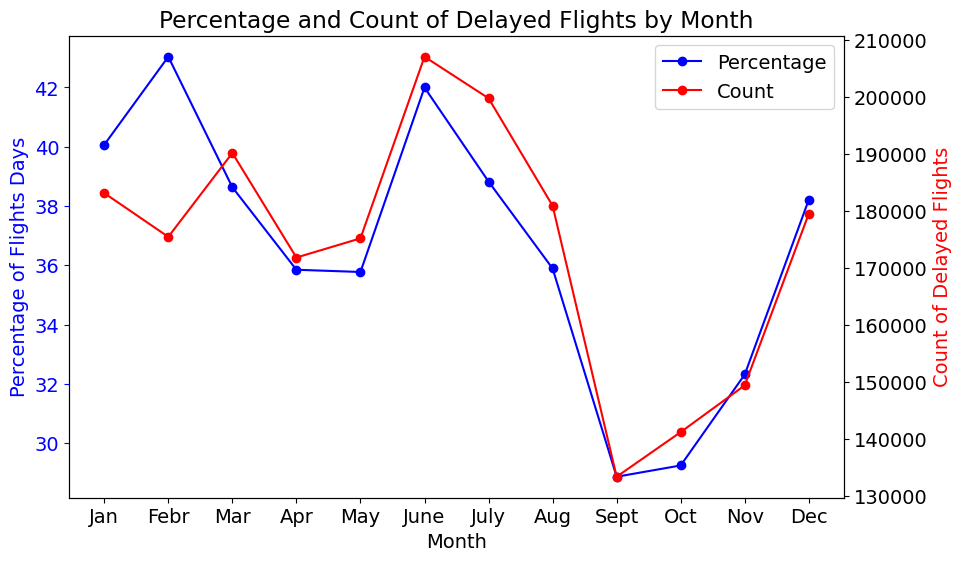

In [76]:
monthly_percentage = []
monthly_count = []

# Calculating the percentage and count of delayed flights
for month in range(1, 13):
    total_flights = dfoutputf[dfoutputf['MONTH'] == month].shape[0]
    delayed_flights = delay_flights[delay_flights['MONTH'] == month].shape[0]
    percentage = (delayed_flights / total_flights) * 100
    monthly_percentage.append(percentage)
    monthly_count.append(delayed_flights)
    print(f"{month_names[month]}: Percentage - {percentage:.2f}%, Count - {delayed_flights}")

# Plotting using line chart
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(list(month_names.values()), monthly_percentage, marker='o', linestyle='-', color='b', label='Percentage')
ax1.set_xlabel('Month')
ax1.set_ylabel('Percentage of Flights Days', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()
ax2.plot(list(month_names.values()), monthly_count, marker='o', linestyle='-', color='r', label='Count')
ax2.set_ylabel('Count of Delayed Flights', color='r')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Percentage and Count of Delayed Flights by Month')
plt.grid(False)
plt.show()


### Percentage of Flight Delays by Time of Day

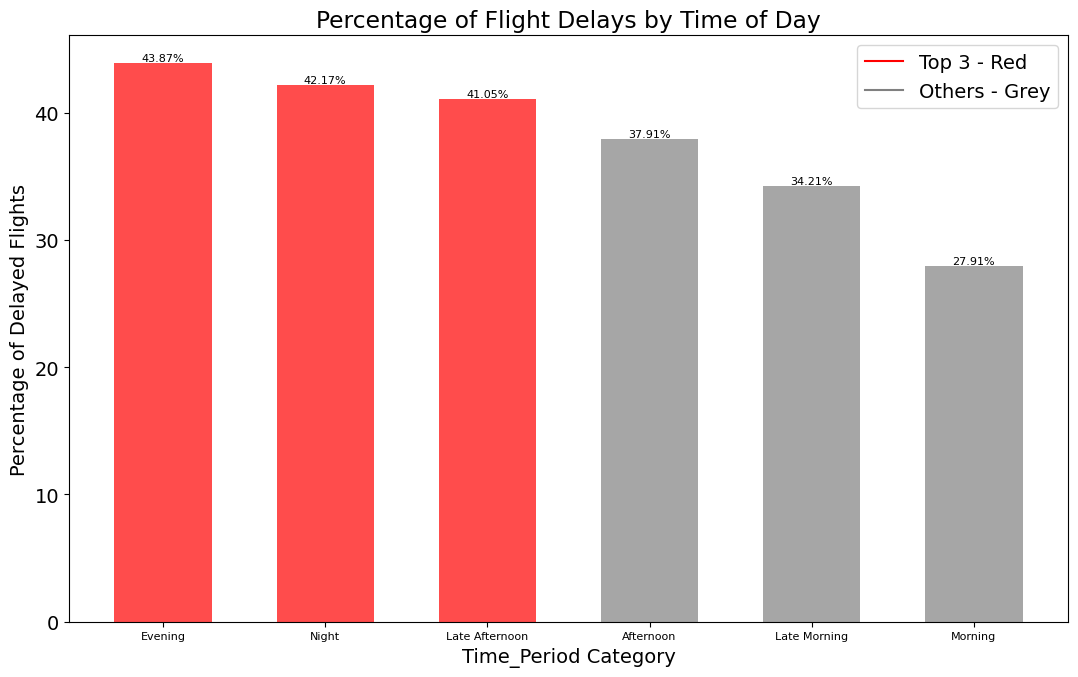

In [77]:
delay_flights=dfoutputf[dfoutputf['FLIGHT_DELAY']=='YES']

time_categories = dfoutputf['Time_Period'].unique()
percentage_delays = []

for category in time_categories:
    total_flights = dfoutputf[dfoutputf['Time_Period'] == category].shape[0]
    delayed_flights = delay_flights[delay_flights['Time_Period'] == category].shape[0]
    percentage = (delayed_flights / total_flights) * 100
    percentage_delays.append(percentage)

# Sorting in descending order of percentage delays
sorted_categories = [x for _, x in sorted(zip(percentage_delays, time_categories), reverse=True)]
sorted_percentage_delays = sorted(percentage_delays, reverse=True)

top_3_categories = sorted_categories[:3]

# Create a vertical bar chart
plt.figure(figsize=(11, 7))
index = range(len(sorted_categories))
bar_width = 0.6
colors = ['grey' if category not in top_3_categories else 'red' for category in sorted_categories]
plt.bar(index, sorted_percentage_delays, color=colors, alpha=0.7, width=bar_width)

plt.xlabel('Time_Period Category')
plt.ylabel('Percentage of Delayed Flights')
plt.title('Percentage of Flight Delays by Time of Day')

plt.xticks(index, sorted_categories, fontsize=8)

# Annotating
for i in range(len(index)):
    plt.text(index[i], sorted_percentage_delays[i], f'{sorted_percentage_delays[i]:.2f}%', ha='center', va='bottom', fontsize=8)

percentage_legend = plt.Line2D([0], [0], color='red', label='Top 3 - Red')
grey_legend = plt.Line2D([0], [0], color='grey', label='Others - Grey')
plt.legend(handles=[percentage_legend, grey_legend], loc='upper right')

plt.tight_layout()
plt.show()


## Exploring Average Departure Delay in time based on US States

Top 5 States with Highest Average Departure Delay in mins:
   ORIGIN_STATE  DEPARTURE_DELAY
8            DE        29.568421
3            AS        20.965217
11           GU        15.083333
32           NJ        12.979498
21           MD        12.813128

Top 5 States with Least Average Departure Delay in mins:
   ORIGIN_STATE  DEPARTURE_DELAY
27           MT         2.016043
12           HI         2.125903
0            AK         2.659726
46           UT         4.388827
53           WY         4.623410


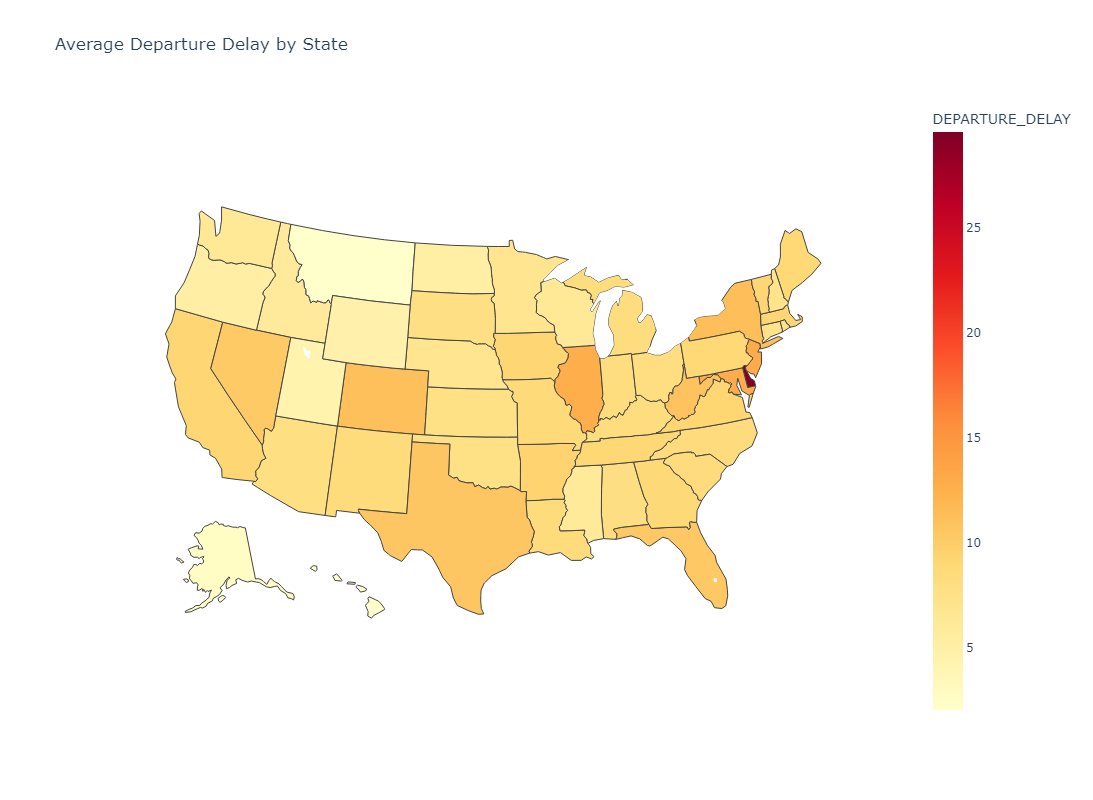

In [78]:
# Calculating the average departure delay in minutes for each state
state_avg_delay = dfoutputf.groupby('ORIGIN_STATE')['DEPARTURE_DELAY'].mean().reset_index()


fig_state = px.choropleth(
    state_avg_delay,
    locations='ORIGIN_STATE',
    locationmode="USA-states",  
    color='DEPARTURE_DELAY',
    color_continuous_scale="YlOrRd",
    title="Average Departure Delay by State",
    scope="usa",
)


fig_state.update_geos(projection_scale=1)

fig_state.update_layout(width=1200,  height=800)


top_5_states = state_avg_delay.nlargest(5, 'DEPARTURE_DELAY')
bottom_5_states = state_avg_delay.nsmallest(5, 'DEPARTURE_DELAY')

print("Top 5 States with Highest Average Departure Delay in mins:")
print(top_5_states)

print("\nTop 5 States with Least Average Departure Delay in mins:")
print(bottom_5_states)

fig_state.show()

## Exploring Avergae Arrival Delay in Time based on US States

Top 5 States with Highest Average Arrival Delay in mins:
   DESTINATION_STATE  ARRIVAL_DELAY
8                 DE      21.989474
11                GU      14.566667
49                VT       8.385727
3                 AS       7.844828
35                NY       7.617003

Top 5 States with Least Average Arrival Delay in mins:
   DESTINATION_STATE  ARRIVAL_DELAY
46                UT       0.127154
27                MT       0.438968
38                OR       1.760176
50                WA       1.859392
10                GA       1.984074


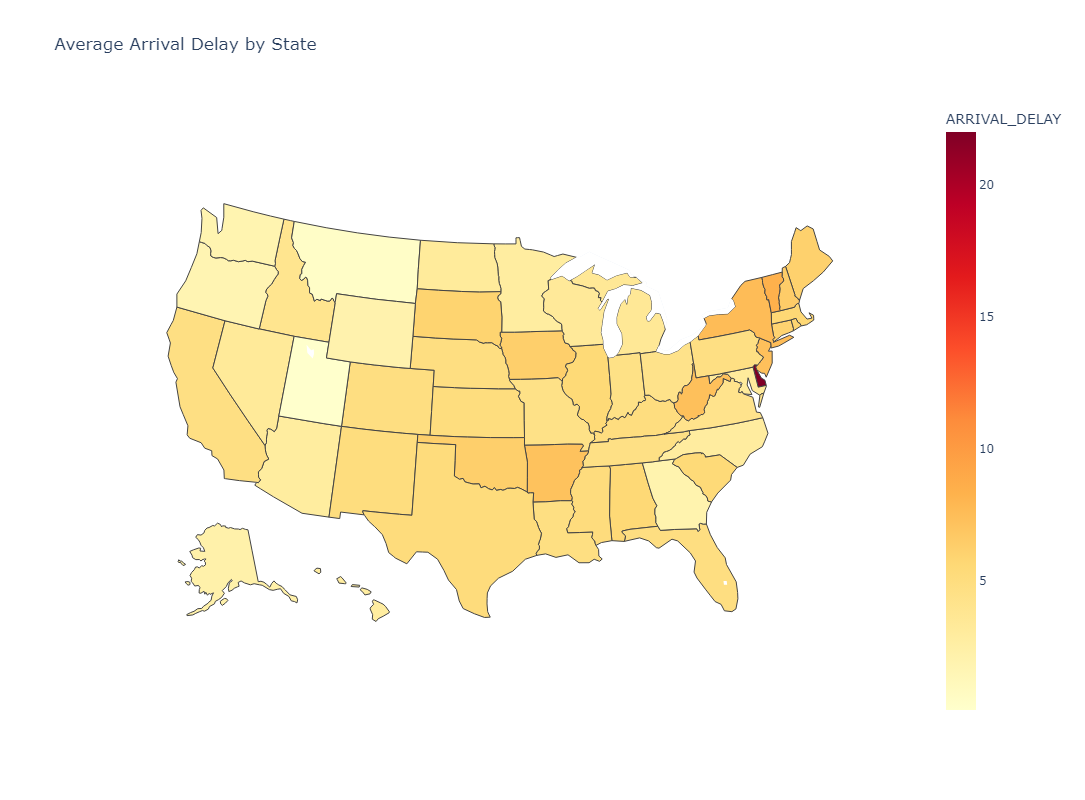

In [79]:
# Calculating the average arrival delay in minutes for each state
state_avg_delay = dfoutputf.groupby('DESTINATION_STATE')['ARRIVAL_DELAY'].mean().reset_index()


fig_state = px.choropleth(
    state_avg_delay,
    locations='DESTINATION_STATE',
    locationmode="USA-states",  
    color='ARRIVAL_DELAY',
    color_continuous_scale="YlOrRd",
    title="Average Arrival Delay by State",
    scope="usa",
)


fig_state.update_geos(
    projection_scale=1  
)


fig_state.update_layout(
    width=1200, 
    height=800 
)

top_5_states = state_avg_delay.nlargest(5, 'ARRIVAL_DELAY')
bottom_5_states = state_avg_delay.nsmallest(5, 'ARRIVAL_DELAY')

print("Top 5 States with Highest Average Arrival Delay in mins:")
print(top_5_states)

print("\nTop 5 States with Least Average Arrival Delay in mins:")
print(bottom_5_states)

fig_state.show()


## Exploring the Average Departure Delay Time at the Origin Airport

Top 5 Airports with Highest Average Departure Delay in mins:
    ORIGIN_AIRPORT  DEPARTURE_DELAY
155            ILG        29.568421
220            MVY        24.685185
148            HYA        23.182927
247            PPG        20.965217
232            OTH        19.000000

Top 5 Airports with Least Average Departure Delay in mins:
    ORIGIN_AIRPORT  DEPARTURE_DELAY
321            YAK        -6.265449
71             CNY        -6.058537
99             EKO        -3.933333
315            VEL        -3.740000
57             CDV        -3.460784


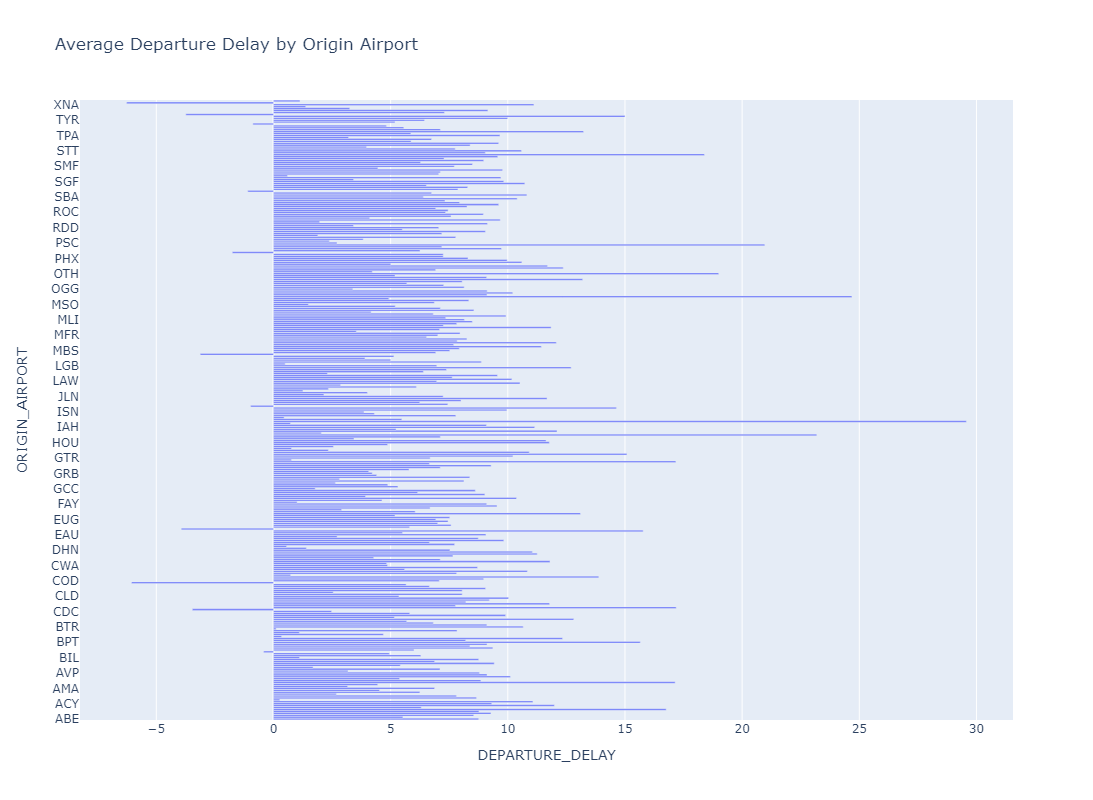

In [80]:
# Calculating the average departure delay in minutes for each origin airport
airport_avg_delay = dfoutputf.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()

top_5_airports = airport_avg_delay.nlargest(5, 'DEPARTURE_DELAY')
bottom_5_airports = airport_avg_delay.nsmallest(5, 'DEPARTURE_DELAY')


fig = px.bar(
    airport_avg_delay,
    x='DEPARTURE_DELAY',
    y='ORIGIN_AIRPORT',
    title="Average Departure Delay by Origin Airport",
    orientation='h' 
)

fig.update_layout(
    width=1200,  
    height=800 
)

print("Top 5 Airports with Highest Average Departure Delay in mins:")
print(top_5_airports)

print("\nTop 5 Airports with Least Average Departure Delay in mins:")
print(bottom_5_airports)

fig.show()



## Exploring the Average Departure Delay Time at the Destination Airport

Top 5 Airports with Highest Average Arrival Delay in mins:
    DESTINATION_AIRPORT  ARRIVAL_DELAY
294                 STC      23.025974
155                 ILG      21.989474
232                 OTH      17.832215
306                 TTN      16.154429
19                  ASE      15.638035

Top 5 Airports with Least Average Arrival Delay in mins:
    DESTINATION_AIRPORT  ARRIVAL_DELAY
315                 VEL     -13.761421
71                  CNY     -11.575610
157                 IMT      -8.166667
35                  BLI      -6.802276
190                 LWS      -6.636933


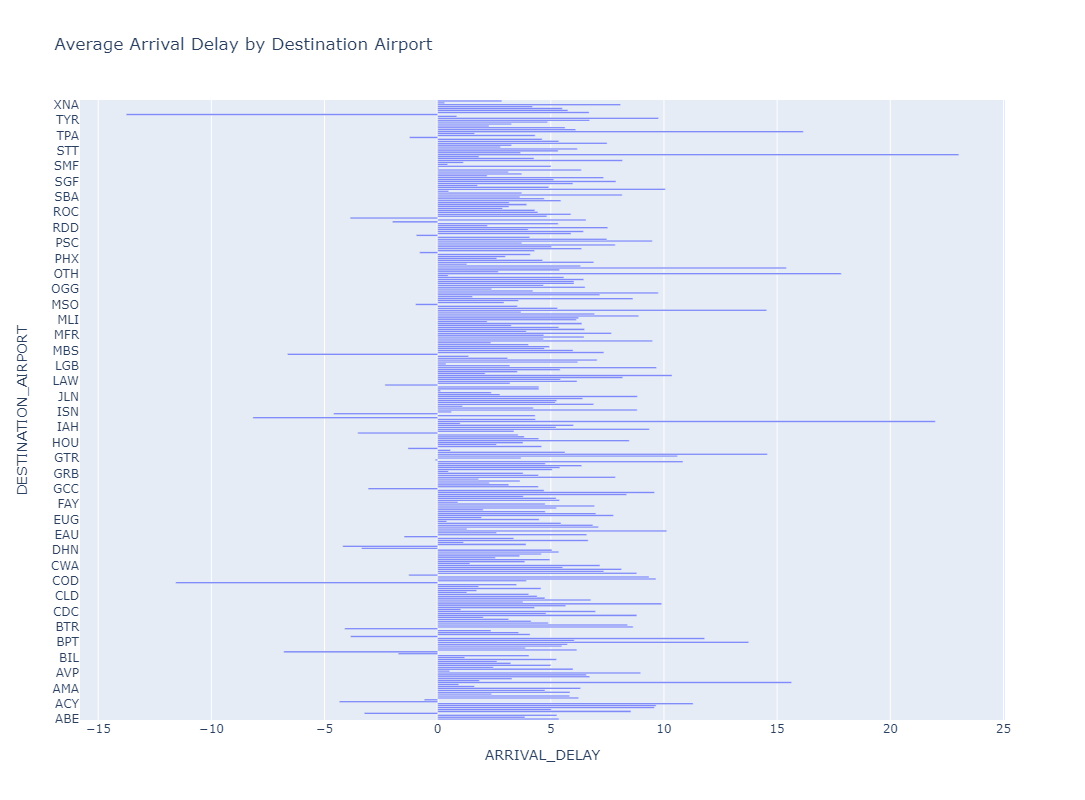

In [81]:
# Calculating the average arrival delay in minutes for each destination airport
airport_avg_delay = dfoutputf.groupby('DESTINATION_AIRPORT')['ARRIVAL_DELAY'].mean().reset_index()

top_5_airports = airport_avg_delay.nlargest(5, 'ARRIVAL_DELAY')
bottom_5_airports = airport_avg_delay.nsmallest(5, 'ARRIVAL_DELAY')


fig = px.bar(
    airport_avg_delay,
    x='ARRIVAL_DELAY',
    y='DESTINATION_AIRPORT',
    title="Average Arrival Delay by Destination Airport",
    orientation='h' 
)

fig.update_layout(
    width=1200,  
    height=800  
)

print("Top 5 Airports with Highest Average Arrival Delay in mins:")
print(top_5_airports)

print("\nTop 5 Airports with Least Average Arrival Delay in mins:")
print(bottom_5_airports)

fig.show()


## Exploring Delay by flight distances

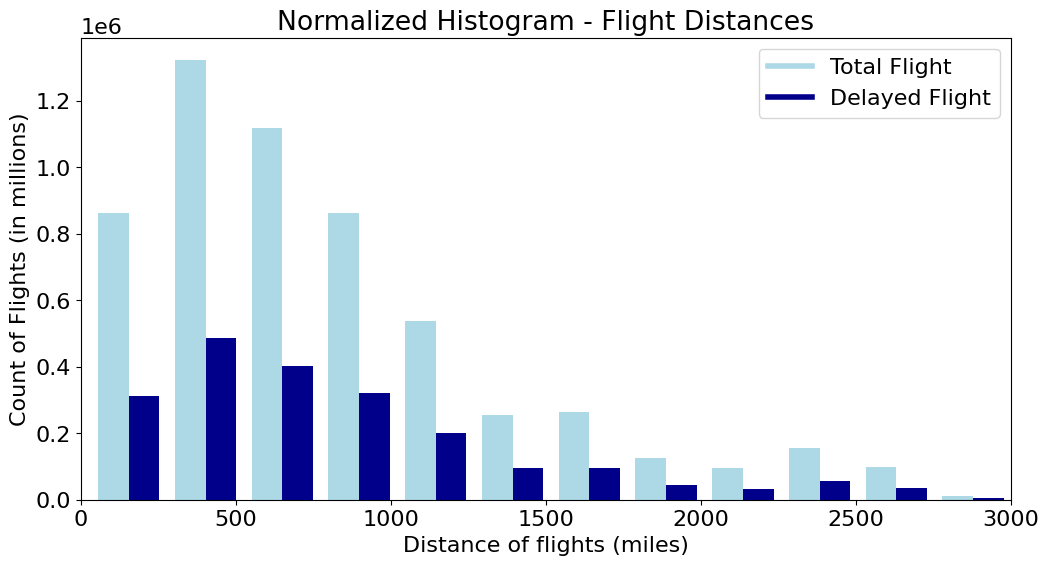

In [82]:
font = {'size': 16}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(12, 6))
hist_data = [dfoutputf['DISTANCE'], delay_flights['DISTANCE']]
labels = ['Total Flight', 'Delayed Flight']
bins = 20
bar_colors = ['lightblue', 'darkblue']  
legend_colors = ['lightblue', 'darkblue']  

n, bins, patches = ax.hist(hist_data, bins=bins, label=labels, color=bar_colors)

legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]

ax.set_xlim(0, 3000)
ax.set_xlabel('Distance of flights (miles)')
ax.set_ylabel('Count of Flights (in millions)')
ax.set_title('Normalized Histogram - Flight Distances')
plt.grid(False)

ax.legend(legend_labels, labels, loc='upper right')

plt.show()

In [83]:
dfoutputf.shape, dfAirlines.shape,  dfAirports.shape

((5714008, 36), (14, 2), (322, 7))

### Understanding Flight Arrival Delay on the Destination Airport by Airlines

C:\Users\arjun\AppData\Local\Temp\ipykernel_13872\976750976.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



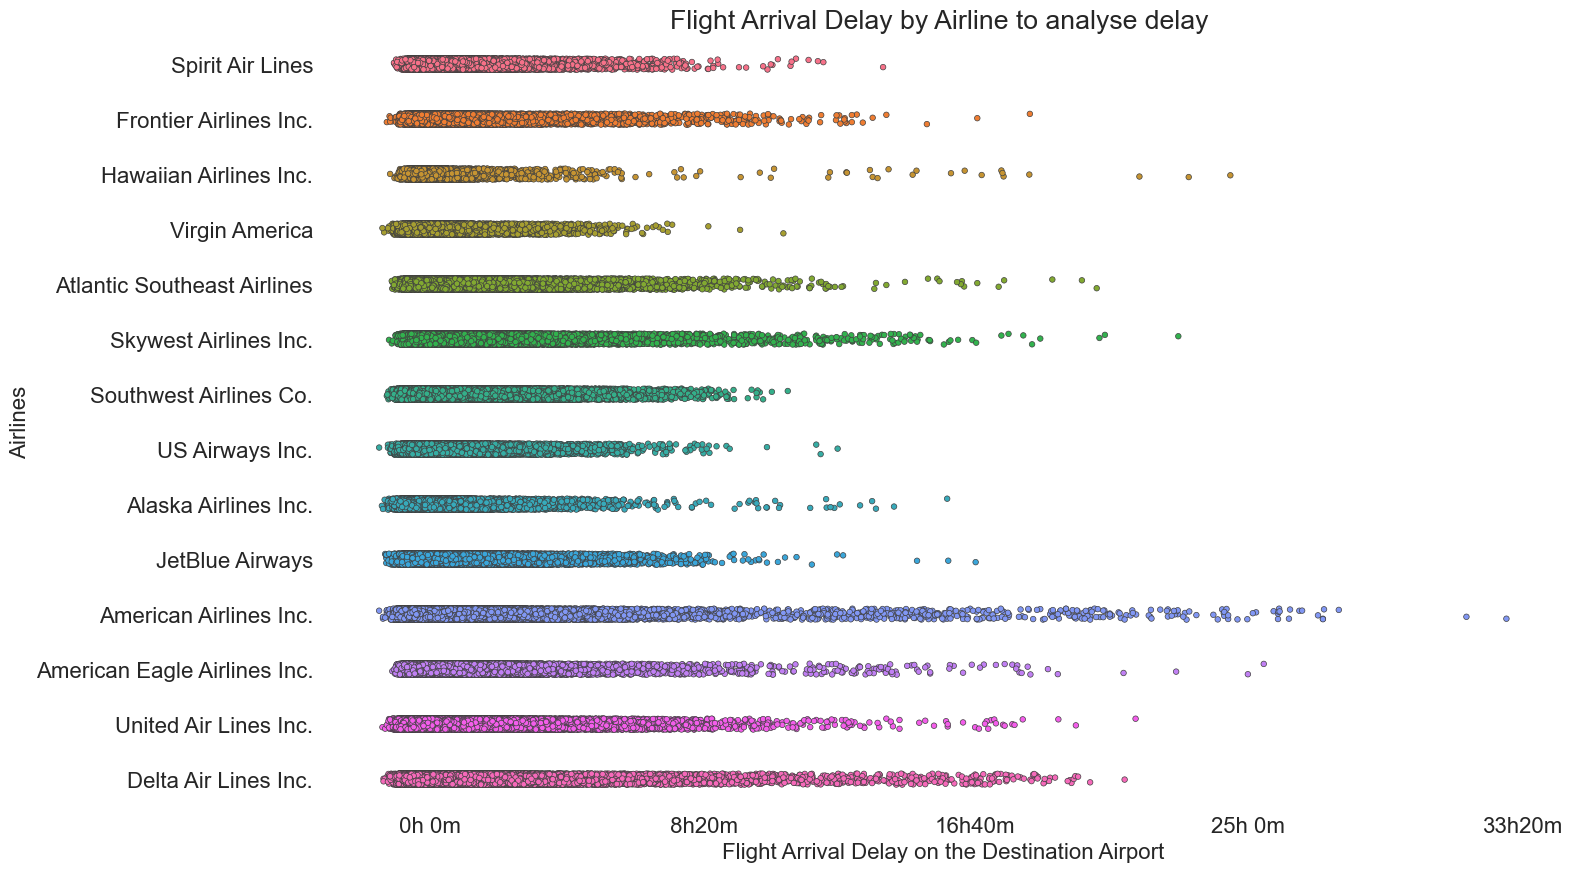

In [84]:
font = {'family': 'normal', 'weight': 'bold', 'size': 15}
sns.set_style('whitegrid')


median_delays = dfoutputf.groupby('AIRLINE_NAME')['ARRIVAL_DELAY'].median().sort_values(ascending=False)

sorted_df = dfoutputf.set_index('AIRLINE_NAME').loc[median_delays.index].reset_index()


fig_dim = (16, 10)
fig, ax = plt.subplots(figsize=fig_dim)

sns.despine(bottom=True, left=True)
sns.stripplot(x='ARRIVAL_DELAY', y='AIRLINE_NAME', hue='AIRLINE_NAME', data=sorted_df, size=4, linewidth=0.5, jitter=True)


plt.title('Flight Arrival Delay by Airline to analyse delay ')
plt.xlabel('Flight Arrival Delay on the Destination Airport')
plt.ylabel('Airlines')

ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)]) for x in ax.get_xticks()])

ax.yaxis.label.set_visible(True)

plt.grid(True, linestyle='--', alpha=0.7)
plt.grid(False)

plt.show()


## Exploring the number of departure delayed flights in millions based on delay time categories

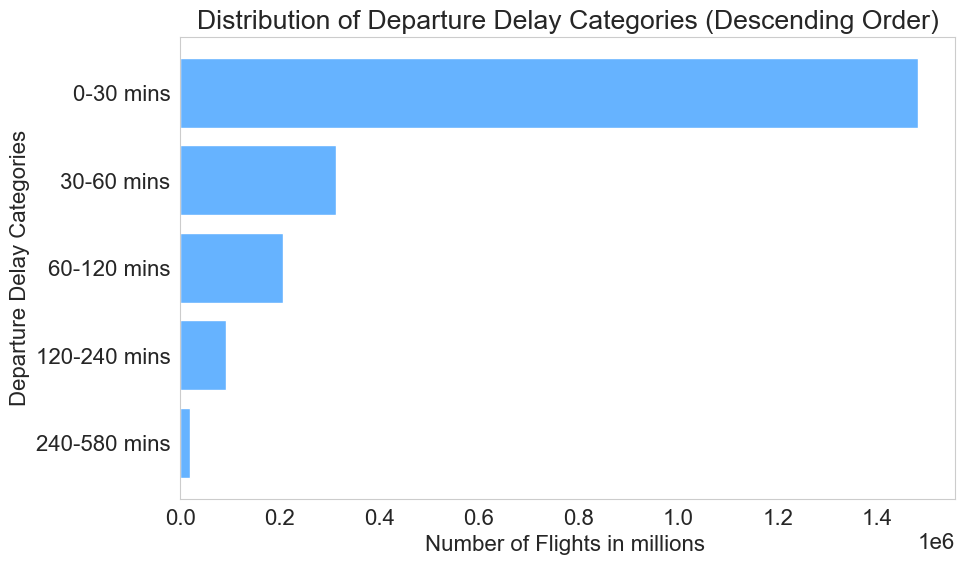

In [85]:
# Creating categories for departure delay in minutes
categories = ['0-30 mins', '30-60 mins', '60-120 mins', '120-240 mins', '240-580 mins']
bins = [0, 30, 60, 120, 240, 580]

dfoutputf['Delay_Category'] = pd.cut(dfoutputf['DEPARTURE_DELAY'], bins=bins, labels=categories)

category_counts = dfoutputf['Delay_Category'].value_counts()
sorted_categories = categories[::-1]

plt.figure(figsize=(10, 6))
plt.barh(sorted_categories, category_counts[sorted_categories], color='#66b3ff')


plt.xlabel('Number of Flights in millions ')
plt.ylabel('Departure Delay Categories')
plt.title('Distribution of Departure Delay Categories (Descending Order)')
plt.grid(False)

plt.show()


## Exploring the number of departure delayed flights by time using Pie chart

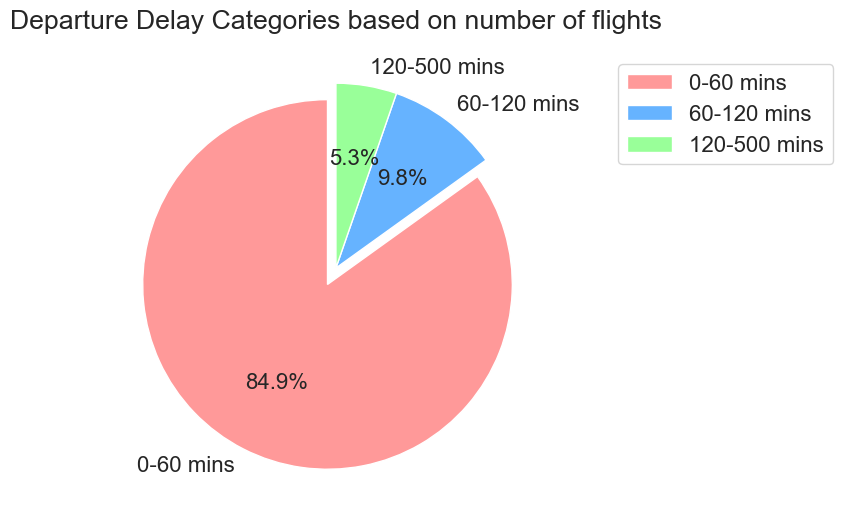

In [86]:
# Creating categories for departure delay in minutes
categories = ['0-60 mins', '60-120 mins', '120-500 mins']

# Defining the bins for each category
bins = [0, 60, 120, 500]

# Grouping flights into categories based on departure delay
dfoutputf['Delay_Category'] = pd.cut(dfoutputf['DEPARTURE_DELAY'], bins=bins, labels=categories)

# Calculating the number of flights in each category
category_counts = dfoutputf['Delay_Category'].value_counts()

# Creating a pie chart for viz
plt.figure(figsize=(6, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)  # Explode the first slice (0-60 mins)

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Adding the legend
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.6, 0.7))

# Adding the title
plt.title('Departure Delay Categories based on number of flights')

# Displaying the pie chart
plt.show()


# Section 5 : Feature Engineering II

## Removing Irrelevant Features from our dataframe

In [113]:
dfoutputf.head(5)

YEAR  MONTH  DAY  DAY_OF_WEEK FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
0  2015      1    1            4            98      N407AS            ANC   
1  2015      1    1            4          2336      N3KUAA            LAX   
2  2015      1    1            4           840      N171US            SFO   
3  2015      1    1            4           258      N3HYAA            LAX   
4  2015      1    1            4           135      N527AS            SEA   

  DESTINATION_AIRPORT SCHEDULED_DEPARTURE DEPARTURE_TIME  ...  ORIGIN_STATE  \
0                 SEA               00:05          23:54  ...            AK   
1                 PBI               00:10          00:02  ...            CA   
2                 CLT               00:20          00:18  ...            CA   
3                 MIA               00:20          00:15  ...            CA   
4                 ANC               00:25          00:24  ...            WA   

   DESTINATION_CITY DESTINATION_STATE  ORIGIN_LATITUDE  ORIGIN_LONGITUDE  \
0           Seattle                WA         61.17432        -149.99619   
1   West Palm Beach                FL         33.94254        -118.40807   
2         Charlotte                NC         37.61900        -122.37484   
3             Miami                FL         33.94254        -118.40807   
4         Anchorage                AK         47.44898        -122.30931   

   DESTINATION_LATITUDE  DESTINATION_LONGITUDE FLIGHT_DELAY_CATEGORY  \
0              47.44898             -122.30931                     0   
1              26.68316              -80.09559                     0   
2              35.21401              -80.94313                     1   
3              25.79325              -80.29056                     0   
4              61.17432             -149.99619                     0   

   FLIGHT_DELAY DAY_OF_WEEK_NAME  
0            NO         THRUSDAY  
1            NO         THRUSDAY  
2           YES         THRUSDAY  
3            NO         THRUSDAY  
4            NO         THRUSDAY  

[5 rows x 36 columns]

In [114]:
dfoutputf.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'Time_Period', 'AIRLINE_NAME', 'ORIGIN_CITY',
       'ORIGIN_STATE', 'DESTINATION_CITY', 'DESTINATION_STATE',
       'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DESTINATION_LATITUDE',
       'DESTINATION_LONGITUDE', 'FLIGHT_DELAY_CATEGORY', 'FLIGHT_DELAY',
       'DAY_OF_WEEK_NAME'],
      dtype='object')

In [115]:
dfoutputf.shape

(5714008, 36)

In [29]:
# Passengers will not have data about these columns before departure of the flight
columns_to_drop = ['DEPARTURE_DELAY','DEPARTURE_TIME', 'TAXI_OUT','WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON',
                   'TAXI_IN', 'ARRIVAL_TIME', 'DIVERTED',
                   'ORIGIN_LATITUDE','ORIGIN_LONGITUDE', 'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE',
                   'FLIGHT_DELAY', 'YEAR', 'Time_Period', 'DAY_OF_WEEK'
                  ]
for column in columns_to_drop:
    if column in dfoutputf.columns:
        dfoutputf.drop(column, axis=1, inplace=True)
    else:
        print(f"Column '{column}' not found in the DataFrame.")  

In [33]:
dfoutputf.shape

(5714008, 18)

## Identifying,Fixing and Removing the Outliers using IQR, Boxplot, Histogram Plot and Manually studying each variable for odd values

In [34]:
dfoutputf.describe()

MONTH           DAY  SCHEDULED_TIME      DISTANCE  \
count  5.714008e+06  5.714008e+06    5.714008e+06  5.714008e+06   
mean   6.547799e+00  1.570759e+01    1.418940e+02  8.244569e+02   
std    3.397421e+00  8.774394e+00    7.531400e+01  6.086620e+02   
min    1.000000e+00  1.000000e+00    1.800000e+01  3.100000e+01   
25%    4.000000e+00  8.000000e+00    8.500000e+01  3.730000e+02   
50%    7.000000e+00  1.600000e+01    1.230000e+02  6.500000e+02   
75%    9.000000e+00  2.300000e+01    1.740000e+02  1.065000e+03   
max    1.200000e+01  3.100000e+01    7.180000e+02  4.983000e+03   

       ARRIVAL_DELAY  FLIGHT_DELAY_CATEGORY  
count   5.714008e+06           5.714008e+06  
mean    4.407057e+00           5.443454e-01  
std     3.927130e+01           7.786368e-01  
min    -8.700000e+01           0.000000e+00  
25%    -1.300000e+01           0.000000e+00  
50%    -5.000000e+00           0.000000e+00  
75%     8.000000e+00           1.000000e+00  
max     1.971000e+03           2.000000e+00

In [30]:
def find_columns_with_outliers(df, iqr_multiplier=1.5):
    columns_with_outliers = []
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR
            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            if not column_outliers.empty:
                columns_with_outliers.append(column)
    return columns_with_outliers

columns_with_outliers = find_columns_with_outliers(dfoutputf)
print("Columns with outliers:", columns_with_outliers)


Columns with outliers: ['SCHEDULED_TIME', 'DISTANCE', 'ARRIVAL_DELAY']


In [31]:
continuous_variable_names = dfoutputf.select_dtypes(include=['int64', 'float64']).columns
print(continuous_variable_names)

Index(['MONTH', 'DAY', 'SCHEDULED_TIME', 'DISTANCE', 'ARRIVAL_DELAY',
       'FLIGHT_DELAY_CATEGORY'],
      dtype='object')


In [32]:
outlier_counts = {}

for column in columns_with_outliers:
    # Calculating the  Interquartile Range (IQR) that ranges between the first quartile (Q1) and the third quartile (Q3) of a dataset. 
    Q1 = dfoutputf[column].quantile(0.25)
    Q3 = dfoutputf[column].quantile(0.75)
    IQR = Q3 - Q1

    # upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting the number of outliers
    num_outliers = len(dfoutputf[(dfoutputf[column] < lower_bound) | (dfoutputf[column] > upper_bound)])

    outlier_counts[column] = num_outliers

print("Number of outliers in each variable:")
print(outlier_counts)


Number of outliers in each variable:
{'SCHEDULED_TIME': 289411, 'DISTANCE': 345365, 'ARRIVAL_DELAY': 512002}


In [33]:
for column in columns_with_outliers:
    min_value = dfoutputf[column].min()
    max_value = dfoutputf[column].max()
    print(f"{columns_with_outliers.index(column) + 1}. {column}: Min = {min_value}, Max = {max_value}")

1. SCHEDULED_TIME: Min = 18.0, Max = 718.0
2. DISTANCE: Min = 31, Max = 4983
3. ARRIVAL_DELAY: Min = -87.0, Max = 1971.0


## Studying the outlier variables using boxplot

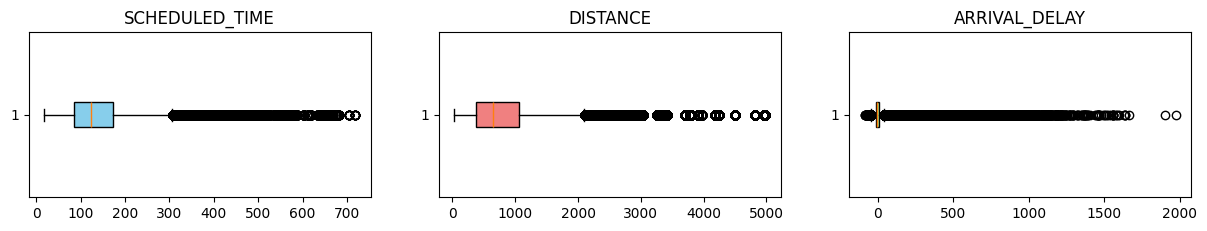

In [34]:
columns_for_box_plots = ['SCHEDULED_TIME', 'DISTANCE', 'ARRIVAL_DELAY']

fig, axs = plt.subplots(5, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

boxplot_colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, (column, color) in enumerate(zip(columns_for_box_plots, boxplot_colors)):
    row = i // 3
    col = i % 3
    

    box = axs[row, col].boxplot(dfoutputf[column], vert=False, patch_artist=True)

    for patch in box['boxes']:
        patch.set_facecolor(color)
    
    axs[row, col].set_title(column)

# Remove empty subplots
for i in range(len(columns_for_box_plots), 15):
    row = i // 3
    col = i % 3
    fig.delaxes(axs[row, col])
plt.grid(False)
plt.show()


## Using Histogram to further analyze the box plot variables

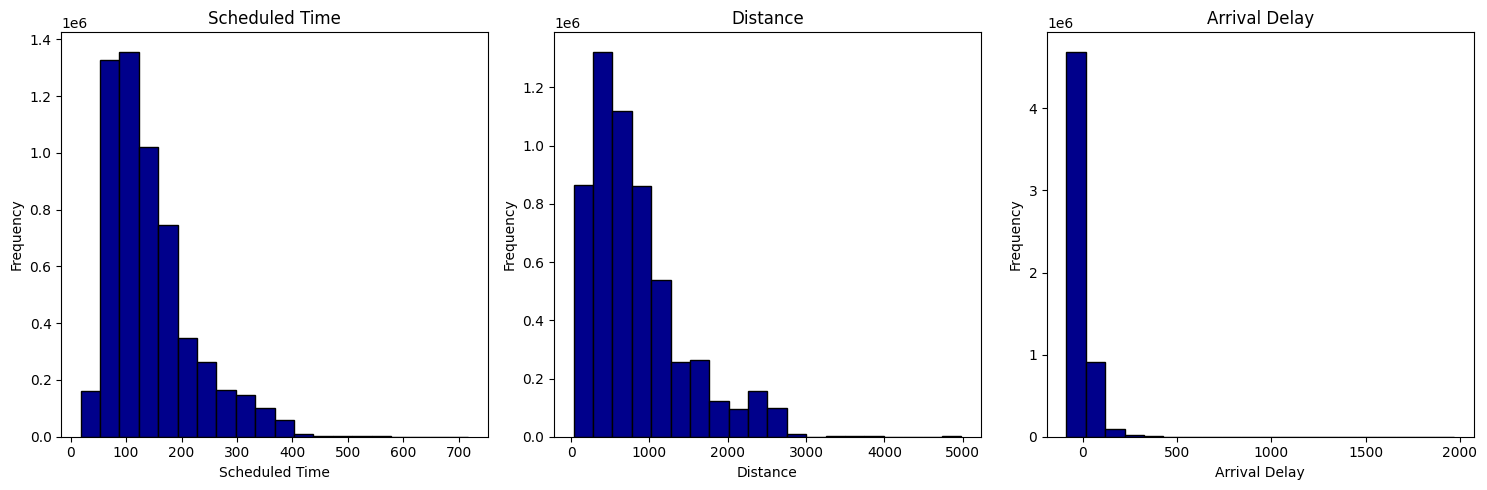

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histogram for 'SCHEDULED_TIME' column
axes[0].hist(dfoutputf['SCHEDULED_TIME'], bins=20, color='darkblue', edgecolor='black')
axes[0].set_title('Scheduled Time')
axes[0].set_xlabel('Scheduled Time')
axes[0].set_ylabel('Frequency')

# Histogram for 'DISTANCE' column
axes[1].hist(dfoutputf['DISTANCE'], bins=20, color='darkblue', edgecolor='black')
axes[1].set_title('Distance')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Frequency')

# Histogram for 'ARRIVAL_DELAY' column
axes[2].hist(dfoutputf['ARRIVAL_DELAY'], bins=20, color='darkblue', edgecolor='black')
axes[2].set_title('Arrival Delay')
axes[2].set_xlabel('Arrival Delay')
axes[2].set_ylabel('Frequency')
plt.tight_layout()

plt.show()

In [36]:
dfoutputf.head(4)

MONTH  DAY FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  \
0      1    1            98      N407AS            ANC                 SEA   
1      1    1          2336      N3KUAA            LAX                 PBI   
2      1    1           840      N171US            SFO                 CLT   
3      1    1           258      N3HYAA            LAX                 MIA   

  SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE SCHEDULED_ARRIVAL  \
0               00:05           205.0      1448             04:30   
1               00:10           280.0      2330             07:50   
2               00:20           286.0      2296             08:06   
3               00:20           285.0      2342             08:05   

   ARRIVAL_DELAY            AIRLINE_NAME    ORIGIN_CITY ORIGIN_STATE  \
0          -22.0    Alaska Airlines Inc.      Anchorage           AK   
1           -9.0  American Airlines Inc.    Los Angeles           CA   
2            5.0         US Airways Inc.  San Francisco           CA   
3           -9.0  American Airlines Inc.    Los Angeles           CA   

  DESTINATION_CITY DESTINATION_STATE  FLIGHT_DELAY_CATEGORY DAY_OF_WEEK_NAME  
0          Seattle                WA                      0         THRUSDAY  
1  West Palm Beach                FL                      0         THRUSDAY  
2        Charlotte                NC                      1         THRUSDAY  
3            Miami                FL                      0         THRUSDAY

In [37]:
dfoutputf.shape

(5714008, 18)

In [38]:
# Defining the values to check for as outliers
values_to_check = [31, 4962]

# Checking if any of the values are present as outliers in the 'DISTANCE' column
is_outlier = dfoutputf['DISTANCE'].isin(values_to_check)

# Printing a message if at least one of the values is present as an outlier
if any(is_outlier):
    print(f"At least one of {values_to_check} is present as an outlier in the 'DISTANCE' column.")

# Removing the rows with '31' or '4962' as outliers in the 'DISTANCE' column
if any(is_outlier):
    dfoutputf = dfoutputf[~is_outlier]


At least one of [31, 4962] is present as an outlier in the 'DISTANCE' column.


In [39]:
dfoutputf.shape

(5712588, 18)

In [40]:
# Checking unique values for'ARRIVAL_DELAY' and if there are values less than '-82' in the 'ARRIVAL_DELAY' column
values_less_than_neg_82 = dfoutputf['ARRIVAL_DELAY'][dfoutputf['ARRIVAL_DELAY'] < -82]

# Checking if there are values greater than '1555' in the 'ARRIVAL_DELAY' column
values_greater_than_1555 = dfoutputf['ARRIVAL_DELAY'][dfoutputf['ARRIVAL_DELAY'] > 1555]

# Printing the results
if not values_less_than_neg_82.empty:
    print(f"There are {len(values_less_than_neg_82)} values less than '-82' in the 'ARRIVAL_DELAY' column.")
    print("List of values less than '-82':")
    print(values_less_than_neg_82.tolist())
else:
    print("There are no values less than '-82' in the 'ARRIVAL_DELAY' column.")

if not values_greater_than_1555.empty:
    print(f"There are {len(values_greater_than_1555)} values greater than '1555' in the 'ARRIVAL_DELAY' column.")
    print("List of values greater than '1555':")
    print(values_greater_than_1555.tolist())
else:
    print("There are no values greater than '1555' in the 'ARRIVAL_DELAY' column.")


There are 2 values less than '-82' in the 'ARRIVAL_DELAY' column.
List of values less than '-82':
[-87.0, -87.0]
There are 13 values greater than '1555' in the 'ARRIVAL_DELAY' column.
List of values greater than '1555':
[1593.0, 1971.0, 1627.0, 1576.0, 1598.0, 1636.0, 1898.0, 1574.0, 1665.0, 1556.0, 1638.0, 1557.0, 1636.0]


In [41]:
# Finding rows where 'ARRIVAL_DELAY' values are less than '-82' or greater than '1555'
values_to_remove = dfoutputf[(dfoutputf['ARRIVAL_DELAY'] < -82) | (dfoutputf['ARRIVAL_DELAY'] > 1555)]

# Checking if there are any rows to remove
if not values_to_remove.empty:
    print(f"There are {len(values_to_remove)} rows with 'ARRIVAL_DELAY' values less than '-82' or greater than '1555'.")
    print("Removing these rows...")

    # Removing the rows with 'ARRIVAL_DELAY' values that meet the condition
    dfoutputf = dfoutputf[~dfoutputf.index.isin(values_to_remove.index)]
else:
    print("There are no rows with 'ARRIVAL_DELAY' values less than '-82' or greater than '1555'.")


There are 15 rows with 'ARRIVAL_DELAY' values less than '-82' or greater than '1555'.
Removing these rows...


In [42]:
dfoutputf.shape

(5712573, 18)

### We see outliers in Schedules Time, Distance and Arrival Delay

We decided to remove all the possible outliers from 'Distance', 'Arrival Delay' column by studying all the 3 columns one by one.

Moreover, 
1. Our target variable would be derived from the arrival delay and the arrival delay column would be deleted.
2. On further steps below, we would also remove Distance column due to multicollinearity. So we decide to move ahead with the outliers

## Checked the distribution of Target Variable if it is balanced or unbalanced

In [51]:
dfoutputf.columns

Index(['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'AIRLINE_NAME',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_CITY', 'DESTINATION_STATE',
       'FLIGHT_DELAY_CATEGORY', 'DAY_OF_WEEK_NAME'],
      dtype='object')

In [52]:
dfoutputf.dtypes

MONTH                      int64
DAY                        int64
FLIGHT_NUMBER             object
TAIL_NUMBER               object
ORIGIN_AIRPORT            object
DESTINATION_AIRPORT       object
SCHEDULED_DEPARTURE       object
SCHEDULED_TIME           float64
DISTANCE                   int64
SCHEDULED_ARRIVAL         object
ARRIVAL_DELAY            float64
AIRLINE_NAME              object
ORIGIN_CITY               object
ORIGIN_STATE              object
DESTINATION_CITY          object
DESTINATION_STATE         object
FLIGHT_DELAY_CATEGORY      int64
DAY_OF_WEEK_NAME          object
dtype: object

In [53]:
dfoutputf['FLIGHT_DELAY_CATEGORY'].value_counts()

FLIGHT_DELAY_CATEGORY
0    3626169
1    1063158
2    1023246
Name: count, dtype: int64

## Using Pie chart to see the unbalanced data distribution for all the 3 classes of 'FLIGHT_DELAY_CATEGORY'

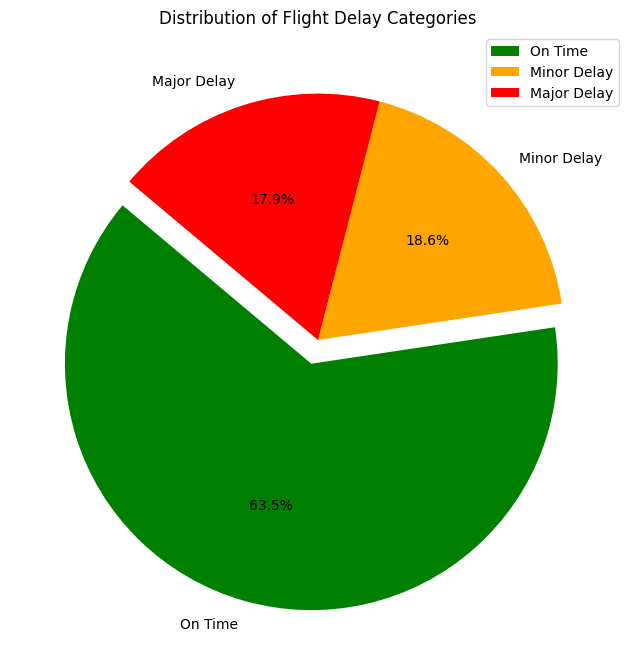

In [54]:
class_labels = {
    0: 'On Time',
    1: 'Minor Delay',
    2: 'Major Delay'
}

# Getting the value counts for FLIGHT_DELAY_CATEGORY
value_counts = dfoutputf['FLIGHT_DELAY_CATEGORY'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
colors = ['green', 'orange', 'red']
explode = (0.1, 0, 0)  # explode the 1st slice (On Time)

plt.pie(value_counts, labels=class_labels.values(), autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

# Adding the legend
plt.legend(labels=class_labels.values(), loc="upper right")

# Adding the title
plt.title('Distribution of Flight Delay Categories')

# Showing the pie chart
plt.show()


# Section 6 : Feature Selection

## a.Feature Selection using Correlation matrix (Heatmap)

In [43]:
# Finding the total number of numeric variables and numeric + categorical variables
numeric_variable_count = len(dfoutputf.select_dtypes(include=['int64', 'float64']).columns)
all_variable_names = dfoutputf.columns
total_variable_count = len(all_variable_names)

print("Total number of numeric variables:", numeric_variable_count)
print("Total number of variables (categorical and numeric):", total_variable_count)


Total number of numeric variables: 6
Total number of variables (categorical and numeric): 18


In [56]:
# Removing all the object datatype
dfFlights_corr=dfoutputf.corr(numeric_only=True) 

In [57]:
print(dfoutputf.dtypes) # out of 18 attributes we have 6 numeric values like float , int in the correlation matrix

MONTH                      int64
DAY                        int64
FLIGHT_NUMBER             object
TAIL_NUMBER               object
ORIGIN_AIRPORT            object
DESTINATION_AIRPORT       object
SCHEDULED_DEPARTURE       object
SCHEDULED_TIME           float64
DISTANCE                   int64
SCHEDULED_ARRIVAL         object
ARRIVAL_DELAY            float64
AIRLINE_NAME              object
ORIGIN_CITY               object
ORIGIN_STATE              object
DESTINATION_CITY          object
DESTINATION_STATE         object
FLIGHT_DELAY_CATEGORY      int64
DAY_OF_WEEK_NAME          object
dtype: object


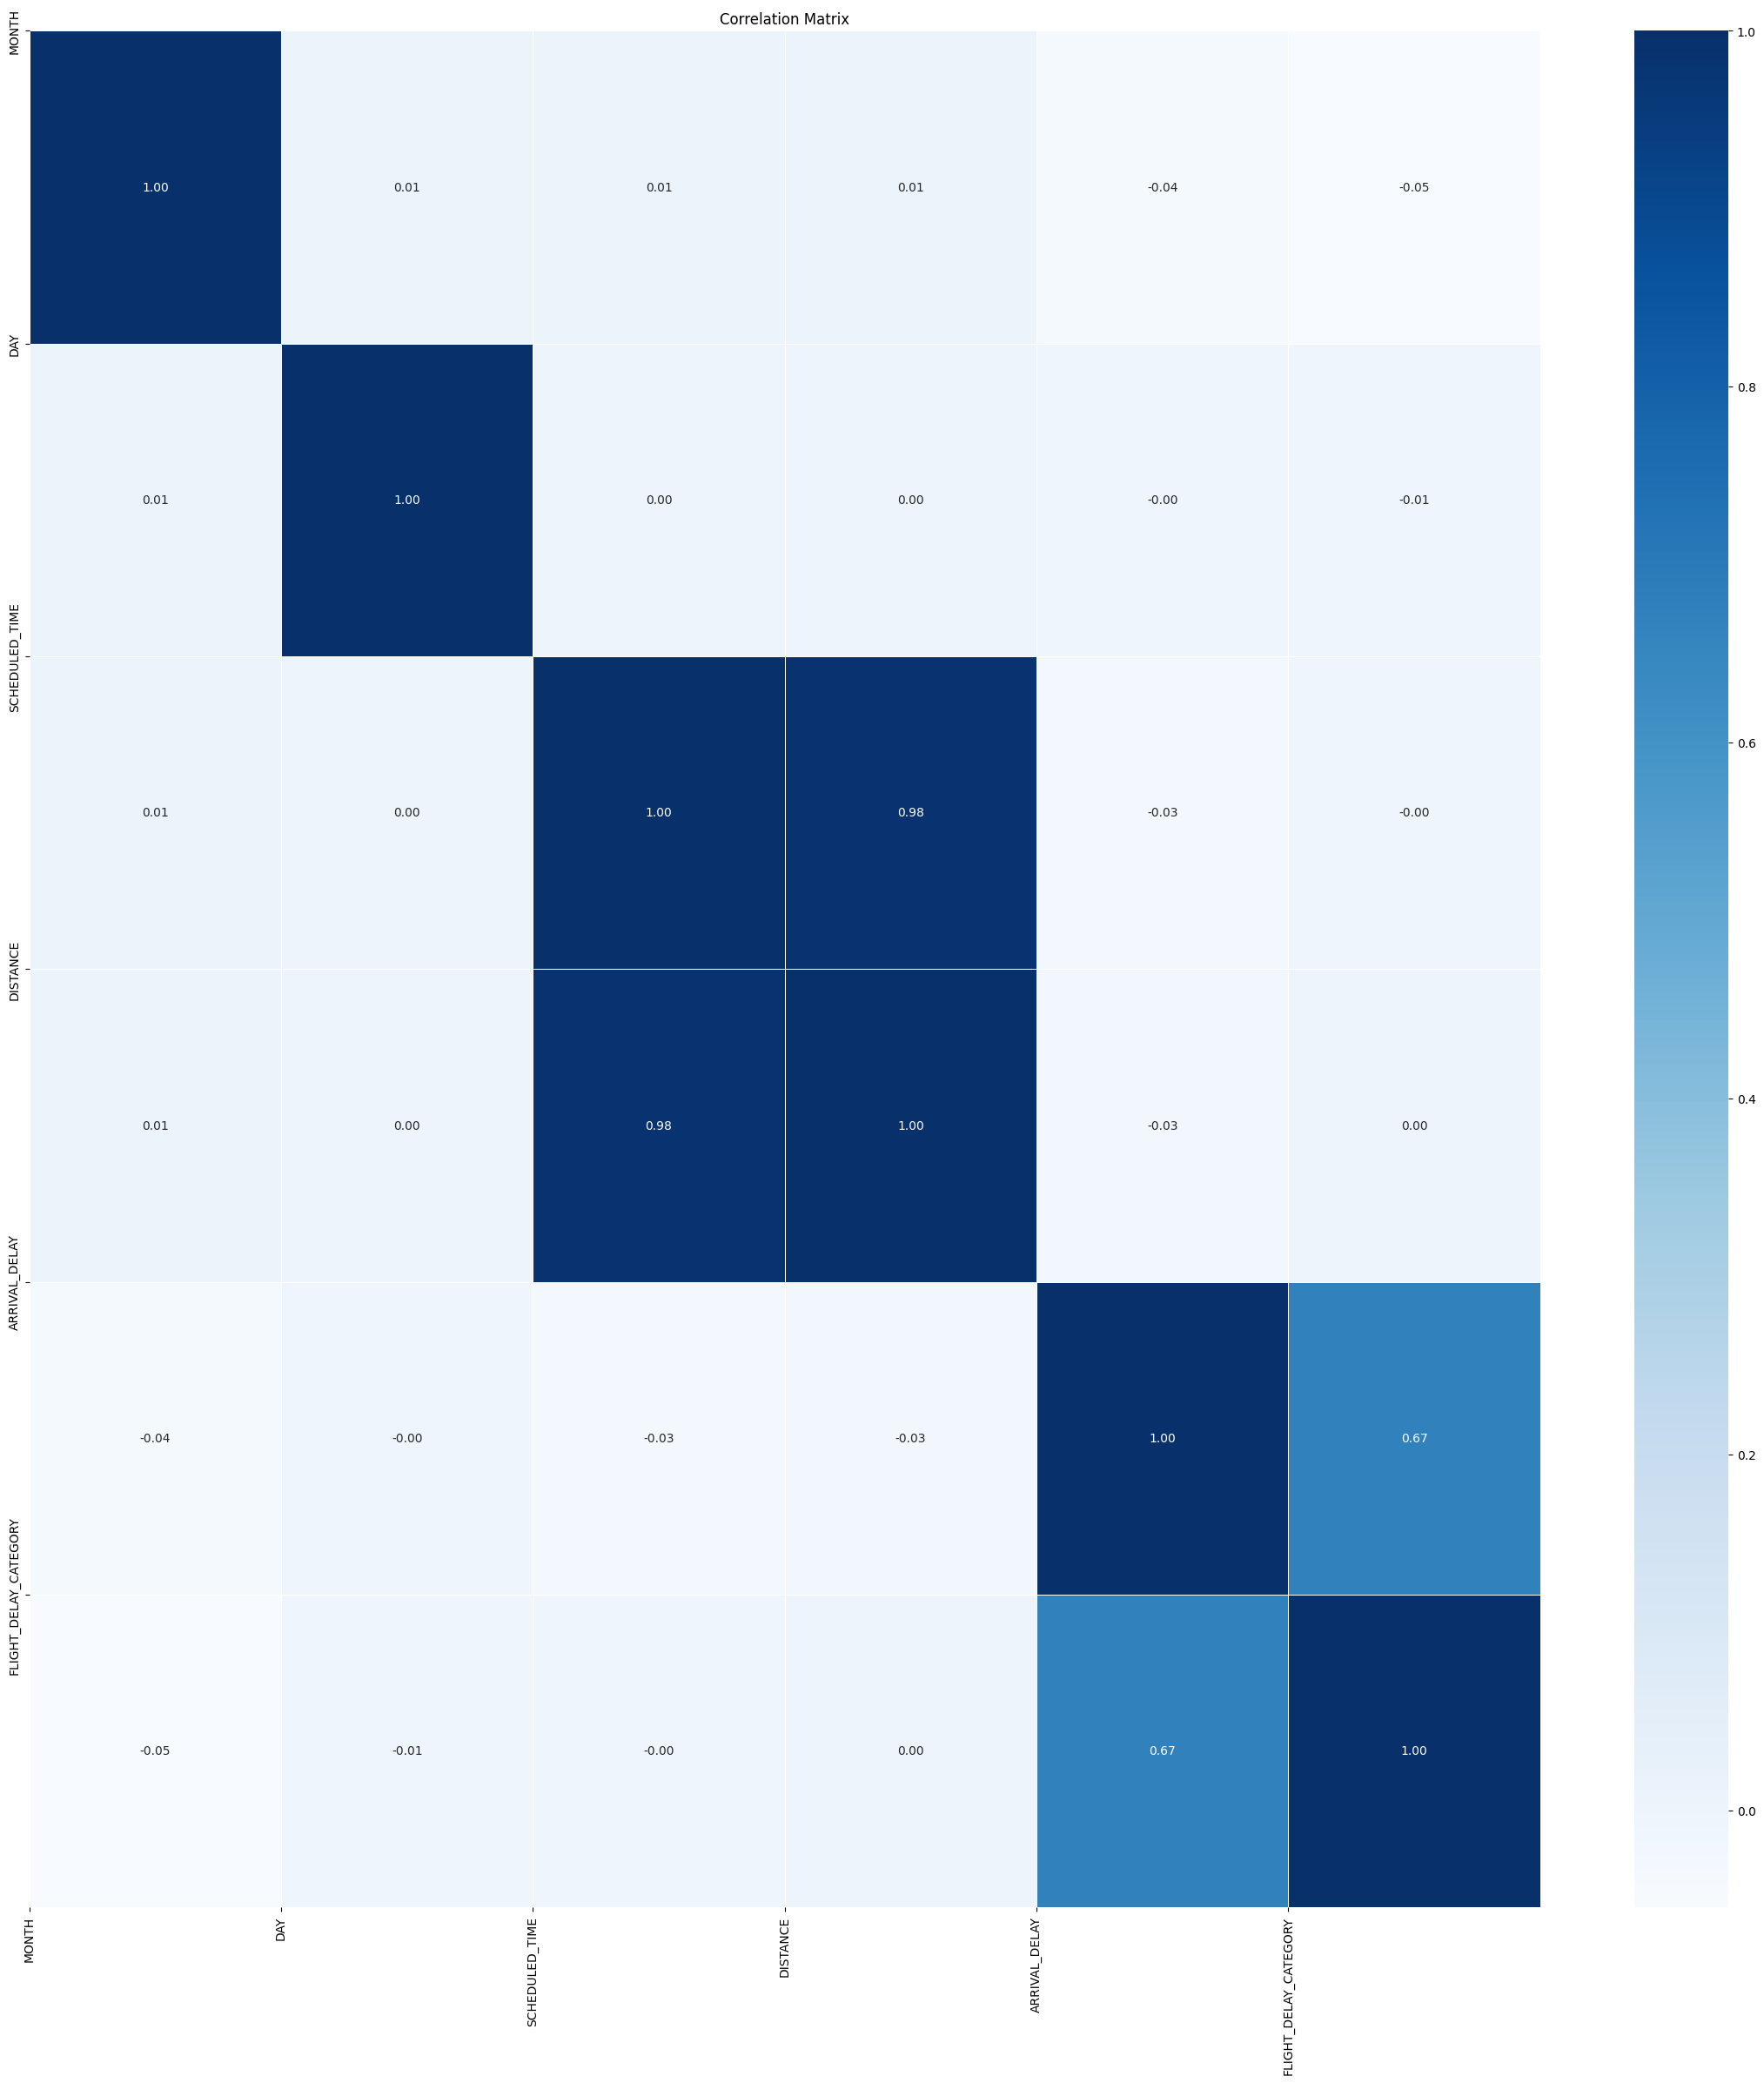

In [58]:
fig, ax = plt.subplots(figsize=(28, 28))
sns.heatmap(dfFlights_corr, annot=True, linewidths=0.5, fmt=".2f", cmap='Blues')

plt.xticks(range(len(dfFlights_corr.columns)), dfFlights_corr.columns);
ax.set_xticklabels( dfFlights_corr.columns, rotation = 90)
plt.yticks(range(len(dfFlights_corr.columns)), dfFlights_corr.columns);
plt.title("Correlation Matrix") 
plt.show()

In [51]:
dfoutputf.shape, dfAirlines.shape,  dfAirports.shape

((5712573, 18), (14, 2), (322, 7))

### We could interpret that the input variables are not having strong correlation with target variable - ['ARRIVAL_DELAY']

In [52]:
dfoutputf.tail(4)

MONTH  DAY FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
5819075     12   31           745      N828JB            JFK   
5819076     12   31          1503      N913JB            JFK   
5819077     12   31           333      N527JB            MCO   
5819078     12   31           839      N534JB            JFK   

        DESTINATION_AIRPORT SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE  \
5819075                 PSE               23:59           227.0      1617   
5819076                 SJU               23:59           221.0      1598   
5819077                 SJU               23:59           161.0      1189   
5819078                 BQN               23:59           221.0      1576   

        SCHEDULED_ARRIVAL  ARRIVAL_DELAY     AIRLINE_NAME ORIGIN_CITY  \
5819075             04:46          -16.0  JetBlue Airways    New York   
5819076             04:40           -8.0  JetBlue Airways    New York   
5819077             03:40          -10.0  JetBlue Airways     Orlando   
5819078             04:40            2.0  JetBlue Airways    New York   

        ORIGIN_STATE DESTINATION_CITY DESTINATION_STATE  \
5819075           NY            Ponce                PR   
5819076           NY         San Juan                PR   
5819077           FL         San Juan                PR   
5819078           NY        Aguadilla                PR   

         FLIGHT_DELAY_CATEGORY DAY_OF_WEEK_NAME  
5819075                      0         THRUSDAY  
5819076                      0         THRUSDAY  
5819077                      0         THRUSDAY  
5819078                      1         THRUSDAY

In [53]:
dfoutputf.dtypes

MONTH                      int64
DAY                        int64
FLIGHT_NUMBER             object
TAIL_NUMBER               object
ORIGIN_AIRPORT            object
DESTINATION_AIRPORT       object
SCHEDULED_DEPARTURE       object
SCHEDULED_TIME           float64
DISTANCE                   int64
SCHEDULED_ARRIVAL         object
ARRIVAL_DELAY            float64
AIRLINE_NAME              object
ORIGIN_CITY               object
ORIGIN_STATE              object
DESTINATION_CITY          object
DESTINATION_STATE         object
FLIGHT_DELAY_CATEGORY      int64
DAY_OF_WEEK_NAME          object
dtype: object

In [54]:
print(dfoutputf)

         MONTH  DAY FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
0            1    1            98      N407AS            ANC   
1            1    1          2336      N3KUAA            LAX   
2            1    1           840      N171US            SFO   
3            1    1           258      N3HYAA            LAX   
4            1    1           135      N527AS            SEA   
...        ...  ...           ...         ...            ...   
5819074     12   31           688      N657JB            LAX   
5819075     12   31           745      N828JB            JFK   
5819076     12   31          1503      N913JB            JFK   
5819077     12   31           333      N527JB            MCO   
5819078     12   31           839      N534JB            JFK   

        DESTINATION_AIRPORT SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE  \
0                       SEA               00:05           205.0      1448   
1                       PBI               00:10           280.0      2330   


## Using Label Encoding for categorical variables (object dtypes)
### We labeled all the non-int/float datatype columns manually as it gave higher accuracy than inbuilt scikit-learn's LabelEncoder. This can also help us if we want to use the integer value assigned to each value for all the manually label encoded column for the prediction part.

In [44]:
# Mapping from days 1 to 7 to their corresponding names
days_to_names = {1: 'MONDAY', 2: 'TUESDAY', 3: 'WEDNESDAY', 4: 'THRUSDAY', 5: 'FRIDAY', 6: 'SATURDAY', 7: 'SUNDAY'}

# Reversing the mapping to get days 1 to 7 from names
names_to_days = {v: k for k, v in days_to_names.items()}

# Applying the reverse mapping to create a new column 'DAY_OF_WEEK_NAME'
dfoutputf['DAY_OF_WEEK_NAME'] = dfoutputf['DAY_OF_WEEK_NAME'].map(names_to_days)

# Displaying the updated DataFrame
print(dfoutputf)


         MONTH  DAY FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
0            1    1            98      N407AS            ANC   
1            1    1          2336      N3KUAA            LAX   
2            1    1           840      N171US            SFO   
3            1    1           258      N3HYAA            LAX   
4            1    1           135      N527AS            SEA   
...        ...  ...           ...         ...            ...   
5819074     12   31           688      N657JB            LAX   
5819075     12   31           745      N828JB            JFK   
5819076     12   31          1503      N913JB            JFK   
5819077     12   31           333      N527JB            MCO   
5819078     12   31           839      N534JB            JFK   

        DESTINATION_AIRPORT SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE  \
0                       SEA               00:05           205.0      1448   
1                       PBI               00:10           280.0      2330   


In [45]:
airline_names = ['United Air Lines Inc.', 'American Airlines Inc.', 'US Airways Inc.',
                 'Frontier Airlines Inc.', 'JetBlue Airways', 'Skywest Airlines Inc.',
                 'Alaska Airlines Inc.', 'Spirit Air Lines', 'Southwest Airlines Co.',
                 'Delta Air Lines Inc.', 'Atlantic Southeast Airlines', 'Hawaiian Airlines Inc.',
                 'American Eagle Airlines Inc.', 'Virgin America']

airline_names.sort()  # Sorting the airline names alphabetically

for i, name in enumerate(airline_names):
    print(f"{i+1}. {name}")

1. Alaska Airlines Inc.
2. American Airlines Inc.
3. American Eagle Airlines Inc.
4. Atlantic Southeast Airlines
5. Delta Air Lines Inc.
6. Frontier Airlines Inc.
7. Hawaiian Airlines Inc.
8. JetBlue Airways
9. Skywest Airlines Inc.
10. Southwest Airlines Co.
11. Spirit Air Lines
12. US Airways Inc.
13. United Air Lines Inc.
14. Virgin America


In [46]:
# Mapping airlines from 1 to 14 to their corresponding names
airlines_names_list = {1: 'Alaska Airlines Inc.', 2: 'American Airlines Inc.', 3: 'American Eagle Airlines Inc.', 4: 'Atlantic Southeast Airlines', 
                       5: 'Delta Air Lines Inc.', 6: 'Frontier Airlines Inc.', 7: 'Hawaiian Airlines Inc.', 8: 'JetBlue Airways', 9: 'Skywest Airlines Inc.', 
                       10: 'Southwest Airlines Co.', 11: 'Spirit Air Lines', 12: 'US Airways Inc.', 13: 'United Air Lines Inc.', 14: 'Virgin America'}

# Reversing the mapping to get airlines 1 to 14 from names
names_of_airlines = {w: l for l, w in airlines_names_list.items()}

# Applying the reverse mapping to create a new column ''AIRLINE_NAME'
dfoutputf['AIRLINE_NAME'] = dfoutputf['AIRLINE_NAME'].map(names_of_airlines)

# Displaying the updated DataFrame
print(dfoutputf)

         MONTH  DAY FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
0            1    1            98      N407AS            ANC   
1            1    1          2336      N3KUAA            LAX   
2            1    1           840      N171US            SFO   
3            1    1           258      N3HYAA            LAX   
4            1    1           135      N527AS            SEA   
...        ...  ...           ...         ...            ...   
5819074     12   31           688      N657JB            LAX   
5819075     12   31           745      N828JB            JFK   
5819076     12   31          1503      N913JB            JFK   
5819077     12   31           333      N527JB            MCO   
5819078     12   31           839      N534JB            JFK   

        DESTINATION_AIRPORT SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE  \
0                       SEA               00:05           205.0      1448   
1                       PBI               00:10           280.0      2330   


In [47]:
dfoutputf.head(4)

MONTH  DAY FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  \
0      1    1            98      N407AS            ANC                 SEA   
1      1    1          2336      N3KUAA            LAX                 PBI   
2      1    1           840      N171US            SFO                 CLT   
3      1    1           258      N3HYAA            LAX                 MIA   

  SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE SCHEDULED_ARRIVAL  \
0               00:05           205.0      1448             04:30   
1               00:10           280.0      2330             07:50   
2               00:20           286.0      2296             08:06   
3               00:20           285.0      2342             08:05   

   ARRIVAL_DELAY  AIRLINE_NAME    ORIGIN_CITY ORIGIN_STATE DESTINATION_CITY  \
0          -22.0             1      Anchorage           AK          Seattle   
1           -9.0             2    Los Angeles           CA  West Palm Beach   
2            5.0            12  San Francisco           CA        Charlotte   
3           -9.0             2    Los Angeles           CA            Miami   

  DESTINATION_STATE  FLIGHT_DELAY_CATEGORY  DAY_OF_WEEK_NAME  
0                WA                      0                 4  
1                FL                      0                 4  
2                NC                      1                 4  
3                FL                      0                 4

In [48]:
unique_origin_airports = dfoutputf['ORIGIN_AIRPORT'].unique()
unique_destination_airports = dfoutputf['DESTINATION_AIRPORT'].unique()

# Count the unique values in each column
count_unique_origin_airports = len(unique_origin_airports)
count_unique_destination_airports = len(unique_destination_airports)

print(f"Unique Origin Airports: {count_unique_origin_airports}")
print(f"Unique Destination Airports: {count_unique_destination_airports}")


Unique Origin Airports: 323
Unique Destination Airports: 323


In [49]:
unique_origin_airports = sorted(dfoutputf['ORIGIN_AIRPORT'].unique())
unique_destination_airports = sorted(dfoutputf['DESTINATION_AIRPORT'].unique())

# Printing the sorted unique values in each column
print("Unique Origin Airports:")
for airport in unique_origin_airports:
    print(airport)

print("\nUnique Destination Airports:")
for airport in unique_destination_airports:
    print(airport)


Unique Origin Airports:
ABE
ABI
ABQ
ABR
ABY
ACK
ACT
ACV
ACY
ADK
ADQ
AEX
AGS
AKN
ALB
ALO
AMA
ANC
APN
ASE
ATL
ATW
AUS
AVL
AVP
AZO
BDL
BET
BFL
BGM
BGR
BHM
BIL
BIS
BJI
BLI
BMI
BNA
BOI
BOS
BPT
BQK
BQN
BRD
BRO
BRW
BSM
BTM
BTR
BTV
BUF
BUR
BWI
BZN
CAE
CAK
CDC
CDV
CEC
CHA
CHO
CHS
CID
CIU
CLD
CLE
CLL
CLT
CMH
CMI
CMX
CNY
COD
COS
COU
CPR
CRP
CRW
CSG
CVG
CWA
DAB
DAL
DAY
DBQ
DCA
DEN
DFW
DHN
DIK
DLG
DLH
DRO
DSM
DTW
DVL
EAU
ECP
EGE
EKO
ELM
ELP
ERI
ESC
EUG
EVV
EWN
EWR
EYW
FAI
FAR
FAT
FAY
FCA
FLG
FLL
FNT
FSD
FSM
FWA
GCC
GCK
GEG
GFK
GGG
GJT
GNV
GPT
GRB
GRI
GRK
GRR
GSO
GSP
GST
GTF
GTR
GUC
GUM
HDN
HIB
HLN
HNL
HOB
HOU
HPN
HRL
HSV
HYA
HYS
IAD
IAG
IAH
ICT
IDA
ILG
ILM
IMT
IND
INL
ISN
ISP
ITH
ITO
JAC
JAN
JAX
JFK
JLN
JMS
JNU
KOA
KTN
LAN
LAR
LAS
LAW
LAX
LBB
LBE
LCH
LEX
LFT
LGA
LGB
LIH
LIT
LNK
LRD
LSE
LWS
MAF
MBS
MCI
MCO
MDT
MDW
MEI
MEM
MFE
MFR
MGM
MHK
MHT
MIA
MKE
MKG
MLB
MLI
MLU
MMH
MOB
MOT
MQT
MRY
MSN
MSO
MSP
MSY
MTJ
MVY
MYR
OAJ
OAK
OGG
OKC
OMA
OME
ONT
ORD
ORF
ORH
OTH
OTZ
PAH
PBG
PBI
PDX
PHF
PHL
PHX
PIA
PIB
PIH


In [50]:
# Getting the unique airport names in 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT'
unique_origin_airports = set(dfoutputf['ORIGIN_AIRPORT'].unique())
unique_destination_airports = set(dfoutputf['DESTINATION_AIRPORT'].unique())

# Finding additional unique airport names in 'DESTINATION_AIRPORT' not present in 'ORIGIN_AIRPORT'
additional_dest_airports = unique_destination_airports - unique_origin_airports

# Printing the count and names of additional unique airport names
if additional_dest_airports:
    print(f"Additional unique airports in 'DESTINATION_AIRPORT' that are not in 'ORIGIN_AIRPORT': {len(additional_dest_airports)}")
    for airport in additional_dest_airports:
        print(airport)
else:
    print("No additional unique airports in 'DESTINATION_AIRPORT' that are not in 'ORIGIN_AIRPORT'")


No additional unique airports in 'DESTINATION_AIRPORT' that are not in 'ORIGIN_AIRPORT'


In [51]:
unique_origin_airports = sorted(dfoutputf['ORIGIN_AIRPORT'].unique())

# Creating a mapping from airport names to serial numbers (1 to 323)
airport_mapping = {airport: i + 1 for i, airport in enumerate(unique_origin_airports)}

# Applying the mapping to the 'ORIGIN_AIRPORT' column
dfoutputf['ORIGIN_AIRPORT_SERIAL'] = dfoutputf['ORIGIN_AIRPORT'].map(airport_mapping)

# Printing the first few rows of the DataFrame with the serial numbers and categorical names
print("Updated DataFrame with Categorical Names:")
print(dfoutputf[['ORIGIN_AIRPORT', 'ORIGIN_AIRPORT_SERIAL']].head())


Updated DataFrame with Categorical Names:
  ORIGIN_AIRPORT  ORIGIN_AIRPORT_SERIAL
0            ANC                     18
1            LAX                    178
2            SFO                    280
3            LAX                    178
4            SEA                    279


In [52]:
unique_destination_airports = sorted(dfoutputf['DESTINATION_AIRPORT'].unique())

# Creating a mapping from airport names to serial numbers (1 to 323)
airport_mapping = {airport: i + 1 for i, airport in enumerate(unique_destination_airports)}

# Applying the mapping to the 'DESTINATION_AIRPORT' column
dfoutputf['DESTINATION_AIRPORT_SERIAL'] = dfoutputf['DESTINATION_AIRPORT'].map(airport_mapping)

# Printing the first few rows of the DataFrame with the serial numbers and categorical names
print("Updated DataFrame with Categorical Names:")
#print(dfoutputf[['DESTINATION_AIRPORT', 'DESTINATION_AIRPORT_SERIAL']].drop_duplicates(subset=['DESTINATION_AIRPORT']).head())
print(dfoutputf[['DESTINATION_AIRPORT', 'DESTINATION_AIRPORT_SERIAL']].head())

Updated DataFrame with Categorical Names:
  DESTINATION_AIRPORT  DESTINATION_AIRPORT_SERIAL
0                 SEA                         279
1                 PBI                         237
2                 CLT                          68
3                 MIA                         205
4                 ANC                          18


In [53]:
dfoutputf['DESTINATION_AIRPORT'] = dfoutputf['DESTINATION_AIRPORT_SERIAL']
# The 'DESTINATION_AIRPORT' column contains the numerical values (int)
dfoutputf['ORIGIN_AIRPORT'] = dfoutputf['ORIGIN_AIRPORT_SERIAL']
# The 'ORIGIN_AIRPORT' column contains the numerical values (int)


In [54]:
print(dfoutputf)

         MONTH  DAY FLIGHT_NUMBER TAIL_NUMBER  ORIGIN_AIRPORT  \
0            1    1            98      N407AS              18   
1            1    1          2336      N3KUAA             178   
2            1    1           840      N171US             280   
3            1    1           258      N3HYAA             178   
4            1    1           135      N527AS             279   
...        ...  ...           ...         ...             ...   
5819074     12   31           688      N657JB             178   
5819075     12   31           745      N828JB             168   
5819076     12   31          1503      N913JB             168   
5819077     12   31           333      N527JB             195   
5819078     12   31           839      N534JB             168   

         DESTINATION_AIRPORT SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE  \
0                        279               00:05           205.0      1448   
1                        237               00:10           280.

In [55]:
dfoutputf.head(4)

MONTH  DAY FLIGHT_NUMBER TAIL_NUMBER  ORIGIN_AIRPORT  DESTINATION_AIRPORT  \
0      1    1            98      N407AS              18                  279   
1      1    1          2336      N3KUAA             178                  237   
2      1    1           840      N171US             280                   68   
3      1    1           258      N3HYAA             178                  205   

  SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE SCHEDULED_ARRIVAL  \
0               00:05           205.0      1448             04:30   
1               00:10           280.0      2330             07:50   
2               00:20           286.0      2296             08:06   
3               00:20           285.0      2342             08:05   

   ARRIVAL_DELAY  AIRLINE_NAME    ORIGIN_CITY ORIGIN_STATE DESTINATION_CITY  \
0          -22.0             1      Anchorage           AK          Seattle   
1           -9.0             2    Los Angeles           CA  West Palm Beach   
2            5.0            12  San Francisco           CA        Charlotte   
3           -9.0             2    Los Angeles           CA            Miami   

  DESTINATION_STATE  FLIGHT_DELAY_CATEGORY  DAY_OF_WEEK_NAME  \
0                WA                      0                 4   
1                FL                      0                 4   
2                NC                      1                 4   
3                FL                      0                 4   

   ORIGIN_AIRPORT_SERIAL  DESTINATION_AIRPORT_SERIAL  
0                     18                         279  
1                    178                         237  
2                    280                          68  
3                    178                         205

In [56]:
unique_tailnumbers = dfoutputf['TAIL_NUMBER'].unique()
# Counting the unique values in each column
count_unique_tailnumbers = len(unique_tailnumbers)
print(f"Unique Tail Numbers: {count_unique_tailnumbers}")

Unique Tail Numbers: 4896


In [57]:
unique_origin_cities = dfoutputf['ORIGIN_CITY'].unique()
unique_origin_states = dfoutputf['ORIGIN_STATE'].unique()
unique_destination_cities = dfoutputf['DESTINATION_CITY'].unique()
unique_destination_states = dfoutputf['DESTINATION_STATE'].unique()

# Counting the unique values in each column
count_unique_origin_cities = len(unique_origin_cities)
count_unique_origin_states = len(unique_origin_states)
count_unique_destination_cities = len(unique_destination_cities)
count_unique_destination_states = len(unique_destination_states)

print(f"Unique Origin Cities: {count_unique_origin_cities}")
print(f"Unique Origin States: {count_unique_origin_states}")
print(f"Unique Destination Cities: {count_unique_destination_cities}")
print(f"Unique Destination States: {count_unique_destination_states}")


Unique Origin Cities: 309
Unique Origin States: 55
Unique Destination Cities: 309
Unique Destination States: 55


In [58]:
unique_origin_cities = sorted(dfoutputf['ORIGIN_CITY'].dropna().unique())
unique_destination_cities = sorted(dfoutputf['DESTINATION_CITY'].dropna().unique())
unique_origin_states = sorted(dfoutputf['ORIGIN_STATE'].dropna().unique())
unique_destination_states = sorted(dfoutputf['DESTINATION_STATE'].dropna().unique())

# Printing the sorted unique values in each column
print("Unique Origin Cities:")
for city in unique_origin_cities:
    print(city)

print("\nUnique Destination Cities:")
for city in unique_destination_cities:
    print(city)

print("\nUnique Origin States:")
for state in unique_origin_states:
    print(state)

print("\nUnique Destination States:")
for state in unique_destination_states:
    print(state)


Unique Origin Cities:
Aberdeen
Abilene
Adak
Agana
Aguadilla
Akron
Albany
Albuquerque
Alexandria
Allentown
Alpena
Amarillo
Anchorage
Appleton
Arcata/Eureka
Arlington
Asheville
Aspen
Atlanta
Atlantic City
Augusta
Austin
Bakersfield
Baltimore
Bangor
Barrow
Baton Rouge
Beaumont/Port Arthur
Bellingham
Bemidji
Bethel
Billings
Binghamton
Birmingham
Bismarck
Bloomington
Boise
Boston
Bozeman
Brainerd
Bristol
Brownsville
Brunswick
Buffalo
Burbank
Burlington
Butte
Casper
Cedar City
Cedar Rapids
Champaign/Urbana
Chantilly
Charleston
Charlotte
Charlotte Amalie
Charlottesville
Chattanooga
Chicago
Christiansted
Cleveland
Cody
College Station
Colorado Springs
Columbia
Columbus
Columbus-Starkville-West Point
Cordova
Corpus Christi
Covington
Crescent City
Dallas
Dallas-Fort Worth
Dayton
Daytona Beach
Deadhorse
Denver
Des Moines
Detroit
Devils Lake
Dickinson
Dillingham
Dothan
Dubuque
Duluth
Durango
Eagle
Eau Claire
El Paso
Elko
Elmira
Erie
Escanaba
Eugene
Evansville
Fairbanks
Fargo
Fayetteville
Fayettevi

In [59]:
unique_origin_cities = sorted(filter(None, dfoutputf['ORIGIN_CITY'].unique()))

# Creating a mapping from city names to serial numbers
city_mapping = {city: i + 1 for i, city in enumerate(unique_origin_cities)}

# Applying the mapping to the 'ORIGIN_CITY' column
dfoutputf['ORIGIN_CITY_SERIAL'] = dfoutputf['ORIGIN_CITY'].map(city_mapping)

# Printing all rows of the DataFrame with the serial numbers and categorical names
print("Updated DataFrame with Categorical Names for ORIGIN_CITY:")
print(dfoutputf[['ORIGIN_CITY', 'ORIGIN_CITY_SERIAL']])

Updated DataFrame with Categorical Names for ORIGIN_CITY:
           ORIGIN_CITY  ORIGIN_CITY_SERIAL
0            Anchorage                13.0
1          Los Angeles               174.0
2        San Francisco               256.0
3          Los Angeles               174.0
4              Seattle               267.0
...                ...                 ...
5819074    Los Angeles               174.0
5819075       New York               208.0
5819076       New York               208.0
5819077        Orlando               220.0
5819078       New York               208.0

[5712573 rows x 2 columns]


In [60]:
unique_destination_cities = sorted(filter(None, dfoutputf['DESTINATION_CITY'].unique()))

# Creating a mapping from city names to serial numbers
city_mapping = {city: i + 1 for i, city in enumerate(unique_destination_cities)}

# Applying the mapping to the 'DESTINATION_CITY' column
dfoutputf['DESTINATION_CITY_SERIAL'] = dfoutputf['DESTINATION_CITY'].map(city_mapping)

# Printing all rows of the DataFrame with the serial numbers and categorical names
print("Updated DataFrame with Categorical Names for DESTINATION_CITY:")
print(dfoutputf[['DESTINATION_CITY', 'DESTINATION_CITY_SERIAL']])

Updated DataFrame with Categorical Names for DESTINATION_CITY:
        DESTINATION_CITY  DESTINATION_CITY_SERIAL
0                Seattle                    267.0
1        West Palm Beach                    296.0
2              Charlotte                     54.0
3                  Miami                    188.0
4              Anchorage                     13.0
...                  ...                      ...
5819074           Boston                     38.0
5819075            Ponce                    235.0
5819076         San Juan                    258.0
5819077         San Juan                    258.0
5819078        Aguadilla                      5.0

[5712573 rows x 2 columns]


In [61]:
unique_origin_states = sorted(filter(None, dfoutputf['ORIGIN_STATE'].unique()))

# Creating a mapping from state names to serial numbers
state_mapping = {state: i + 1 for i, state in enumerate(unique_origin_states)}

# Applying the mapping to the 'ORIGIN_STATE' column
dfoutputf['ORIGIN_STATE_SERIAL'] = dfoutputf['ORIGIN_STATE'].map(state_mapping)

# Printing all rows of the DataFrame with the serial numbers and categorical names
print("Updated DataFrame with Categorical Names for ORIGIN_STATE:")
print(dfoutputf[['ORIGIN_STATE', 'ORIGIN_STATE_SERIAL']])

Updated DataFrame with Categorical Names for ORIGIN_STATE:
        ORIGIN_STATE  ORIGIN_STATE_SERIAL
0                 AK                  1.0
1                 CA                  6.0
2                 CA                  6.0
3                 CA                  6.0
4                 WA                 51.0
...              ...                  ...
5819074           CA                  6.0
5819075           NY                 36.0
5819076           NY                 36.0
5819077           FL                 10.0
5819078           NY                 36.0

[5712573 rows x 2 columns]


In [62]:
unique_destination_states = sorted(filter(None, dfoutputf['DESTINATION_STATE'].unique()))

# Creating a mapping from state names to serial numbers
state_mapping = {state: i + 1 for i, state in enumerate(unique_destination_states)}

# Applying the mapping to the 'DESTINATION_STATE' column
dfoutputf['DESTINATION_STATE_SERIAL'] = dfoutputf['DESTINATION_STATE'].map(state_mapping)

# Printing all rows of the DataFrame with the serial numbers and categorical names
print("Updated DataFrame with Categorical Names for DESTINATION_STATE:")
print(dfoutputf[['DESTINATION_STATE', 'DESTINATION_STATE_SERIAL']])

Updated DataFrame with Categorical Names for DESTINATION_STATE:
        DESTINATION_STATE  DESTINATION_STATE_SERIAL
0                      WA                      51.0
1                      FL                      10.0
2                      NC                      29.0
3                      FL                      10.0
4                      AK                       1.0
...                   ...                       ...
5819074                MA                      21.0
5819075                PR                      41.0
5819076                PR                      41.0
5819077                PR                      41.0
5819078                PR                      41.0

[5712573 rows x 2 columns]


In [63]:
dfoutputf['DESTINATION_CITY'] = dfoutputf['DESTINATION_CITY_SERIAL']
# the 'DESTINATION_CITY' column contains the numerical values (int)
dfoutputf['ORIGIN_CITY'] = dfoutputf['ORIGIN_CITY_SERIAL']
# the 'ORIGIN_CITY' column contains the numerical values (int)
dfoutputf['ORIGIN_STATE'] = dfoutputf['ORIGIN_STATE_SERIAL']
# the 'ORIGIN_STATE' column contains the numerical values (int)
dfoutputf['DESTINATION_STATE'] = dfoutputf['DESTINATION_STATE_SERIAL']
# the 'DESTINATION_STATE' column contains the numerical values (int)


In [64]:
print(dfoutputf)

         MONTH  DAY FLIGHT_NUMBER TAIL_NUMBER  ORIGIN_AIRPORT  \
0            1    1            98      N407AS              18   
1            1    1          2336      N3KUAA             178   
2            1    1           840      N171US             280   
3            1    1           258      N3HYAA             178   
4            1    1           135      N527AS             279   
...        ...  ...           ...         ...             ...   
5819074     12   31           688      N657JB             178   
5819075     12   31           745      N828JB             168   
5819076     12   31          1503      N913JB             168   
5819077     12   31           333      N527JB             195   
5819078     12   31           839      N534JB             168   

         DESTINATION_AIRPORT SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE  \
0                        279               00:05           205.0      1448   
1                        237               00:10           280.

## Dropping unwanted features that were made in the process of manual label encoding process

In [65]:
variables_to_remove=['ORIGIN_AIRPORT_SERIAL', 'DESTINATION_AIRPORT_SERIAL', 'ORIGIN_CITY_SERIAL', 'DESTINATION_CITY_SERIAL', 'ORIGIN_STATE_SERIAL', 
                     'DESTINATION_STATE_SERIAL']
dfoutputf.drop(variables_to_remove, axis=1, inplace=True)

In [66]:
dfoutputf.dtypes

MONTH                      int64
DAY                        int64
FLIGHT_NUMBER             object
TAIL_NUMBER               object
ORIGIN_AIRPORT             int64
DESTINATION_AIRPORT        int64
SCHEDULED_DEPARTURE       object
SCHEDULED_TIME           float64
DISTANCE                   int64
SCHEDULED_ARRIVAL         object
ARRIVAL_DELAY            float64
AIRLINE_NAME               int64
ORIGIN_CITY              float64
ORIGIN_STATE             float64
DESTINATION_CITY         float64
DESTINATION_STATE        float64
FLIGHT_DELAY_CATEGORY      int64
DAY_OF_WEEK_NAME           int64
dtype: object

In [67]:
# # Converting multiple columns from object datatype to to string
dfoutputf['TAIL_NUMBER'] = dfoutputf['TAIL_NUMBER'].astype(str)

In [ ]:
Converting the 

In [68]:
# Defining a list of columns to convert
time_columns = ['SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE']

# Converting the values in the specified columns to HHMM format (int) with leading zeros
for col in time_columns:
    dfoutputf[col] = dfoutputf[col].apply(lambda x: f'{x:04}').str.replace(':', '').astype(int)

# Displaying the updated 'dfoutputf' DataFrame
print(dfoutputf)


         MONTH  DAY FLIGHT_NUMBER TAIL_NUMBER  ORIGIN_AIRPORT  \
0            1    1            98      N407AS              18   
1            1    1          2336      N3KUAA             178   
2            1    1           840      N171US             280   
3            1    1           258      N3HYAA             178   
4            1    1           135      N527AS             279   
...        ...  ...           ...         ...             ...   
5819074     12   31           688      N657JB             178   
5819075     12   31           745      N828JB             168   
5819076     12   31          1503      N913JB             168   
5819077     12   31           333      N527JB             195   
5819078     12   31           839      N534JB             168   

         DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE  \
0                        279                    5           205.0      1448   
1                        237                   10           2

In [69]:
dfoutputf.dtypes

MONTH                      int64
DAY                        int64
FLIGHT_NUMBER             object
TAIL_NUMBER               object
ORIGIN_AIRPORT             int64
DESTINATION_AIRPORT        int64
SCHEDULED_DEPARTURE        int32
SCHEDULED_TIME           float64
DISTANCE                   int64
SCHEDULED_ARRIVAL          int32
ARRIVAL_DELAY            float64
AIRLINE_NAME               int64
ORIGIN_CITY              float64
ORIGIN_STATE             float64
DESTINATION_CITY         float64
DESTINATION_STATE        float64
FLIGHT_DELAY_CATEGORY      int64
DAY_OF_WEEK_NAME           int64
dtype: object

In [70]:
dfoutputf.shape

(5712573, 18)

In [71]:
missing_values=dfoutputf.isnull().sum()
print(missing_values)

MONTH                       0
DAY                         0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
SCHEDULED_TIME              0
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_DELAY               0
AIRLINE_NAME                0
ORIGIN_CITY              3871
ORIGIN_STATE             3871
DESTINATION_CITY         3863
DESTINATION_STATE        3863
FLIGHT_DELAY_CATEGORY       0
DAY_OF_WEEK_NAME            0
dtype: int64


In [72]:
dfoutputf.dropna(inplace=True)

In [73]:
dfoutputf.shape

(5704839, 18)

In [74]:
dfoutputf.dtypes

MONTH                      int64
DAY                        int64
FLIGHT_NUMBER             object
TAIL_NUMBER               object
ORIGIN_AIRPORT             int64
DESTINATION_AIRPORT        int64
SCHEDULED_DEPARTURE        int32
SCHEDULED_TIME           float64
DISTANCE                   int64
SCHEDULED_ARRIVAL          int32
ARRIVAL_DELAY            float64
AIRLINE_NAME               int64
ORIGIN_CITY              float64
ORIGIN_STATE             float64
DESTINATION_CITY         float64
DESTINATION_STATE        float64
FLIGHT_DELAY_CATEGORY      int64
DAY_OF_WEEK_NAME           int64
dtype: object

In [75]:
# For DataFrame dfoutputf and feature list fls with 15 features as input variable that is going to be used for finding feature importance with decision tree
fls = ['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE',
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']

x = dfoutputf[fls] # x contains the encoded features
# Initializing the LabelEncoder
le = LabelEncoder()

# Label encoding features to change categorical variables into numerical ones
columns_to_encode = [
    'TAIL_NUMBER',
    'FLIGHT_NUMBER',
]
for column in columns_to_encode:
    dfoutputf[column] = le.fit_transform(dfoutputf[column])


## Defining input 'x' and target variable 'y'using df 'dfoutputf'

In [76]:
x = dfoutputf[fls]

In [77]:
x.shape

(5704839, 15)

In [78]:
y = dfoutputf['FLIGHT_DELAY_CATEGORY']

In [79]:
y.shape

(5704839,)

In [80]:
x.head(4)

MONTH  DAY  FLIGHT_NUMBER  TAIL_NUMBER  AIRLINE_NAME  ORIGIN_AIRPORT  \
0      1    1           6924         1622             1              18   
1      1    1           1485         1556             2             178   
2      1    1           6766          421            12             280   
3      1    1           1755         1516             2             178   

   ORIGIN_CITY  ORIGIN_STATE  DESTINATION_AIRPORT  DESTINATION_CITY  \
0         13.0           1.0                  279             267.0   
1        174.0           6.0                  237             296.0   
2        256.0           6.0                   68              54.0   
3        174.0           6.0                  205             188.0   

   DESTINATION_STATE  SCHEDULED_DEPARTURE  SCHEDULED_ARRIVAL  SCHEDULED_TIME  \
0               51.0                    5                430           205.0   
1               10.0                   10                750           280.0   
2               29.0                   20                806           286.0   
3               10.0                   20                805           285.0   

   DAY_OF_WEEK_NAME  
0                 4  
1                 4  
2                 4  
3                 4

# Using Decision Tree Classifier for Feature Selection

In [109]:
# Creating and train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(x, y)

# Getting feature importances using the function below
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': clf.feature_importances_})

sorted_feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(sorted_feature_importances)


                feature  importance
3           TAIL_NUMBER    0.219258
1                   DAY    0.145225
11  SCHEDULED_DEPARTURE    0.080923
2         FLIGHT_NUMBER    0.080351
14     DAY_OF_WEEK_NAME    0.076970
12    SCHEDULED_ARRIVAL    0.076738
13       SCHEDULED_TIME    0.072395
0                 MONTH    0.038640
8   DESTINATION_AIRPORT    0.034552
9      DESTINATION_CITY    0.033563
5        ORIGIN_AIRPORT    0.031867
6           ORIGIN_CITY    0.031471
10    DESTINATION_STATE    0.030746
7          ORIGIN_STATE    0.028995
4          AIRLINE_NAME    0.018307


We deceide to go ahead with all the features here, as all features have less feature importance, removeing the least important feature won't improve the model metrics

In [110]:
x.head(4)

MONTH  DAY  FLIGHT_NUMBER  TAIL_NUMBER  AIRLINE_NAME  ORIGIN_AIRPORT  \
0      1    1           6924         1622             1              18   
1      1    1           1485         1556             2             178   
2      1    1           6766          421            12             280   
3      1    1           1755         1516             2             178   

   ORIGIN_CITY  ORIGIN_STATE  DESTINATION_AIRPORT  DESTINATION_CITY  \
0         13.0           1.0                  279             267.0   
1        174.0           6.0                  237             296.0   
2        256.0           6.0                   68              54.0   
3        174.0           6.0                  205             188.0   

   DESTINATION_STATE  SCHEDULED_DEPARTURE  SCHEDULED_ARRIVAL  SCHEDULED_TIME  \
0               51.0                    5                430           205.0   
1               10.0                   10                750           280.0   
2               29.0                   20                806           286.0   
3               10.0                   20                805           285.0   

   DAY_OF_WEEK_NAME  
0                 4  
1                 4  
2                 4  
3                 4

In [92]:
print(dfoutputf.dtypes)

MONTH                      int64
DAY                        int64
FLIGHT_NUMBER              int32
TAIL_NUMBER                int32
ORIGIN_AIRPORT             int64
DESTINATION_AIRPORT        int64
SCHEDULED_DEPARTURE        int32
SCHEDULED_TIME           float64
DISTANCE                   int64
SCHEDULED_ARRIVAL          int32
ARRIVAL_DELAY            float64
AIRLINE_NAME               int64
ORIGIN_CITY              float64
ORIGIN_STATE             float64
DESTINATION_CITY         float64
DESTINATION_STATE        float64
FLIGHT_DELAY_CATEGORY      int64
DAY_OF_WEEK_NAME           int64
dtype: object


In [112]:
print(x.dtypes)

MONTH                    int64
DAY                      int64
FLIGHT_NUMBER            int64
TAIL_NUMBER              int64
AIRLINE_NAME             int64
ORIGIN_AIRPORT           int64
ORIGIN_CITY            float64
ORIGIN_STATE           float64
DESTINATION_AIRPORT      int64
DESTINATION_CITY       float64
DESTINATION_STATE      float64
SCHEDULED_DEPARTURE      int32
SCHEDULED_ARRIVAL        int32
SCHEDULED_TIME         float64
DAY_OF_WEEK_NAME         int64
dtype: object


In [113]:
dfoutputf.shape, dfAirlines.shape,  dfAirports.shape

((5704839, 18), (14, 2), (322, 7))

### Listing down the 18 most important selected features. Out of these we chose the top 16 features for model evaluation and prediction. We removed 'DISTANCE'and 'ARRIVAL_DELAY'

### We drop ['DISTANCE'] as it has high correlation with ['SCHEDULED_TIME']. 
We drop 'DISTANCE' because has lesser correlation with arrival_delay than 'SCHEDULED_TIME'

### We drop 'ARRIVAL_DELAY' because we use 'FLIGHT_DELAY_CATEGORY' (target variable), which is derived from  'ARRIVAL_DELAY'
Hence, we drop 2 columns 

In [114]:
dfoutputf.columns

Index(['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'AIRLINE_NAME',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_CITY', 'DESTINATION_STATE',
       'FLIGHT_DELAY_CATEGORY', 'DAY_OF_WEEK_NAME'],
      dtype='object')

## Understanding the distribution of variables
## a. Finding skewness of the dataset

In [115]:
# Listing of column names for analyzing the skewness
column_names = ['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']

for column_name in column_names:
    # Selecting the column for analysis
    data = dfoutputf[column_name]
    
    # Calculating skewness
    skewness = data.skew()

    # Calculating mean, median, and mode
    mean_value = data.mean()
    median_value = median(data)
    try:
        mode_value = mode(data)
    except StatisticsError:
        mode_value = "No unique mode"

    # Determining skewness direction
    skewness_direction = "Positively Skewed" if mean_value > median_value else "Negatively Skewed" if mean_value < median_value else "Normal Distribution"

    # Printing results for the current column
    print(f"Column: {column_name}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Mode: {mode_value}")
    print(f"Skewness Direction: {skewness_direction}")
    print()


Column: MONTH
Skewness: -0.01
Mean: 6.54
Median: 7.00
Mode: 7
Skewness Direction: Negatively Skewed

Column: DAY
Skewness: 0.01
Mean: 15.71
Median: 16.00
Mode: 13
Skewness Direction: Negatively Skewed

Column: FLIGHT_NUMBER
Skewness: 0.45
Mean: 2870.86
Median: 2394.00
Mode: 4098
Skewness Direction: Positively Skewed

Column: TAIL_NUMBER
Skewness: -0.05
Mean: 2565.08
Median: 2584.00
Mode: 1873
Skewness Direction: Negatively Skewed

Column: AIRLINE_NAME
Skewness: -0.00
Mean: 7.15
Median: 8.00
Mode: 10
Skewness Direction: Negatively Skewed

Column: ORIGIN_AIRPORT
Skewness: -0.12
Mean: 162.73
Median: 176.00
Mode: 21
Skewness Direction: Negatively Skewed

Column: ORIGIN_CITY
Skewness: 0.03
Mean: 143.80
Median: 147.00
Mode: 58.0
Skewness Direction: Negatively Skewed

Column: ORIGIN_STATE
Skewness: 0.28
Mean: 24.34
Median: 21.00
Mode: 6.0
Skewness Direction: Positively Skewed

Column: DESTINATION_AIRPORT
Skewness: -0.12
Mean: 162.76
Median: 176.00
Mode: 21
Skewness Direction: Negatively Skewe

## b. Finding Kurtosis of the Dataset

In [116]:
# Listing of column names for analyzing the kurtosis
column_names = ['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']

for column_name in column_names:
    # Selecting the column for analysis
    data = dfoutputf[column_name]
    
    # Calculating kurtosis
    data_kurtosis = kurtosis(data)
    
    # Determining kurtosis classification
    if data_kurtosis < 3:
        kurtosis_classification = "Fatter-than-normal distribution (platykurtic)"
    elif data_kurtosis > 3:
        kurtosis_classification = "Skinnier-than-normal distribution (leptokurtic)"
    else:
        kurtosis_classification = "Normal distribution"

    # Printing results for the current column
    print(f"Column: {column_name}")
    print(f"Kurtosis: {data_kurtosis:.2f}")
    print(f"Kurtosis Classification: {kurtosis_classification}")
    print()


Column: MONTH
Kurtosis: -1.17
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: DAY
Kurtosis: -1.19
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: FLIGHT_NUMBER
Kurtosis: -1.10
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: TAIL_NUMBER
Kurtosis: -1.20
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: AIRLINE_NAME
Kurtosis: -1.29
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: ORIGIN_AIRPORT
Kurtosis: -1.22
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: ORIGIN_CITY
Kurtosis: -1.43
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: ORIGIN_STATE
Kurtosis: -1.42
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: DESTINATION_AIRPORT
Kurtosis: -1.22
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: DESTINATION_CITY
Ku

# c. Finding Scatterplot between 2 essential variables of the dataset

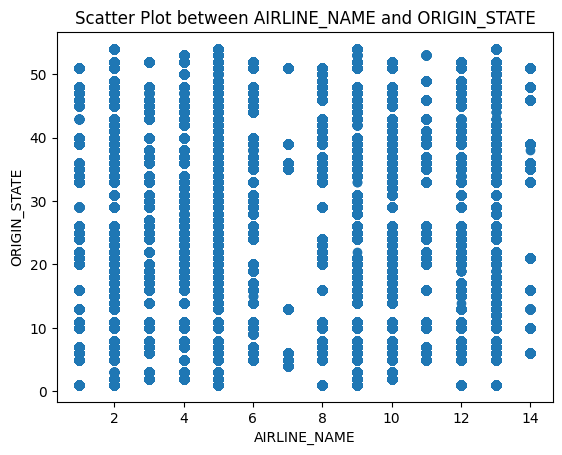

In [93]:
x_column = 'AIRLINE_NAME'  
y_column = 'ORIGIN_STATE' 

# Create a scatter plot
plt.scatter(dfoutputf[x_column], dfoutputf[y_column])
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f"Scatter Plot between {x_column} and {y_column}")
# Show the plot
plt.show()

## Normalization using Min-Max Scaling with range [-1,1]

In [81]:
# Specifying the columns we want to normalize
columns_to_normalize = ['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']

# Performing Min-Max Transformation for the specified columns [-1,1]
for column in columns_to_normalize:
    min_value = x[column].min()
    max_value = x[column].max()
    x[column] = 2 * (x[column] - min_value) / (max_value - min_value) - 1

# Displaying the updated DataFrame with Min-Max transformed values
print(x)

C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\173883116.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = 2 * (x[column] - min_value) / (max_value - min_value) - 1
C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\173883116.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = 2 * (x[column] - min_value) / (max_value - min_value) - 1
C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\173883116.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

         MONTH  DAY  FLIGHT_NUMBER  TAIL_NUMBER  AIRLINE_NAME  ORIGIN_AIRPORT  \
0         -1.0 -1.0       0.993952    -0.337283     -1.000000       -0.894410   
1         -1.0 -1.0      -0.572354    -0.364249     -0.846154        0.099379   
2         -1.0 -1.0       0.948452    -0.827988      0.692308        0.732919   
3         -1.0 -1.0      -0.494600    -0.380592     -0.846154        0.099379   
4         -1.0 -1.0      -0.887977    -0.129316     -1.000000        0.726708   
...        ...  ...            ...          ...           ...             ...   
5819074    1.0  1.0       0.872714     0.178754      0.076923        0.099379   
5819075    1.0  1.0       0.917927     0.612666      0.076923        0.037267   
5819076    1.0  1.0      -0.838733     0.804290      0.076923        0.037267   
5819077    1.0  1.0      -0.254428    -0.128907      0.076923        0.204969   
5819078    1.0  1.0       0.947876    -0.113790      0.076923        0.037267   

         ORIGIN_CITY  ORIGI

C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\173883116.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = 2 * (x[column] - min_value) / (max_value - min_value) - 1


In [82]:
x.describe()

MONTH           DAY  FLIGHT_NUMBER   TAIL_NUMBER  AIRLINE_NAME  \
count  5.704839e+06  5.704839e+06   5.704839e+06  5.704839e+06  5.704839e+06   
mean   7.840537e-03 -1.946346e-02  -1.732576e-01  4.803976e-02 -5.432100e-02   
std    6.176968e-01  5.849733e-01   6.194828e-01  5.839450e-01  5.705037e-01   
min   -1.000000e+00 -1.000000e+00  -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%   -4.545455e-01 -5.333333e-01  -7.272858e-01 -4.332993e-01 -5.384615e-01   
50%    9.090909e-02  0.000000e+00  -3.105832e-01  5.577120e-02  7.692308e-02   
75%    4.545455e-01  4.666667e-01   3.177826e-01  5.779367e-01  3.846154e-01   
max    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   

       ORIGIN_AIRPORT   ORIGIN_CITY  ORIGIN_STATE  DESTINATION_AIRPORT  \
count    5.704839e+06  5.704839e+06  5.704839e+06         5.704839e+06   
mean     4.540391e-03 -6.968605e-02 -1.194174e-01         4.747631e-03   
std      5.447925e-01  5.706498e-01  5.962573e-01         5.448719e-01   
min     -1.000000e+00 -1.000000e+00 -1.000000e+00        -1.000000e+00   
25%     -4.658385e-01 -6.286645e-01 -6.603774e-01        -4.658385e-01   
50%      8.695652e-02 -4.885993e-02 -2.452830e-01         8.695652e-02   
75%      4.223602e-01  4.267101e-01  4.339623e-01         4.223602e-01   
max      1.000000e+00  1.000000e+00  1.000000e+00         1.000000e+00   

       DESTINATION_CITY  DESTINATION_STATE  SCHEDULED_DEPARTURE  \
count      5.704839e+06       5.704839e+06         5.704839e+06   
mean      -6.935754e-02      -1.194641e-01         1.263029e-01   
std        5.706916e-01       5.962280e-01         4.101362e-01   
min       -1.000000e+00      -1.000000e+00        -1.000000e+00   
25%       -6.286645e-01      -6.603774e-01        -2.239186e-01   
50%       -4.885993e-02      -2.452830e-01         1.229856e-01   
75%        4.267101e-01       4.339623e-01         4.664970e-01   
max        1.000000e+00       1.000000e+00         1.000000e+00   

       SCHEDULED_ARRIVAL  SCHEDULED_TIME  DAY_OF_WEEK_NAME  
count       5.704839e+06    5.704839e+06      5.704839e+06  
mean        2.440445e-01   -6.603539e-01     -2.246228e-02  
std         4.226394e-01    2.165259e-01      6.620024e-01  
min        -1.000000e+00   -1.000000e+00     -1.000000e+00  
25%        -7.544810e-02   -8.242075e-01     -6.666667e-01  
50%         2.663610e-01   -7.146974e-01      0.000000e+00  
75%         5.973322e-01   -5.677233e-01      6.666667e-01  
max         1.000000e+00    1.000000e+00      1.000000e+00

In [83]:
x.head()

MONTH  DAY  FLIGHT_NUMBER  TAIL_NUMBER  AIRLINE_NAME  ORIGIN_AIRPORT  \
0   -1.0 -1.0       0.993952    -0.337283     -1.000000       -0.894410   
1   -1.0 -1.0      -0.572354    -0.364249     -0.846154        0.099379   
2   -1.0 -1.0       0.948452    -0.827988      0.692308        0.732919   
3   -1.0 -1.0      -0.494600    -0.380592     -0.846154        0.099379   
4   -1.0 -1.0      -0.887977    -0.129316     -1.000000        0.726708   

   ORIGIN_CITY  ORIGIN_STATE  DESTINATION_AIRPORT  DESTINATION_CITY  \
0    -0.921824     -1.000000             0.726708          0.732899   
1     0.127036     -0.811321             0.465839          0.921824   
2     0.661238     -0.811321            -0.583851         -0.654723   
3     0.127036     -0.811321             0.267081          0.218241   
4     0.732899      0.886792            -0.894410         -0.921824   

   DESTINATION_STATE  SCHEDULED_DEPARTURE  SCHEDULED_ARRIVAL  SCHEDULED_TIME  \
0           0.886792            -0.996607          -0.642351       -0.478386   
1          -0.660377            -0.992366          -0.375573       -0.262248   
2           0.056604            -0.983885          -0.328887       -0.244957   
3          -0.660377            -0.983885          -0.329721       -0.247839   
4          -1.000000            -0.979644          -0.734056       -0.391931   

   DAY_OF_WEEK_NAME  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

## Taking out few rows for Prediction, before our model training step

In [94]:
rows_for_prediction = x.sample(n=10)

In [95]:
rows_for_prediction.head(10)

MONTH       DAY  FLIGHT_NUMBER  TAIL_NUMBER  AIRLINE_NAME  \
743412  -0.818182  0.133333      -0.200000     0.046374      0.538462   
676351  -0.818182 -0.133333      -0.930310     0.253115      0.846154   
481536  -0.818182 -1.000000      -0.373074    -0.255567     -0.846154   
4036585  0.454545 -0.533333      -0.427502    -0.312360      0.384615   
4850841  0.636364  0.933333      -0.199424     0.626558     -0.692308   
5175006  0.818182  0.266667      -0.932901     0.949336      0.384615   
4056994  0.454545 -0.466667      -0.750324     0.208580      0.846154   
3160634  0.090909  0.066667      -0.200000     0.878243      0.384615   
4059088  0.454545 -0.400000       0.698488     0.054954     -1.000000   
265012  -1.000000  0.133333      -0.799568    -0.389581     -0.846154   

         ORIGIN_AIRPORT  ORIGIN_CITY  ORIGIN_STATE  DESTINATION_AIRPORT  \
743412         0.372671     0.315961      0.584906            -0.950311   
676351         0.776398     0.674267      0.509434            -0.335404   
481536         0.677019     0.648208      0.698113            -0.459627   
4036585        0.273292     0.231270      0.924528            -0.677019   
4850841        0.422360    -0.628664     -0.433962             0.254658   
5175006        0.602484     0.550489      0.056604            -0.875776   
4056994       -0.465839    -0.511401     -0.773585             0.732919   
3160634        0.204969     0.426710     -0.660377             0.198758   
4059088        0.490683     0.498371     -0.849057             0.726708   
265012         0.347826     0.237785     -0.094340             0.422360   

         DESTINATION_CITY  DESTINATION_STATE  SCHEDULED_DEPARTURE  \
743412          -0.876221           0.207547             0.803223   
676351           0.355049           0.207547             0.226463   
481536          -0.537459           0.698113             0.615776   
4036585         -0.850163          -0.207547             0.212044   
4850841          0.166124          -0.358491            -0.018660   
5175006         -0.882736          -0.622642            -0.487701   
4056994          0.661238          -0.811321             0.650551   
3160634         -0.029316          -0.056604            -0.203562   
4059088          0.732899           0.886792            -0.491942   
265012          -0.628664          -0.433962             0.017812   

         SCHEDULED_ARRIVAL  SCHEDULED_TIME  DAY_OF_WEEK_NAME  
743412            0.871613       -0.841499         -0.333333  
676351            0.464777       -0.345821          0.666667  
481536            0.679033       -0.870317          1.000000  
4036585           0.437266       -0.737752         -0.666667  
4850841           0.123802       -0.749280          0.333333  
5175006          -0.388078       -0.809798          0.333333  
4056994           0.774906       -0.599424         -0.333333  
3160634          -0.062943       -0.593660          0.333333  
4059088          -0.293872       -0.585014          0.000000  
265012            0.107128       -0.815562          1.000000

In [98]:
row_numbers = [743412, 676351, 481536, 4036585, 4850841, 5175006, 4056994, 3160634, 4059088, 265012]

# Extracting values of 'FLIGHT_DELAY_CATEGORY' for the specified rows
y_values = dfoutputf.loc[row_numbers, 'FLIGHT_DELAY_CATEGORY'].values

# Storing 'FLIGHT_DELAY_CATEGORY' values in 'y' column of 'rows_for_prediction'
rows_for_prediction['FLIGHT_DELAY_CATEGORY'] = y_values

# Displaying the updated 'rows_for_prediction' DataFrame
print(rows_for_prediction)


            MONTH       DAY  FLIGHT_NUMBER  TAIL_NUMBER  AIRLINE_NAME  \
743412  -0.818182  0.133333      -0.200000     0.046374      0.538462   
676351  -0.818182 -0.133333      -0.930310     0.253115      0.846154   
481536  -0.818182 -1.000000      -0.373074    -0.255567     -0.846154   
4036585  0.454545 -0.533333      -0.427502    -0.312360      0.384615   
4850841  0.636364  0.933333      -0.199424     0.626558     -0.692308   
5175006  0.818182  0.266667      -0.932901     0.949336      0.384615   
4056994  0.454545 -0.466667      -0.750324     0.208580      0.846154   
3160634  0.090909  0.066667      -0.200000     0.878243      0.384615   
4059088  0.454545 -0.400000       0.698488     0.054954     -1.000000   
265012  -1.000000  0.133333      -0.799568    -0.389581     -0.846154   

         ORIGIN_AIRPORT  ORIGIN_CITY  ORIGIN_STATE  DESTINATION_AIRPORT  \
743412         0.372671     0.315961      0.584906            -0.950311   
676351         0.776398     0.674267      0.50

In [99]:
rows_for_prediction['FLIGHT_DELAY_CATEGORY']

743412     2
676351     1
481536     0
4036585    1
4850841    0
5175006    0
4056994    0
3160634    0
4059088    1
265012     1
Name: FLIGHT_DELAY_CATEGORY, dtype: int64

In [100]:
x.columns

Index(['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_AIRPORT',
       'DESTINATION_CITY', 'DESTINATION_STATE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME'],
      dtype='object')

In [104]:
# Dropping the 'y' column from 'rows_for_prediction'
rows_for_prediction.drop(columns=['y'], inplace=True)

In [105]:
rows_for_prediction.columns

Index(['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_AIRPORT',
       'DESTINATION_CITY', 'DESTINATION_STATE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME',
       'FLIGHT_DELAY_CATEGORY'],
      dtype='object')

In [106]:
x.shape, y.shape, rows_for_prediction.shape

((5704829, 15), (5704829,), (10, 16))

# Section 7 : Model Development

## Model 1 Decision Tree Classifier 

In [126]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating and training the Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

# Predicting the target values on the test set
y_pred_dt = dt_classifier.predict(x_test)
y_prob_dt = dt_classifier.predict_proba(x_test)  # Decision trees don't have probabilities, but added for consistency

# Calculating accuracy, precision, recall, and F1-score
accuracy_dt1 = accuracy_score(y_test, y_pred_dt)
precision_dt1 = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt1 = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt1 = f1_score(y_test, y_pred_dt, average='weighted')

# Calculating Cohen's Kappa
kappa_dt1 = cohen_kappa_score(y_test, y_pred_dt)

# Calculating the Log Loss (Cross-Entropy)
logloss_dt1 = log_loss(y_test, y_prob_dt)

# Calculating the Area Under the Receiver Operating Characteristic (ROC AUC)
# Note: ROC AUC is not applicable for multi-class classification with Decision Trees
roc_auc_dt1 = roc_auc_score(y_test, y_prob_dt, multi_class='ovr')

# Calculating the Confusion Matrix
conf_matrix_dt1 = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy_dt1)
print("Precision:", precision_dt1)
print("Recall:", recall_dt1)
print("F1-Score:", f1_dt1)
print("Cohen's Kappa:", kappa_dt1)
print("Log Loss:", logloss_dt1)
print("ROC AUC:", roc_auc_dt1)
print("Confusion Matrix:")
print(conf_matrix_dt1)

# Saving the trained Decision Tree model to a file
model_filename_dt = 'decision_tree_model1N.pkl'
joblib.dump(dt_classifier, model_filename_dt)

print(f"Decision Tree model saved as '{model_filename_dt}'")


Decision Tree Classifier Metrics:
Accuracy: 0.537480455192433
Precision: 0.5456610105280275
Recall: 0.537480455192433
F1-Score: 0.5414088741813216
Cohen's Kappa: 0.1417532304839323
Log Loss: 16.670894158736182
ROC AUC: 0.5690437486858712
Confusion Matrix:
[[493546 129400 101194]
 [117209  51734  43839]
 [ 91945  44133  67968]]
Decision Tree model saved as 'decision_tree_model1N.pkl'


## Model 2 K-Nearest Neighbors (KNN)

In [101]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Finding the best value for 'k'
best_k = None
best_accuracy = 0

for k in range(2,41, 6):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    y_preds = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_preds)

    print(f"Accuracy for k = {k} is: {accuracy}")
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"Best k: {best_k}")
print(f"Best accuracy: {best_accuracy}")

Accuracy for k = 2 is: 0.6061765097706509
Accuracy for k = 8 is: 0.6261656768638559
Accuracy for k = 14 is: 0.635035338414399
Accuracy for k = 20 is: 0.6381888010881988
Accuracy for k = 26 is: 0.6396717524067284
Accuracy for k = 32 is: 0.6401634401665954
Accuracy for k = 38 is: 0.6404430273241668
Best k: 38
Best accuracy: 0.6404430273241668


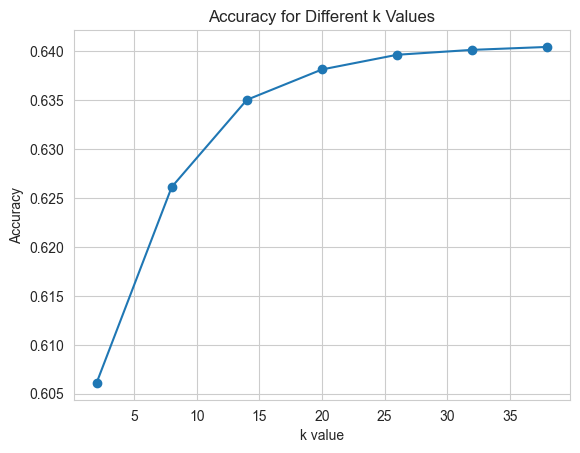

In [124]:
# Creating a line graph to visualize k values and accuracies

# Defining accuracies (replace with actual accuracy values)
accuracies = [0.6061, 0.6261, 0.6350, 0.6381, 0.6396, 0.6401, 0.6404]

# Creating a line graph to visualize k values and their corresponding accuracy scores
plt.plot(range(2, 41,6), accuracies, marker='o')
plt.title('Accuracy for Different k Values')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


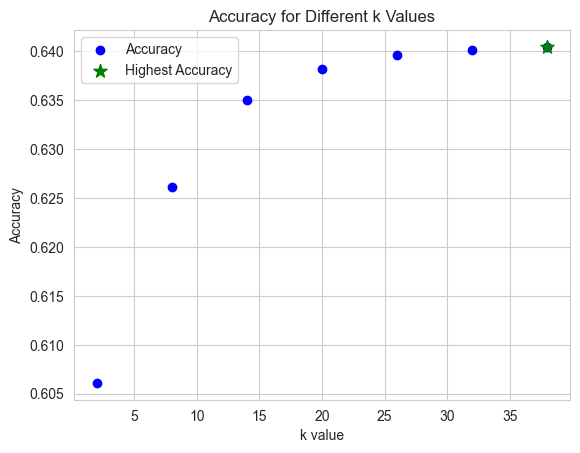

In [125]:
# Defining k_values
k_values = [2,8,14,20,26,32,38] 
# Defining accuracies
accuracies = [0.6061, 0.6261, 0.6350, 0.6381, 0.6396, 0.6401, 0.6404]

# Finding the index of the highest accuracy
highest_accuracy_index = accuracies.index(max(accuracies))
highest_accuracy_k = k_values[highest_accuracy_index]

# Creating a scatter plot to visualize the relationship between k values and accuracies
plt.scatter(k_values, accuracies, color='b', label='Accuracy')
plt.scatter(highest_accuracy_k, max(accuracies), color='g', marker='*', s=100, label='Highest Accuracy')

plt.title('Accuracy for Different k Values')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


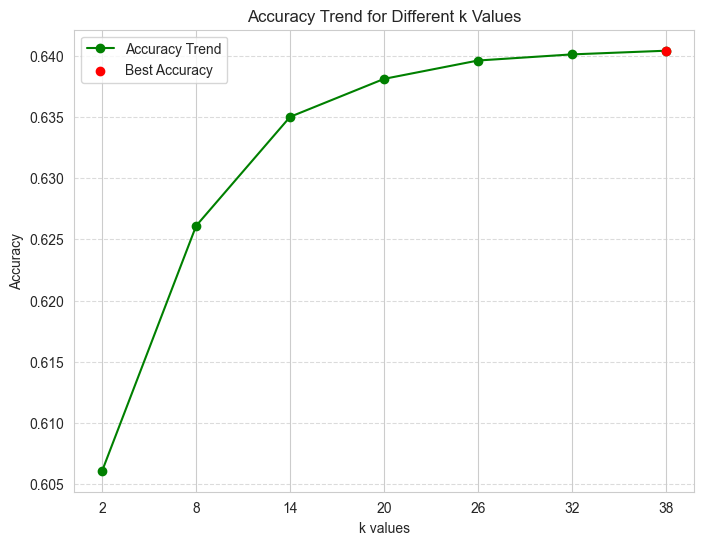

In [126]:
# Set the seaborn color palette to Greens
sns.set_palette("Greens")

# Defining k_values 
k_values = [2,8,14,20,26,32,38] 
accuracies = [0.6061, 0.6261, 0.6350, 0.6381, 0.6396, 0.6401, 0.6404]
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Plotting a line chart
plt.plot(k_values, accuracies, marker='o', color='green', label='Accuracy Trend')

# Finding the index of the best accuracy
best_accuracy_index = accuracies.index(max(accuracies))

# Highlighting the point with the best accuracy
plt.scatter(k_values[best_accuracy_index], max(accuracies), color='red', label='Best Accuracy', zorder=5)

plt.title('Accuracy Trend for Different k Values')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


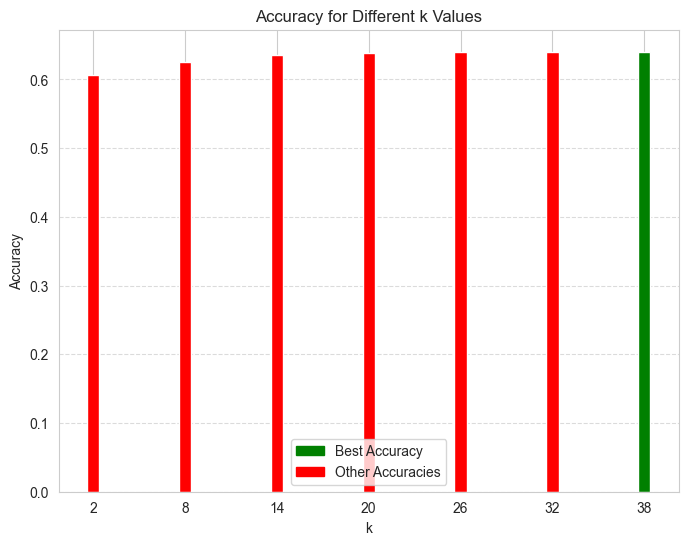

In [127]:
# Creating a bar chart to visualize the relationship between k values and accuracie

# Defining k_values 
k_values = [2,8,14,20,26,32,38] 
# Defining accuracies
accuracies = [0.6061, 0.6261, 0.6350, 0.6381, 0.6396, 0.6401, 0.6404]

# Finding the index of the best accuracy
best_accuracy_index = accuracies.index(max(accuracies))

# Setting the colors for the bars (e.g., green for best, red for others)
colors = ['g' if i == best_accuracy_index else 'r' for i in range(len(k_values))]

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

plt.bar(k_values, accuracies, color=colors)
plt.title('Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Creating custom legend for colors
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color='g', label='Best Accuracy'),
                  mpatches.Patch(color='r', label='Other Accuracies')]

plt.legend(handles=legend_handles)

plt.show()


In [93]:
best_k = 38
# Creating and training the KNN model with the best 'k'
knn = KNeighborsClassifier(n_neighbors=best_k)  # Using the best 'k'

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
knn.fit(x_train, y_train)

# Predicting the target values on the test set
y_pred_knn = knn.predict(x_test)
y_prob_knn = knn.predict_proba(x_test)  # KNN doesn't have probabilities, but added for consistency

# Calculating accuracy, precision, recall, and F1-score
accuracy_knn2 = accuracy_score(y_test, y_pred_knn)
precision_knn2 = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn2 = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn2 = f1_score(y_test, y_pred_knn, average='weighted')

# Calculating Cohen's Kappa
kappa_knn2 = cohen_kappa_score(y_test, y_pred_knn)

# Calculating Log Loss (Cross-Entropy)
logloss_knn2 = log_loss(y_test, y_prob_knn)

# Calculating Area Under the Receiver Operating Characteristic (ROC AUC)
roc_auc_knn2 = roc_auc_score(y_test, y_prob_knn, multi_class='ovr')

# Calculating the Confusion Matrix
conf_matrix_knn2 = confusion_matrix(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Classifier Metrics:")
print("Accuracy:", accuracy_knn2)
print("Precision:", precision_knn2)
print("Recall:", recall_knn2)
print("F1-Score:", f1_knn2)
print("Cohen's Kappa:", kappa_knn2)
print("Log Loss:", logloss_knn2)
print("ROC AUC:", roc_auc_knn2)
print("Confusion Matrix:")
print(conf_matrix_knn2)

# Saving the trained KNN model to a file
knn_model_filename = 'knn_model2N.pkl'
joblib.dump(knn, knn_model_filename)
print(f"K-Nearest Neighbors (KNN) model saved as '{knn_model_filename}'")


K-Nearest Neighbors (KNN) Classifier Metrics:
Accuracy: 0.6404430273241668
Precision: 0.5614084012990729
Recall: 0.6404430273241668
F1-Score: 0.5293469617855069
Cohen's Kappa: 0.06705695977793613
Log Loss: 0.9048858540693541
ROC AUC: 0.6427545279485373
Confusion Matrix:
[[708045   4116  11979]
 [200592   3786   8404]
 [181902   3250  18894]]
K-Nearest Neighbors (KNN) model saved as 'knn_model2N.pkl'


## Model 3 Multi Layer Perceptron (MLP) Neural Network

In [94]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating and training the Multi-Layer Perceptron (MLP) model
mlp_model = MLPClassifier(hidden_layer_sizes=(12, 6), max_iter=125, random_state=42)
mlp_model.fit(x_train, y_train)

# Predicting the target values on the test set
y_pred_mlp = mlp_model.predict(x_test)
y_prob_mlp = mlp_model.predict_proba(x_test)

# Calculating accuracy, precision, recall, and F1-score
accuracy_mlp1 = accuracy_score(y_test, y_pred_mlp)
precision_mlp1 = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp1 = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp1 = f1_score(y_test, y_pred_mlp, average='weighted')

# Calculating Cohen's Kappa
kappa_mlp1 = cohen_kappa_score(y_test, y_pred_mlp)

# Calculating Log Loss (Cross-Entropy)
logloss_mlp1 = log_loss(y_test, y_prob_mlp)

# Calculating Area Under the Receiver Operating Characteristic (ROC AUC)
roc_auc_mlp1 = roc_auc_score(y_test, y_prob_mlp, multi_class='ovr')

# Calculating the Confusion Matrix
conf_matrix_mlp1 = confusion_matrix(y_test, y_pred_mlp)

print("Multi-Layer Perceptron (MLP) Classifier Metrics:")
print("Accuracy:", accuracy_mlp1)
print("Precision:", precision_mlp1)
print("Recall:", recall_mlp1)
print("F1-Score:", f1_mlp1)
print("Cohen's Kappa:", kappa_mlp1)
print("Log Loss:", logloss_mlp1)
print("ROC AUC:", roc_auc_mlp1)
print("Confusion Matrix:")
print(conf_matrix_mlp1)

# Saving the trained MLP model to a file
mlp_model_filename = 'mlp_model1N.pkl'
joblib.dump(mlp_model, mlp_model_filename)
print(f"Multi-Layer Perceptron (MLP) model saved as '{mlp_model_filename}'")


C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multi-Layer Perceptron (MLP) Classifier Metrics:
Accuracy: 0.6368828924211722
Precision: 0.48914250260932046
Recall: 0.6368828924211722
F1-Score: 0.5081548560422826
Cohen's Kappa: 0.027015482785557543
Log Loss: 0.8798861485729501
ROC AUC: 0.6117496970190303
Confusion Matrix:
[[717519      0   6621]
 [208846      0   3936]
 [194902      0   9144]]
Multi-Layer Perceptron (MLP) model saved as 'mlp_model1N.pkl'


## Model 4 XGBOOST CLASSIFIER 

In [116]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating and training the XGBoost Classifier model
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Predicting the target values on the test set
y_pred_xgb = xgb_classifier.predict(x_test)
y_prob_xgb = xgb_classifier.predict_proba(x_test)

# Calculating accuracy, precision, recall, and F1-score
accuracy_xgb1 = accuracy_score(y_test, y_pred_xgb)
precision_xgb1 = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb1 = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Calculating Cohen's Kappa
kappa_xgb1 = cohen_kappa_score(y_test, y_pred_xgb)

# Calculating Log Loss (Cross-Entropy)
logloss_xgb1 = log_loss(y_test, y_prob_xgb)

# Calculating Area Under the Receiver Operating Characteristic (ROC AUC)
# Note: ROC AUC is applicable only for binary classification problems
# You may need to adapt it for multi-class classification
roc_auc_xgb1 = roc_auc_score(y_test, y_prob_xgb, multi_class='ovr')

# Calculating the Confusion Matrix
conf_matrix_xgb1 = confusion_matrix(y_test, y_pred_xgb)

# Printing the metrics
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy_xgb1)
print("Precision:", precision_xgb1)
print("Recall:", recall_xgb1)
print("F1-Score:", f1_xgb1)
print("Cohen's Kappa:", kappa_xgb1)
print("Log Loss:", logloss_xgb1)
print("ROC AUC:", roc_auc_xgb1)
print("Confusion Matrix:")
print(conf_matrix_xgb1)

# Saving the trained XGBoost model to a file
model_filename_xgb = 'xgboost_model1N.pkl'
joblib.dump(xgb_classifier, model_filename_xgb)

print(f"XGBoost model saved as '{model_filename_xgb}'")

C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

XGBoost Classifier Metrics:
Accuracy: 0.6489571117807191
Precision: 0.5961966118592444
Recall: 0.6489571117807191
F1-Score: 0.5413086540833032
Cohen's Kappa: 0.0964374112346238
Log Loss: 0.83921036195984
ROC AUC: 0.677822446116609
Confusion Matrix:
[[709189    386  14651]
 [200668    622  11555]
 [172897    371  30627]]
XGBoost model saved as 'xgboost_model1N.pkl'


## Model 5 Multinomial Logistic Regression

In [97]:
# Creating and training the Multinomial Logistic Regression model
logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
logistic_regression.fit(x_train, y_train)

# Predicting the target values on the test set
y_pred_lr = logistic_regression.predict(x_test)
y_prob_lr = logistic_regression.predict_proba(x_test)

# Calculating accuracy, precision, recall, and F1-score
accuracy_lr2 = accuracy_score(y_test, y_pred_lr)
precision_lr2 = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr2 = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr2 = f1_score(y_test, y_pred_lr, average='weighted')

# Calculating Cohen's Kappa
kappa_lr2 = cohen_kappa_score(y_test, y_pred_lr)

# Calculating Log Loss (Cross-Entropy)
logloss_lr2 = log_loss(y_test, y_prob_lr)

# Calculating Area Under the Receiver Operating Characteristic (ROC AUC)
roc_auc_lr2 = roc_auc_score(y_test, y_prob_lr, multi_class='ovr')

# Calculating the Confusion Matrix
conf_matrix_lr2 = confusion_matrix(y_test, y_pred_lr)

print("Multinomial Logistic Regression Metrics:")
print("Accuracy:", accuracy_lr2)
print("Precision:", precision_lr2)
print("Recall:", recall_lr2)
print("F1-Score:", f1_lr2)
print("Cohen's Kappa:", kappa_lr2)
print("Log Loss:", logloss_lr2)
print("ROC AUC:", roc_auc_lr2)
print("Confusion Matrix:")
print(conf_matrix_lr2)

# Saving the trained Logistic Regression model to a file
model_filename_lr = 'logistic_regression_model2N.pkl'
joblib.dump(logistic_regression, model_filename_lr)

print(f"Logistic Regression model saved as '{model_filename_lr}'")


C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multinomial Logistic Regression Metrics:
Accuracy: 0.6346716121749252
Precision: 0.4028080553007186
Recall: 0.6346716121749252
F1-Score: 0.4928305505529442
Cohen's Kappa: 0.0
Log Loss: 0.8951931442765735
ROC AUC: 0.5795762125771539
Confusion Matrix:
[[724140      0      0]
 [212782      0      0]
 [204046      0      0]]
Logistic Regression model saved as 'logistic_regression_model2N.pkl'


## Model 6 Naive Bayes Classifier

### Min-max scale normalizing between range [0,1] for NBC as it can't take any negative values

In [104]:
# Specifying the columns we want to normalize
columns_to_normalize = ['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']

# Performing Min-Max Transformation for the specified columns [0, 1]
for column in columns_to_normalize:
    min_value = x[column].min()
    max_value = x[column].max()

    # Handling division by zero when max_value equals min_value
    if max_value != min_value:
        x[column] = (x[column] - min_value) / (max_value - min_value)
    else:
        # If max_value equals min_value, set the column to 0 or any desired constant
        x[column] = 0

# Displaying the updated DataFrame with Min-Max transformed values
print(x)


C:\Users\arjun\AppData\Local\Temp\ipykernel_6764\2911315918.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = (x[column] - min_value) / (max_value - min_value)


         MONTH  DAY  FLIGHT_NUMBER  TAIL_NUMBER  AIRLINE_NAME  ORIGIN_AIRPORT  \
0          0.0  0.0       0.996976     0.331359      0.000000        0.052795   
1          0.0  0.0       0.213823     0.317875      0.076923        0.549689   
2          0.0  0.0       0.974226     0.086006      0.846154        0.866460   
3          0.0  0.0       0.252700     0.309704      0.076923        0.549689   
4          0.0  0.0       0.056012     0.435342      0.000000        0.863354   
...        ...  ...            ...          ...           ...             ...   
5819074    1.0  1.0       0.936357     0.589377      0.538462        0.549689   
5819075    1.0  1.0       0.958963     0.806333      0.538462        0.518634   
5819076    1.0  1.0       0.080634     0.902145      0.538462        0.518634   
5819077    1.0  1.0       0.372786     0.435546      0.538462        0.602484   
5819078    1.0  1.0       0.973938     0.443105      0.538462        0.518634   

         ORIGIN_CITY  ORIGI

In [105]:
x.head(5)

MONTH  DAY  FLIGHT_NUMBER  TAIL_NUMBER  AIRLINE_NAME  ORIGIN_AIRPORT  \
0    0.0  0.0       0.996976     0.331359      0.000000        0.052795   
1    0.0  0.0       0.213823     0.317875      0.076923        0.549689   
2    0.0  0.0       0.974226     0.086006      0.846154        0.866460   
3    0.0  0.0       0.252700     0.309704      0.076923        0.549689   
4    0.0  0.0       0.056012     0.435342      0.000000        0.863354   

   ORIGIN_CITY  ORIGIN_STATE  DESTINATION_AIRPORT  DESTINATION_CITY  \
0     0.039088      0.000000             0.863354          0.866450   
1     0.563518      0.094340             0.732919          0.960912   
2     0.830619      0.094340             0.208075          0.172638   
3     0.563518      0.094340             0.633540          0.609121   
4     0.866450      0.943396             0.052795          0.039088   

   DESTINATION_STATE  SCHEDULED_DEPARTURE  SCHEDULED_ARRIVAL  SCHEDULED_TIME  \
0           0.943396             0.001696           0.178825        0.260807   
1           0.169811             0.003817           0.312213        0.368876   
2           0.528302             0.008058           0.335556        0.377522   
3           0.169811             0.008058           0.335140        0.376081   
4           0.000000             0.010178           0.132972        0.304035   

   DAY_OF_WEEK_NAME  
0               0.5  
1               0.5  
2               0.5  
3               0.5  
4               0.5

In [106]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating and training the Multinomial Naive Bayes model
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(x_train, y_train)

# Predicting the target values on the test set
y_pred_nb = naive_bayes_classifier.predict(x_test)
y_prob_nb = naive_bayes_classifier.predict_proba(x_test)

# Calculating accuracy, precision, recall, and F1-score
accuracy_nb1 = accuracy_score(y_test, y_pred_nb)
precision_nb1 = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb1 = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb1 = f1_score(y_test, y_pred_nb, average='weighted')

# Calculating Cohen's Kappa
kappa_nb1 = cohen_kappa_score(y_test, y_pred_nb)

# Calculating Log Loss (Cross-Entropy)
logloss_nb1 = log_loss(y_test, y_prob_nb)

# Calculating Area Under the Receiver Operating Characteristic (ROC AUC)
roc_auc_nb1 = roc_auc_score(y_test, y_prob_nb, multi_class='ovr')

# Calculating the Confusion Matrix
conf_matrix_nb1 = confusion_matrix(y_test, y_pred_nb)

print("Multinomial Naive Bayes Metrics:")
print("Accuracy:", accuracy_nb1)
print("Precision:", precision_nb1)
print("Recall:", recall_nb1)
print("F1-Score:", f1_nb1)
print("Cohen's Kappa:", kappa_nb1)
print("Log Loss:", logloss_nb1)
print("ROC AUC:", roc_auc_nb1)
print("Confusion Matrix:")
print(conf_matrix_nb1)

# Printing the Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Saving the trained Multinomial Naive Bayes model to a file
model_filename_nb = 'naive_bayes_model1N.pkl'
joblib.dump(naive_bayes_classifier, model_filename_nb)

print(f"Multinomial Naive Bayes model saved as '{model_filename_nb}'")


C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Multinomial Naive Bayes Metrics:
Accuracy: 0.6346716121749252
Precision: 0.4028080553007186
Recall: 0.6346716121749252
F1-Score: 0.4928305505529442
Cohen's Kappa: 0.0
Log Loss: 0.9062722766733006
ROC AUC: 0.5715378241631409
Confusion Matrix:
[[724140      0      0]
 [212782      0      0]
 [204046      0      0]]
Classification Report:


C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.63      1.00      0.78    724140
           1       0.00      0.00      0.00    212782
           2       0.00      0.00      0.00    204046

    accuracy                           0.63   1140968
   macro avg       0.21      0.33      0.26   1140968
weighted avg       0.40      0.63      0.49   1140968

Multinomial Naive Bayes model saved as 'naive_bayes_model1N.pkl'


C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Section 8 : Model Evaluation

In [118]:
accuracy_dt1, accuracy_mlp1, accuracy_knn2, accuracy_xgb1, accuracy_lr2, accuracy_nb1 = 0.5375, 0.6369, 0.6404, 0.6490, 0.6347, 0.6347
precision_dt1, precision_mlp1, precision_knn2, precision_xgb1, precision_lr2, precision_nb1 = 0.5457, 0.4891, 0.5614, 0.5962, 0.4028, 0.4028
recall_dt1, recall_mlp1, recall_knn2, recall_xgb1, recall_lr2, recall_nb1 = 0.5375, 0.6369, 0.6404, 0.6490, 0.6347, 0.6347
f1_dt1, f1_mlp1, f1_knn2, f1_xgb1, f1_lr2, f1_nb1 = 0.5414, 0.5082, 0.5293, 0.5413, 0.4928, 0.4928
kappa_dt1, kappa_mlp1, kappa_knn2, kappa_xgb1, kappa_lr2, kappa_nb1 = 0.1418, 0.0270, 0.0671, 0.0964, 0.0000, 0.0000
logloss_dt1, logloss_mlp1, logloss_knn2, logloss_xgb1, logloss_lr2, logloss_nb1 = 16.6709, 0.8799, 0.9049, 0.8392, 0.8952, 0.9063
roc_auc_dt1, roc_auc_mlp1, roc_auc_knn2, roc_auc_xgb1, roc_auc_lr2, roc_auc_nb1 = 0.5690, 0.6117, 0.6428, 0.6778, 0.5796, 0.5715

metrics = {
    'Model': ['Decision Tree', 'Multi-Layer Perceptron', 'K-Nearest Neighbors', 'XG Boost', 'Logistic Regression', 'Naive Bayes'],
    'Accuracy': [accuracy_dt1, accuracy_mlp1, accuracy_knn2, accuracy_xgb1, accuracy_lr2, accuracy_nb1],
    'Precision': [precision_dt1, precision_mlp1, precision_knn2, precision_xgb1, precision_lr2, precision_nb1],
    'Recall': [recall_dt1, recall_mlp1, recall_knn2, recall_xgb1, recall_lr2, recall_nb1],
    'F1-Score': [f1_dt1, f1_mlp1, f1_knn2, f1_xgb1, f1_lr2, f1_nb1],
    'Cohen Kappa Score': [kappa_dt1, kappa_mlp1, kappa_knn2, kappa_xgb1, kappa_lr2, kappa_nb1],
    'Log Loss': [logloss_dt1, logloss_mlp1, logloss_knn2, logloss_xgb1, logloss_lr2, logloss_nb1],
    'ROC AUC Score': [roc_auc_dt1, roc_auc_mlp1, roc_auc_knn2, roc_auc_xgb1, roc_auc_lr2, roc_auc_nb1],
}

# Creating a DataFrame to store the metrics
results = pd.DataFrame(metrics)

# Displaying the results
print(results)


                    Model  Accuracy  Precision  Recall  F1-Score  \
0           Decision Tree    0.5375     0.5457  0.5375    0.5414   
1  Multi-Layer Perceptron    0.6369     0.4891  0.6369    0.5082   
2     K-Nearest Neighbors    0.6404     0.5614  0.6404    0.5293   
3                XG Boost    0.6490     0.5962  0.6490    0.5413   
4     Logistic Regression    0.6347     0.4028  0.6347    0.4928   
5             Naive Bayes    0.6347     0.4028  0.6347    0.4928   

   Cohen Kappa Score  Log Loss  ROC AUC Score  
0             0.1418   16.6709         0.5690  
1             0.0270    0.8799         0.6117  
2             0.0671    0.9049         0.6428  
3             0.0964    0.8392         0.6778  
4             0.0000    0.8952         0.5796  
5             0.0000    0.9063         0.5715  


## Visualization of the result for the evaluation matrics

C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\2453686915.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(models, rotation=45)
C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\2453686915.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(models, rotation=45)
C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\2453686915.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(models, rotation=45)
C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\2453686915.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(models, rotation=45)
C:\Users\arjun\A

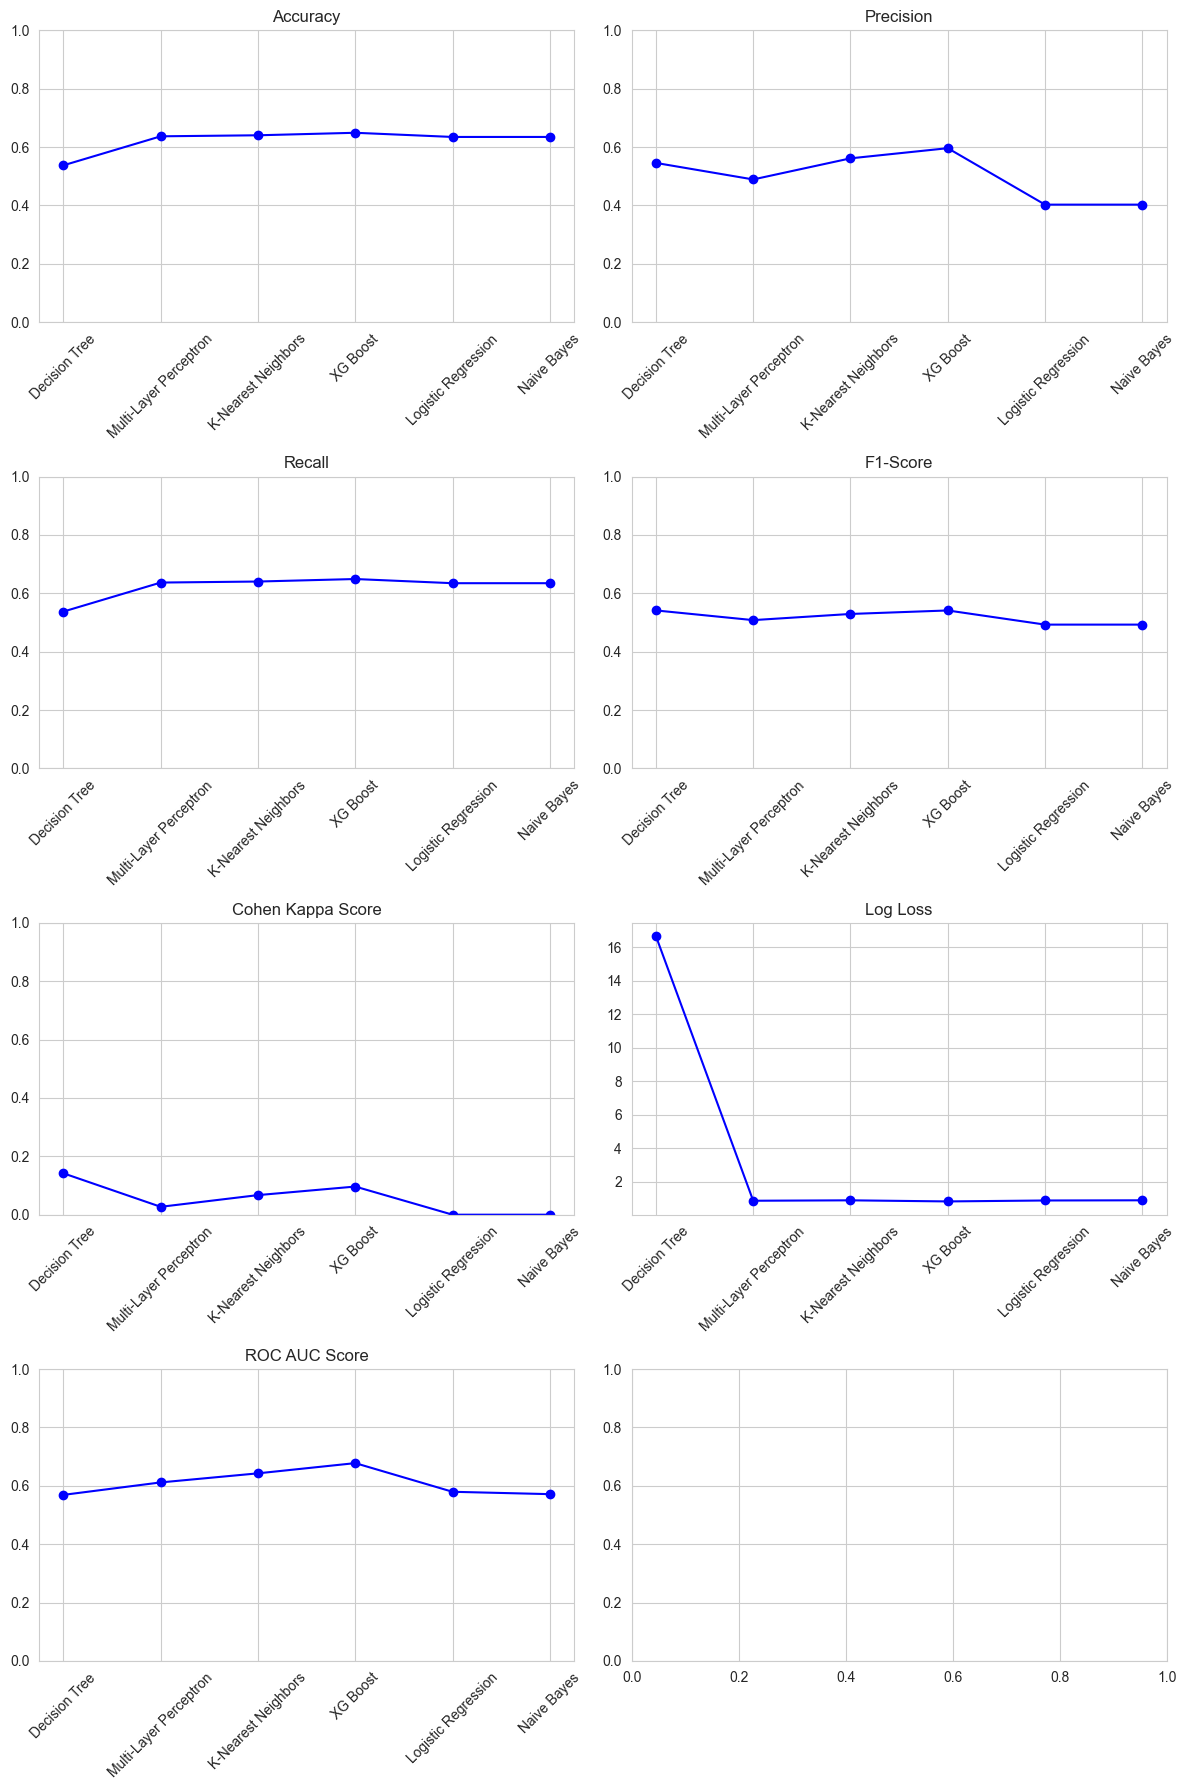

In [119]:
# 1. Line chart
# Set the style for the plots (optional)
sns.set_style("whitegrid")

models = results['Model']
accuracy = results['Accuracy']
precision = results['Precision']
recall = results['Recall']
f1_score = results['F1-Score']
cohen_kappa = results['Cohen Kappa Score']
log_loss_values = results['Log Loss']
roc_auc = results['ROC AUC Score']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))

# Accuracy Line Chart
axes[0, 0].plot(models, accuracy, marker='o', linestyle='-', color='blue')  # Change color to blue
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_xticklabels(models, rotation=45)
axes[0, 0].set_ylim(0, 1)

# Precision Line Chart
axes[0, 1].plot(models, precision, marker='o', linestyle='-', color='blue')  # Change color to blue
axes[0, 1].set_title('Precision')
axes[0, 1].set_xticklabels(models, rotation=45)
axes[0, 1].set_ylim(0, 1)

# Recall Line Chart
axes[1, 0].plot(models, recall, marker='o', linestyle='-', color='blue')  # Change color to blue
axes[1, 0].set_title('Recall')
axes[1, 0].set_xticklabels(models, rotation=45)
axes[1, 0].set_ylim(0, 1)

# F1-Score Line Chart
axes[1, 1].plot(models, f1_score, marker='o', linestyle='-', color='blue')  # Change color to blue
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_xticklabels(models, rotation=45)
axes[1, 1].set_ylim(0, 1)

# Cohen Kappa Line Chart
axes[2, 0].plot(models, cohen_kappa, marker='o', linestyle='-', color='blue')  # Change color to blue
axes[2, 0].set_title('Cohen Kappa Score')
axes[2, 0].set_xticklabels(models, rotation=45)
axes[2, 0].set_ylim(0, 1)

# Log Loss Line Chart
axes[2, 1].plot(models, log_loss_values, marker='o', linestyle='-', color='blue')  # Change color to blue
axes[2, 1].set_title('Log Loss')
axes[2, 1].set_xticklabels(models, rotation=45)

# ROC AUC Line Chart
axes[3, 0].plot(models, roc_auc, marker='o', linestyle='-', color='blue')  # Change color to blue
axes[3, 0].set_title('ROC AUC Score')
axes[3, 0].set_xticklabels(models, rotation=45)
axes[3, 0].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\432051412.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(sorted_models, rotation=45)
C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\432051412.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(models, rotation=45)
C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\432051412.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(models, rotation=45)
C:\Users\arjun\AppData\Local\Temp\ipykernel_11988\432051412.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(models, rotation=45)
C:\Users\arju

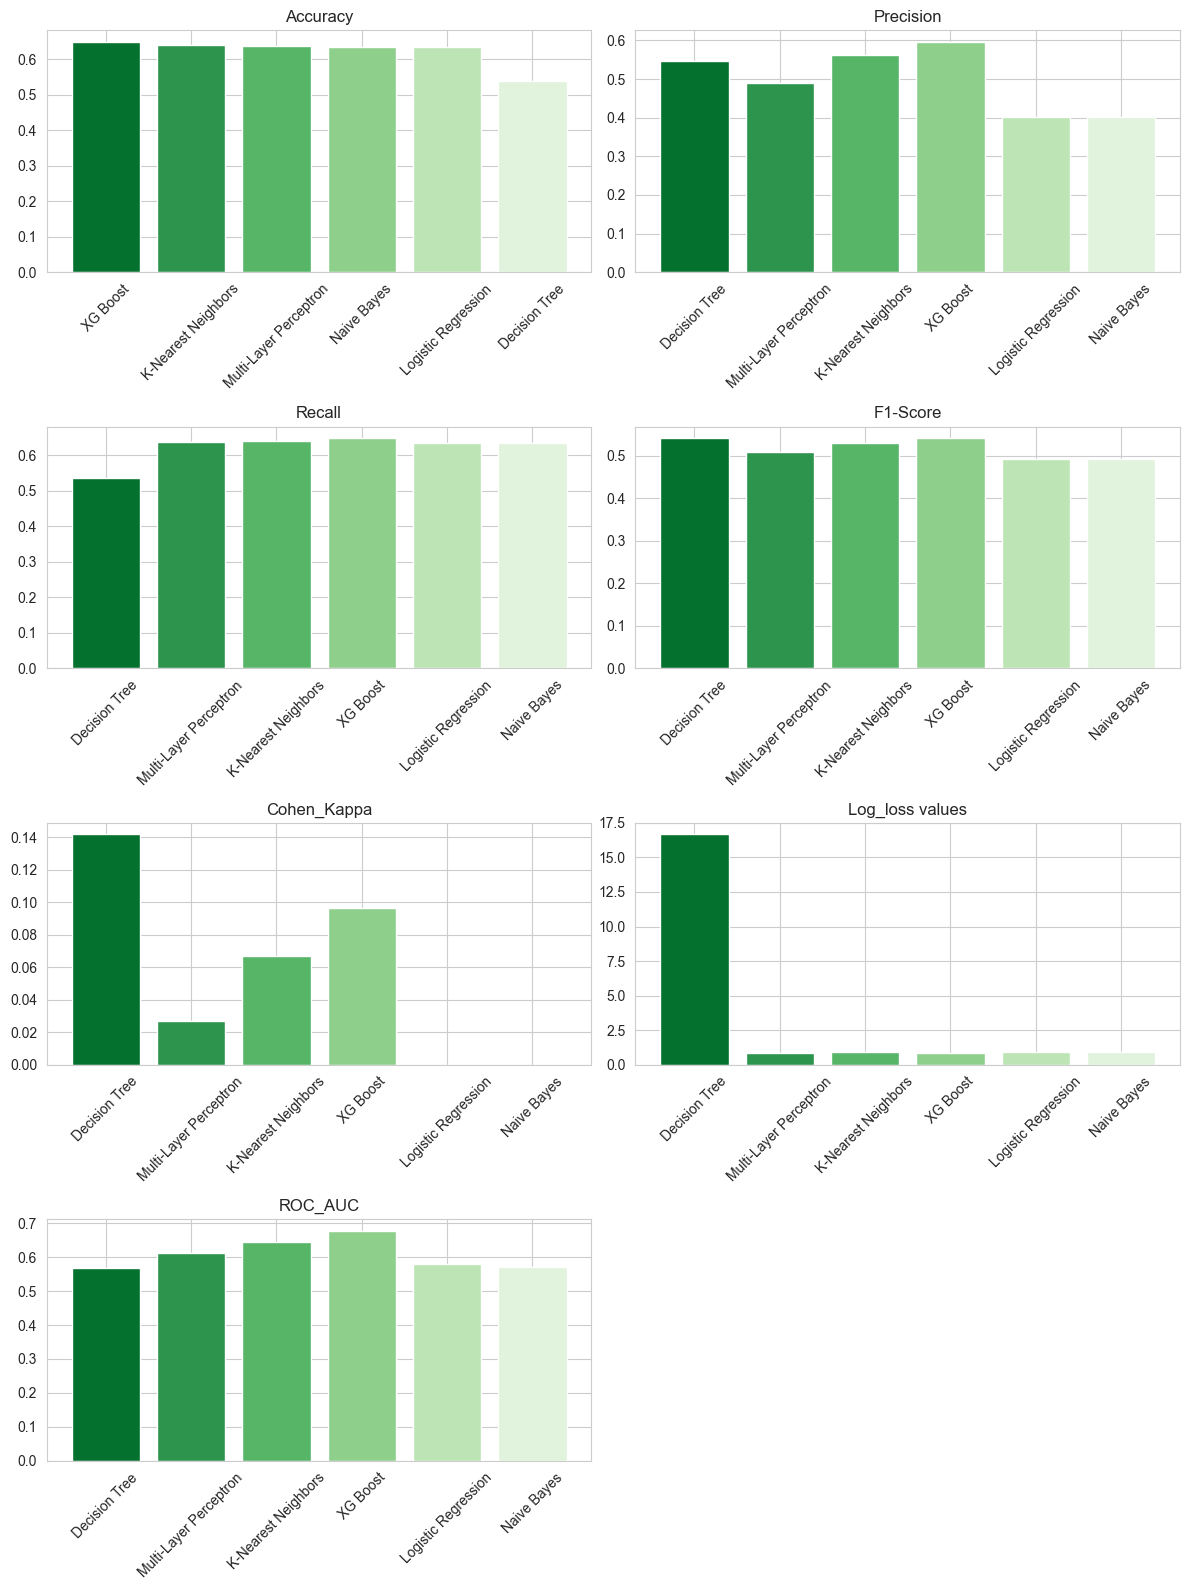

In [120]:
# 2. Bar chart
sns.set_style("whitegrid")

models = results['Model']
accuracy = results['Accuracy']
precision = results['Precision']
recall = results['Recall']
f1_score = results['F1-Score']
cohen_kappa = results['Cohen Kappa Score']
log_loss_values = results['Log Loss']
roc_auc = results['ROC AUC Score']

# Sorting models based on accuracy in reverse order
sorted_models = [model for _, model in sorted(zip(accuracy, models), reverse=True)]
sorted_accuracy = sorted(accuracy, reverse=True)
color_palette = sns.color_palette("Greens_r", len(models))  # Use "_r" for reversed shades

# Creating subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# Bar Chart for Accuracy
axes[0, 0].bar(sorted_models, sorted_accuracy, color=[color_palette[sorted_models.index(model)] for model in sorted_models])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_xticklabels(sorted_models, rotation=45)

# Bar Chart for Precision
axes[0, 1].bar(models, precision, color=sns.color_palette("Greens_r", len(models)))  # Use "_r" for reversed shades
axes[0, 1].set_title('Precision')
axes[0, 1].set_xticklabels(models, rotation=45)

# Bar Chart for Recall
axes[1, 0].bar(models, recall, color=sns.color_palette("Greens_r", len(models)))  # Use "_r" for reversed shades
axes[1, 0].set_title('Recall')
axes[1, 0].set_xticklabels(models, rotation=45)

# Bar Chart for F1-Score
axes[1, 1].bar(models, f1_score, color=sns.color_palette("Greens_r", len(models)))  # Use "_r" for reversed shades
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_xticklabels(models, rotation=45)

# Bar Chart for Cohen_kappa
axes[2, 0].bar(models, cohen_kappa, color=sns.color_palette("Greens_r", len(models)))  # Use "_r" for reversed shades
axes[2, 0].set_title('Cohen_Kappa')
axes[2, 0].set_xticklabels(models, rotation=45)

# Bar Chart for Log_loss values
axes[2, 1].bar(models, log_loss_values, color=sns.color_palette("Greens_r", len(models)))  # Use "_r" for reversed shades
axes[2, 1].set_title('Log_loss values')
axes[2, 1].set_xticklabels(models, rotation=45)

# Bar Chart for roc_auc
axes[3, 0].bar(models, roc_auc, color=sns.color_palette("Greens_r", len(models)))  # Use "_r" for reversed shades
axes[3, 0].set_title('ROC_AUC')
axes[3, 0].set_xticklabels(models, rotation=45)

# Hiding the empty subplot
axes[3, 1].axis('off')

# Adjusting layout
plt.tight_layout()

# Showing the plots
plt.show()


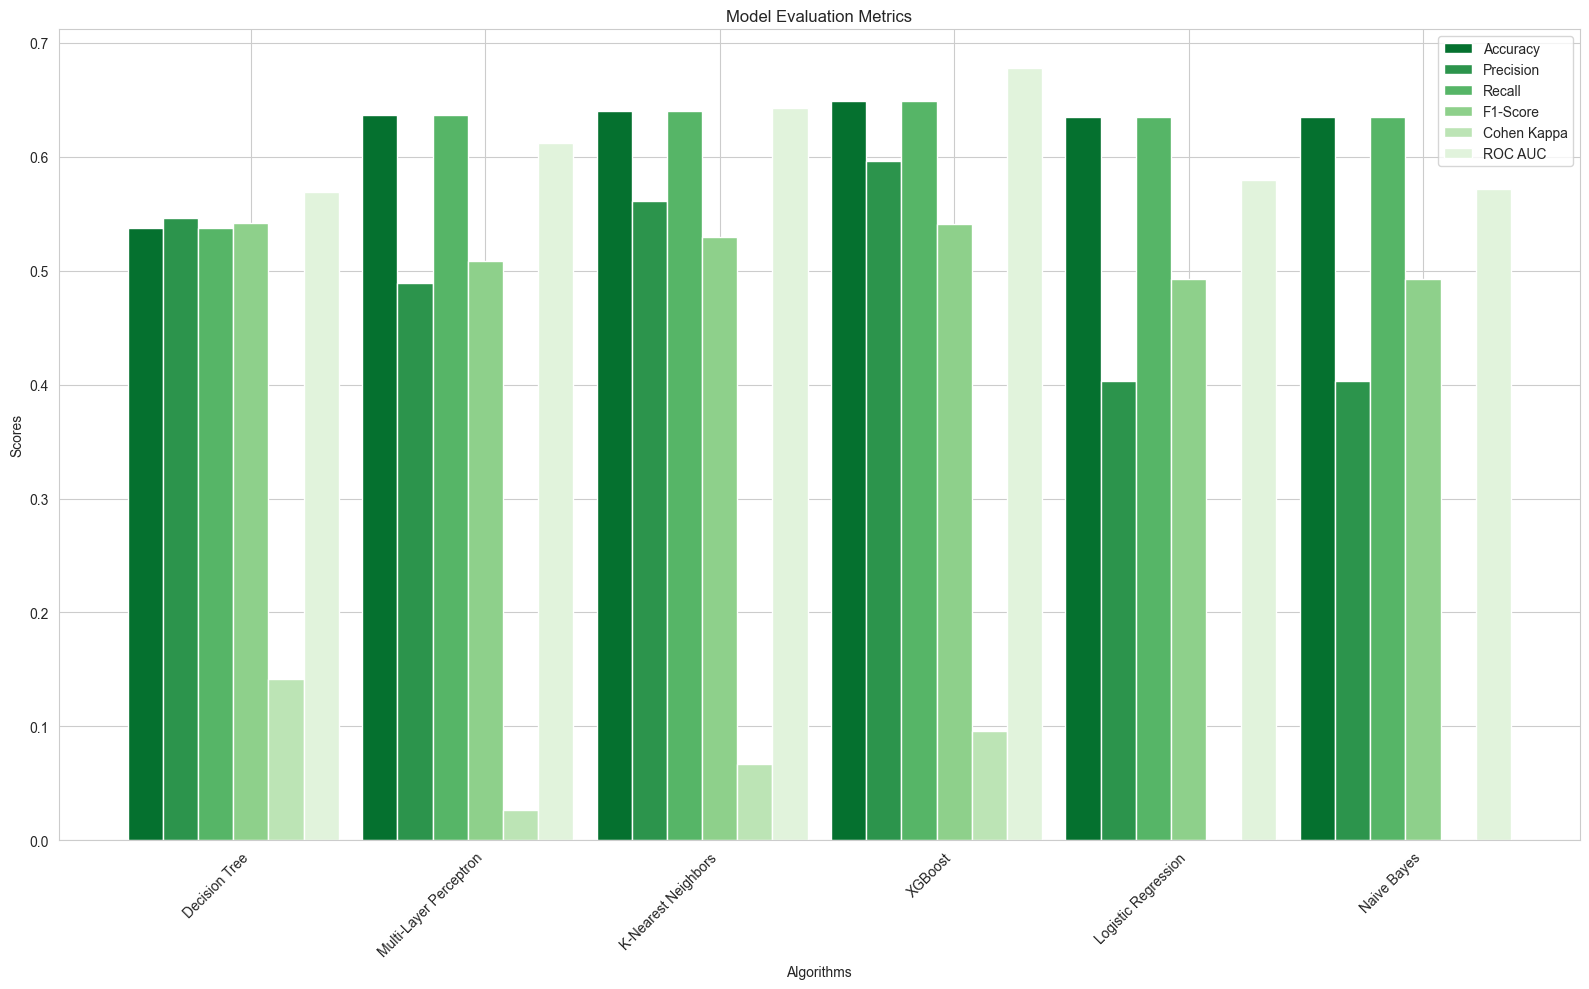

In [121]:
models = ['Decision Tree', 'Multi-Layer Perceptron', 'K-Nearest Neighbors', 'XGBoost', 'Logistic Regression', 'Naive Bayes']

# Comparasion of actual metrics for all 6 models
accuracy = [accuracy_dt1, accuracy_mlp1, accuracy_knn2, accuracy_xgb1, accuracy_lr2, accuracy_nb1]
precision = [precision_dt1, precision_mlp1, precision_knn2, precision_xgb1, precision_lr2, precision_nb1]
recall = [recall_dt1, recall_mlp1, recall_knn2, recall_xgb1, recall_lr2, recall_nb1]
f1_score = [f1_dt1, f1_mlp1, f1_knn2, f1_xgb1, f1_lr2, f1_nb1]
cohen_kappa = [kappa_dt1, kappa_mlp1, kappa_knn2, kappa_xgb1, kappa_lr2, kappa_nb1]  # Add cohen_kappa
roc_auc = [roc_auc_dt1, roc_auc_mlp1, roc_auc_knn2, roc_auc_xgb1, roc_auc_lr2, roc_auc_nb1]  # Add roc_auc

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

# Reversing the order of shades from darkest to lightest
green_shades = sns.color_palette("Greens", len(models))[::-1]

# Increasing the figure size
fig, ax = plt.subplots(figsize=(16, 10))

rects1 = ax.bar(x - 3 * width, accuracy, width, label='Accuracy', color=green_shades[0])
rects2 = ax.bar(x - 2 * width, precision, width, label='Precision', color=green_shades[1])
rects3 = ax.bar(x - width, recall, width, label='Recall', color=green_shades[2])
rects4 = ax.bar(x, f1_score, width, label='F1-Score', color=green_shades[3])
rects5 = ax.bar(x + width, cohen_kappa, width, label='Cohen Kappa', color=green_shades[4])
rects6 = ax.bar(x + 2 * width, roc_auc, width, label='ROC AUC', color=green_shades[5])

ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()


## Using bar chart to visulaize the result for 'Log Loss' evaluation metics

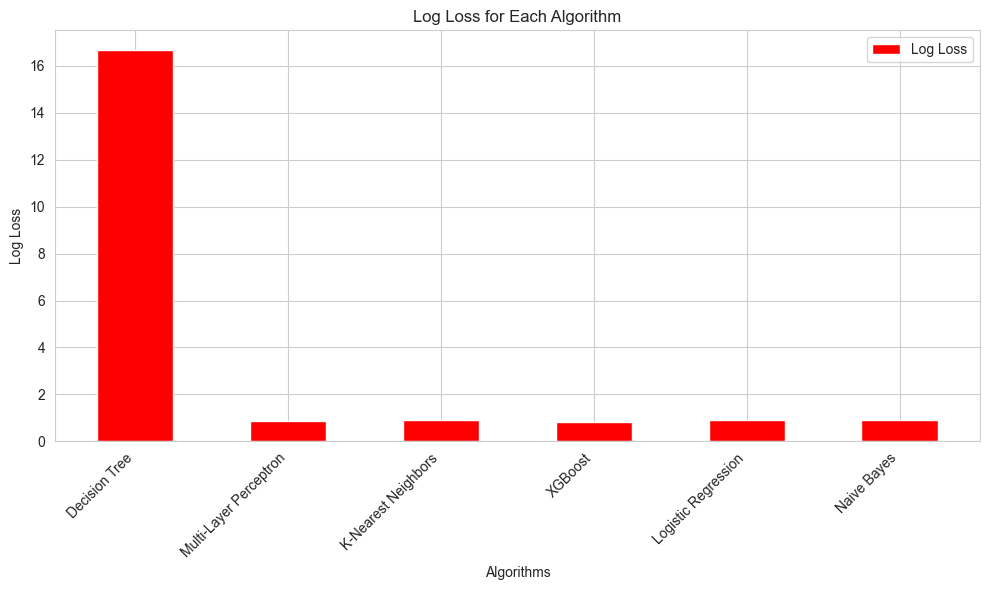

In [122]:
models = ['Decision Tree', 'Multi-Layer Perceptron', 'K-Nearest Neighbors', 'XGBoost', 'Logistic Regression', 'Naive Bayes']

# Replacing the placeholders with your actual metrics
log_loss_values = [logloss_dt1, logloss_mlp1, logloss_knn2, logloss_xgb1, logloss_lr2, logloss_nb1]

x = np.arange(len(models))  # the label locations
width = 0.5  # the width of the bars

# Increasing the figure size
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x, log_loss_values, width, label='Log Loss', color='red')  # Use purple color for Log Loss

ax.set_xlabel('Algorithms')
ax.set_ylabel('Log Loss')
ax.set_title('Log Loss for Each Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()


# Findings 

## XG Boost model outperforms other models with the highest accuracy of 64.9% and the lowest log loss of 0.8392. In contrast, the Decision Tree model yields lower accuracy at 53.75% and the highest log loss of 16.67.

# MAKING PREDICTION ON UNSEEN USER INPUT USING XG Boost Classifier

In [107]:
# predicting whether a flight will be delayed or not and, if delayed, by how much time.

In [110]:
# Loading the saved XGBoost model
loaded_model = joblib.load('xgboost_model1N.pkl')

# Extracting the features used during training (excluding the target column)
model_features = loaded_model.get_booster().feature_names

# Printing feature names used during training
print("Features used during training:", model_features)

# Printing feature names in 'rows_for_prediction'
print("Features in 'rows_for_prediction':", rows_for_prediction.columns)

# Making predictions on the entire DataFrame
rows_for_prediction['PREDICTED_FLIGHT_DELAY_CATEGORY'] = loaded_model.predict(rows_for_prediction[model_features])

Features used during training: ['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME', 'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']
Features in 'rows_for_prediction': Index(['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_AIRPORT',
       'DESTINATION_CITY', 'DESTINATION_STATE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME',
       'FLIGHT_DELAY_CATEGORY'],
      dtype='object')


C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

## a. Prediction on unseen data for flight delay prediction with known target variable

C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

Index: 0, Actual Class: Major Delay, Predicted Class: On Time
Index: 1, Actual Class: On Time, Predicted Class: On Time
Index: 2, Actual Class: On Time, Predicted Class: On Time


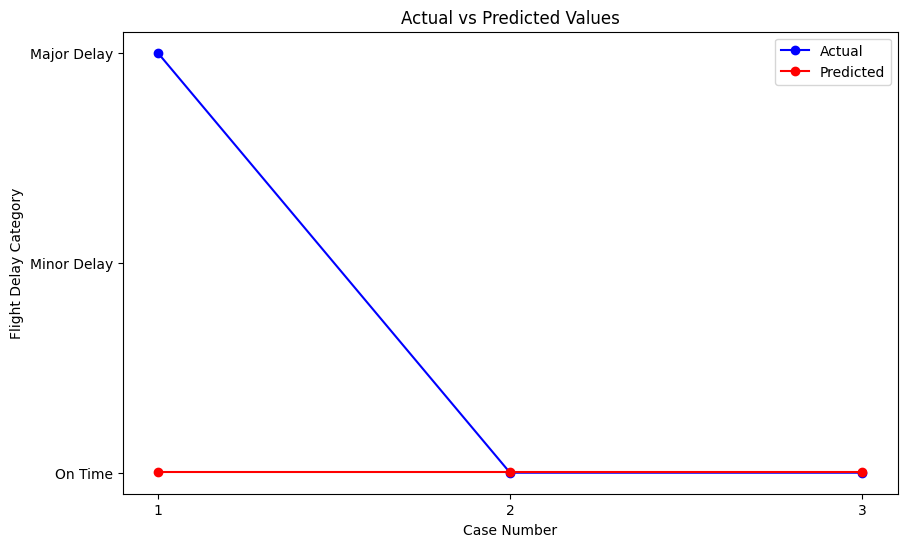

In [4]:
# Loading the pre-trained model
loaded_model = joblib.load('xgboost_model1N.pkl')

# Creating DataFrame from the given 10 rows input
rows_for_prediction = pd.DataFrame({
    'MONTH': [-0.818182, -0.818182, -0.818182],
    'DAY': [0.133333, -0.133333, -1.000000],
    'FLIGHT_NUMBER': [-0.200000, -0.930310, -0.373074],
    'TAIL_NUMBER': [0.046374, 0.253115, -0.255567],
    'AIRLINE_NAME': [0.538462, 0.846154, -0.846154],
    'ORIGIN_AIRPORT': [0.372671, 0.776398, 0.677019],
    'ORIGIN_CITY': [0.315961, 0.674267, 0.648208],
    'ORIGIN_STATE': [0.584906, 0.509434, 0.698113],
    'DESTINATION_AIRPORT': [-0.950311, -0.335404, -0.459627],
    'DESTINATION_CITY': [-0.876221, 0.355049, -0.537459],
    'DESTINATION_STATE': [0.207547, 0.207547, 0.698113],
    'SCHEDULED_DEPARTURE': [0.803223, 0.226463, 0.615776],
    'SCHEDULED_ARRIVAL': [0.871613, 0.464777, 0.679033],
    'SCHEDULED_TIME': [-0.841499, -0.345821, -0.870317],
    'DAY_OF_WEEK_NAME': [-0.333333, 0.666667, 1.000000]
})

# y_train is your target variable array for the given 10 rows
y_values = [2, 0, 0]

# Storing 'FLIGHT_DELAY_CATEGORY' values in 'y' column of 'rows_for_prediction'
rows_for_prediction['FLIGHT_DELAY_CATEGORY'] = y_values

# Making predictions on the data
rows_for_prediction['PREDICTED_FLIGHT_DELAY_CATEGORY'] = loaded_model.predict(rows_for_prediction.drop('FLIGHT_DELAY_CATEGORY', axis=1))
rows_for_prediction['PREDICTED_FLIGHT_DELAY_CATEGORY'] = rows_for_prediction['PREDICTED_FLIGHT_DELAY_CATEGORY'].round().astype(int)

# Defining the class labels
class_labels = {
    0: 'On Time',
    1: 'Minor Delay',
    2: 'Major Delay'
}

# Printing the first 3 predictions with actual and predicted class labels
for index, row in rows_for_prediction.head(3).iterrows():
    actual_class = class_labels[row['FLIGHT_DELAY_CATEGORY']]
    predicted_class = class_labels[row['PREDICTED_FLIGHT_DELAY_CATEGORY']]
    print(f"Index: {index}, Actual Class: {actual_class}, Predicted Class: {predicted_class}")

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, 4), rows_for_prediction.head(3)['FLIGHT_DELAY_CATEGORY'], marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(range(1, 4), rows_for_prediction.head(3)['PREDICTED_FLIGHT_DELAY_CATEGORY'] + 0.005, marker='o', linestyle='-', color='red', label='Predicted')
plt.title(f'Actual vs Predicted Values')
plt.xlabel('Case Number')
plt.ylabel('Flight Delay Category')
plt.xticks(range(1, 4))
plt.yticks(list(class_labels.keys()), list(class_labels.values()))
plt.legend()
plt.show()


## b. Prediction on unseen data for flight delay prediction with unknown target variable

In [8]:
loaded_model = joblib.load('xgboost_model1N.pkl')

user_input = {
    'MONTH': 5,
    'DAY': 2,
    'FLIGHT_NUMBER': 0.990726, 
    'TAIL_NUMBER': 7,
    'AIRLINE_NAME': 9,
    'ORIGIN_AIRPORT': 252,
    'ORIGIN_CITY': 223,
    'ORIGIN_STATE': 6,
    'DESTINATION_AIRPORT': 87,
    'DESTINATION_CITY': 76,
    'DESTINATION_STATE': 7,
    'SCHEDULED_DEPARTURE': 1118,
    'SCHEDULED_ARRIVAL': 1423,
    'SCHEDULED_TIME': 0.152857,  
    'DAY_OF_WEEK_NAME': 6
}


user_input_df = pd.DataFrame([user_input])

predicted_class = loaded_model.predict(user_input_df)[0]
class_labels = {
    0: 'be On Time',
    1: 'have a Minor Delay',
    2: 'have a Major Delay'
}

print(f'Predicted FLIGHT_DELAY_CATEGORY Class: {predicted_class}')
print(f'Your flight is likely to {class_labels[predicted_class]}')

Predicted FLIGHT_DELAY_CATEGORY Class: 0
Your flight is likely to be On Time


C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

# Prediction Interpretations

### After performing the prediction on our best machine learning model (XGBoost Classifier) after training, testing and saving the model with 64.90 % accuracy on our multi-class classification with 5.7 million rows and top 15 input variables out of 40 + variables. We obtained 66.66% accuracy.And our model was able to predict if a flight would be 'On Time', 'Have a Minor Delay', 'Have a Major Delay' (Unbalanced full dataset)

# Conclusion

### After conducting our analysis, we achieved a 64.90% accuracy in predicting flight delays. However, when we only use the variables that are available to passengers before boarding the flight (from solution point of view), the accuracy falls to 47.6% (refer Summary notebook). Our findings indicate that the variables available prior to flights are not robust predictors of flight arrival delays, although they offer some insight into potential delays that passengers may encounter. For our data, XGBoost offered us the best prediction result. Naive Bayes and Decision Tree were the least successful models in predicting flight delays. The next step is model deployment.
